# Thesis Experimentations
These experimentations revolve around pixel importances in the MNIST DATASET

# Imports & Initial Visualization

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

: 

In [ ]:
# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets using sklearn train_test_split
X_train, X_test, y_train_prev, y_test_prev = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = to_categorical(y_train_prev, 10)
y_test = to_categorical(y_test_prev, 10)

In [ ]:
# Check the balance of the dataset
unique, counts = np.unique(y, return_counts=True)
data_balance = dict(zip(unique, counts))

print('Data balance in the training set:', data_balance)

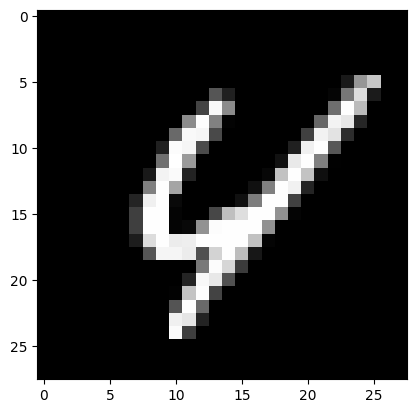

In [ ]:
flat_image = X_train.iloc[1].values
selected_pixels = np.random.choice(len(flat_image), 784, replace=False) #784
mask = np.zeros(len(flat_image), dtype=bool)
mask[selected_pixels] = True
masked_image = flat_image * mask.astype(int)
reshaped_image = masked_image.reshape(28, 28)
plt.imshow(reshaped_image, cmap='gray')
plt.show()

# Section 1: Initial Experiments to select pixels at random and with distributions

## Exp1: Random Sampling to turn pixels on and off for each  image given amount / alpha of pixels.

In [ ]:
dataset_sizes = [0.2,]
accuracies = []
results = {}

for size in dataset_sizes:

    print(size)
    # Determine the indices for splitting the training data
    split_index = int(len(X_train)*size)

    # Use a subset of the training data
    X_train_subset = X_train[:split_index].copy()  # Create a copy of the subset
    y_train_subset = y_train[:split_index]

    alphas = []
    size_accuracies = []

    for alpha in np.arange(0.01, 1.01, 0.1):

        #print(alpha)
        start = time.time()
        num_pixels = int(round(28 * 28 * (alpha)))  # Assuming 28x28 images
        reshaped_images = []

        #print(num_pixels) 

        for i in range(X_train_subset.shape[0]):

            # Flatten the image
            flat_image = X_train_subset.iloc[i].values
            # Randomly select pixels
            selected_pixels = np.random.choice(len(flat_image), num_pixels, replace=False)
            #print(selected_pixels)
            # Create a mask of zeros with the same shape as the flattened image
            mask = np.zeros(len(flat_image), dtype=bool)
            #print(mask)
            # Set the selected pixels to True
            mask[selected_pixels] = True
            #print(mask)
            mask = mask.astype(int)
            # Multiply the original image data with the mask
            X_train_subset.iloc[i] = flat_image * mask  #flat_image * ~mask #Apply the mask to the flattened image (this will set the non-selected pixels to 0)

            #print(X_train_subset.iloc[i].values)
            reshaped_images.append(X_train_subset.iloc[i].values)

            # Creatin a new classifier
        X_train_subset_array = np.array(reshaped_images).reshape(-1, 28, 28, 1)
        #print(X_train_subset.shape)
        model = Sequential([
                Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                MaxPooling2D((2, 2)),
                Conv2D(64, (3, 3), activation='relu'),
                MaxPooling2D((2, 2)),
                Flatten(),
                Dense(64, activation='relu'),
                Dense(10, activation='softmax')
            ])

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        model.fit(X_train_subset_array, y_train_subset, batch_size=128, epochs=5, verbose=1)

        score = model.evaluate(np.array(X_test).reshape(-1, 28, 28, 1), y_test, verbose=0)

        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

        end = time.time()

        elapsed_time = end - start
        results[(size, alpha)] = {'accuracy': score[1], 'time': elapsed_time}        

In [ ]:
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train.argmax(axis=1))
dataset_sizes = [0.2,]
accuracies = []
results = {} 

In [ ]:
for size in dataset_sizes:
    print(size)
    split_index = int(len(X_train) * size)
    X_train_subset = X_train.iloc[:split_index].copy()
    y_train_subset = y_train.iloc[:split_index]

    alphas = []
    size_accuracies = []
    listn = [0, 1, 2, 5, 10, 20, 50, 100, 500, 600, 700]
    for alpha in listn:
        start = time.time()
        num_pixels = alpha
        reshaped_images = []
        print(len(X_train_subset))
        for i in range(len(X_train_subset)):
            flat_image = X_train_subset.iloc[i].values
            selected_pixels = np.random.choice(len(flat_image), num_pixels, replace=False)
            mask = np.zeros(len(flat_image), dtype=bool)
            mask[selected_pixels] = True
            masked_image = flat_image * mask.astype(int)
            #print(masked_image)
            reshaped_images.append(masked_image)

        X_train_subset_array = np.array(reshaped_images).reshape(-1, 28, 28, 1)

        # Add training and evaluation code here
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(10, activation='softmax')
        ])

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        y_train_subset_categorical = to_categorical(y_train_subset, 10)  # Convert labels to one-hot
        model.fit(X_train_subset_array, y_train_subset_categorical, batch_size=128, epochs=5, verbose=1)

        score = model.evaluate(np.array(X_test).reshape(-1, 28, 28, 1), y_test, verbose=0)

        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

        elapsed_time = time.time() - start
        print(f'Alpha {alpha}, Time {elapsed_time:.2f}s')

0.2
11200
Epoch 1/5
88/88 [==============================] - 5s 54ms/step - loss: 2.3024 - accuracy: 0.1065
Epoch 2/5
88/88 [==============================] - 5s 53ms/step - loss: 2.3017 - accuracy: 0.1091
Epoch 3/5
88/88 [==============================] - 5s 53ms/step - loss: 2.3013 - accuracy: 0.1091
Epoch 4/5
88/88 [==============================] - 5s 54ms/step - loss: 2.3011 - accuracy: 0.1091
Epoch 5/5
88/88 [==============================] - 5s 54ms/step - loss: 2.3010 - accuracy: 0.1091
Test loss: 37.64507293701172
Test accuracy: 0.09692857414484024
Alpha 0, Time 26.82s
11200
Epoch 1/5
88/88 [==============================] - 5s 52ms/step - loss: 2.3580 - accuracy: 0.1218
Epoch 2/5
88/88 [==============================] - 5s 53ms/step - loss: 2.2736 - accuracy: 0.1377
Epoch 3/5
88/88 [==============================] - 5s 53ms/step - loss: 2.2598 - accuracy: 0.1411
Epoch 4/5
88/88 [==============================] - 5s 52ms/step - loss: 2.2528 - accuracy: 0.1445
Epoch 5/5
88/88 [

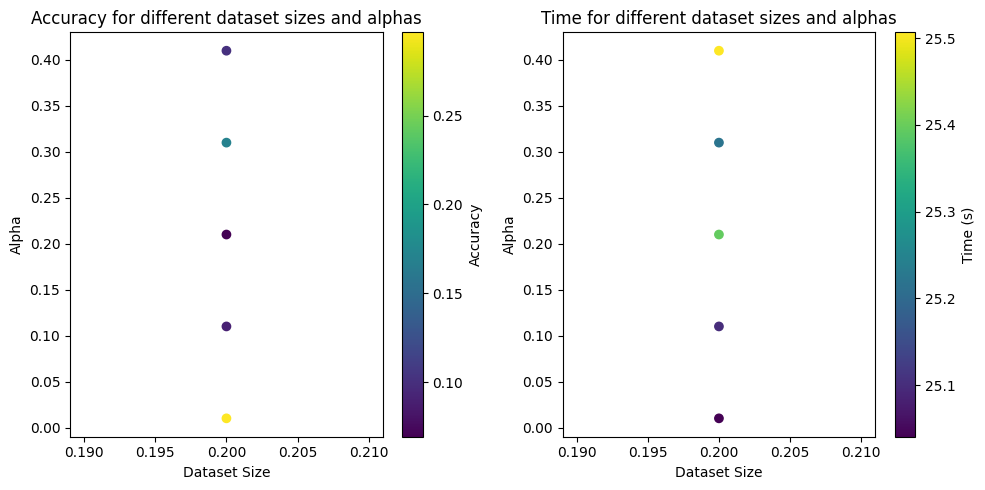

In [ ]:
sizes = []
alphas = []
accuracies = []
times = []
for (size, alpha), result in results.items():
    sizes.append(size)
    alphas.append(alpha)
    accuracies.append(result['accuracy'])
    times.append(result['time'])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(sizes, alphas, c=accuracies, cmap='viridis')
plt.colorbar(label='Accuracy')
plt.xlabel('Dataset Size')
plt.ylabel('Alpha')
plt.title('Accuracy for different dataset sizes and alphas')

plt.subplot(1, 2, 2)
plt.scatter(sizes, alphas, c=times, cmap='viridis')
plt.colorbar(label='Time (s)')
plt.xlabel('Dataset Size')
plt.ylabel('Alpha')
plt.title('Time for different dataset sizes and alphas')

plt.tight_layout()
plt.show()

TODO Fix bugs causing accuracies for lower alphas to be higher

## Exp2: Gaussian Sampling (not random) centered in the image

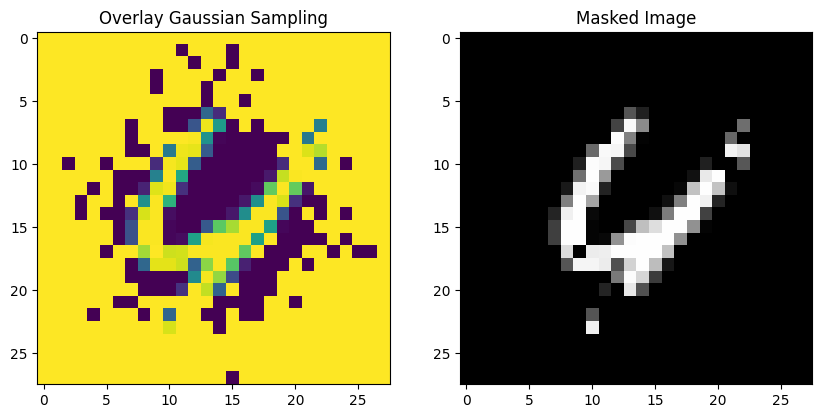

In [ ]:
flat_image = X_train.iloc[1].values
mean = [28 / 2, 28 / 2]
cov = [[28 / 2, 0], [0, 28 / 2]] 
x, y = np.random.multivariate_normal(mean, cov, 700).T

# Clip the indices to the valid range
x = np.clip(x, 0, 28 - 1).astype(int)
y = np.clip(y, 0, 28 - 1).astype(int)

# Convert the 2D indices to 1D indices
selected_pixels = x * 28 + y

# Create an overlay image
overlay_image = np.full((28, 28), fill_value=255)  # create a white image for overlay
overlay_image.flat[selected_pixels] = flat_image[selected_pixels]  # set selected pixels to original values

# Creating a masked image for comparison
mask = np.zeros(len(flat_image), dtype=bool)
mask[selected_pixels] = True
masked_image = flat_image * mask.astype(int)

# Display both images for comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(overlay_image.reshape(28, 28), cmap='viridis')
axes[0].set_title('Overlay Gaussian Sampling')
axes[1].imshow(masked_image.reshape(28, 28), cmap='gray')
axes[1].set_title('Masked Image')
plt.show()

In [ ]:
dataset_sizes = [0.2,]
accuracies = []
results = {}

for size in dataset_sizes:
    print(size)
    # Determine the indices for splitting the training data
    split_index = int(len(X_train)*size)

    # Use a subset of the training data
    X_train_subset = X_train[:split_index].copy()  # Create a copy of the subset
    y_train_subset = y_train[:split_index]

    alphas = []
    size_accuracies = []

    for alpha in np.arange(0.01, 1.01, 0.1):

        print(alpha)
        start = time.time()
        num_pixels = int(round(28 * 28 * (1-alpha)))  # Assuming 28x28 images
        #print(X_train_subset.shape[0])
        reshaped_images = []
        for i in range(X_train_subset.shape[0]):
            # Flatten the image
            flat_image = X_train_subset.iloc[i].values
            image_size = 28
            num_pixels = int(round(image_size * image_size * (alpha)))
            # Generate pixel indices from a Gaussian distribution centered in the image
            mean = [image_size / 2, image_size / 2]
            cov = [[image_size / 2, 0], [0, image_size / 2]]
            x, y = np.random.multivariate_normal(mean, cov, num_pixels).T

            # Clip the indices to the valid range
            x = np.clip(x, 0, image_size - 1).astype(int)
            y = np.clip(y, 0, image_size - 1).astype(int)

            # Convert the 2D indices to 1D indices
            selected_pixels = x * image_size + y

            #print(selected_pixels)
            # Create a mask of zeros with the same shape as the flattened image
            mask = np.zeros(len(flat_image), dtype=bool)
            #print(mask)
            # Set the selected pixels to True
            mask[selected_pixels] = True
            #print(mask)
            # Multiply the original image data with the mask
            masked_image = flat_image * mask.astype(int)
            reshaped_images.append(masked_image)

            # Create a new classifier
        X_train_subset_array = np.array(reshaped_images).reshape(-1, 28, 28, 1)
        print(X_train_subset.shape)
        model = Sequential([
                Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                MaxPooling2D((2, 2)),
                Conv2D(64, (3, 3), activation='relu'),
                MaxPooling2D((2, 2)),
                Flatten(),
                Dense(64, activation='relu'),
                Dense(10, activation='softmax')
            ])

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        y_train_subset_categorical = to_categorical(y_train_subset, 10)  # Convert labels to one-hot
        model.fit(X_train_subset_array, y_train_subset_categorical, batch_size=128, epochs=5, verbose=1)
        score = model.evaluate(np.array(X_test).reshape(-1, 28, 28, 1), y_test, verbose=0)


        print('Test loss:', score[0])
        print('Test accuracy:', score[1])

        end = time.time()

        elapsed_time = end - start
        results[(size, alpha)] = {'accuracy': score[1], 'time': elapsed_time}

0.2
0.01
(11200, 784)
Epoch 1/5


ValueError: in user code:

    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


# Section 2: Experiments to determine contribution of each pixel and create algorithms

Idea: accuracy learnt on all other pixels, if accuracy drops you know --> notion comes from random forrest --> variable importance --> when I remove that feature do I have improvement or drop in accuracy,  1-accuracy - is a measure of importance of that feature I, you can rank all features by decreasing order of importance, --> is there a pattern that emerges? maybe some interesting pattern, maybe importance is very different for the zeros and very different for the fives, finding ultimate representations of semantics of that particular problem,

In [ ]:
#the idea in code
split_index = int(len(X_train)*0.20)
X_train_subset = X_train[:split_index].copy()  # Create a copy of the subset
y_train_subset = y_train[:split_index]
for i in range(len(X_train_subset)):
    flat_image = X_train_subset.iloc[i].values
    mask = np.ones(len(flat_image), dtype=bool)  # Initialized to keep all pixels
    mask[100] = False  # Turn off only the current pixel
    masked_image = flat_image * mask.astype(int)  # Apply mask
    X_train_subset.iloc[i] = masked_image

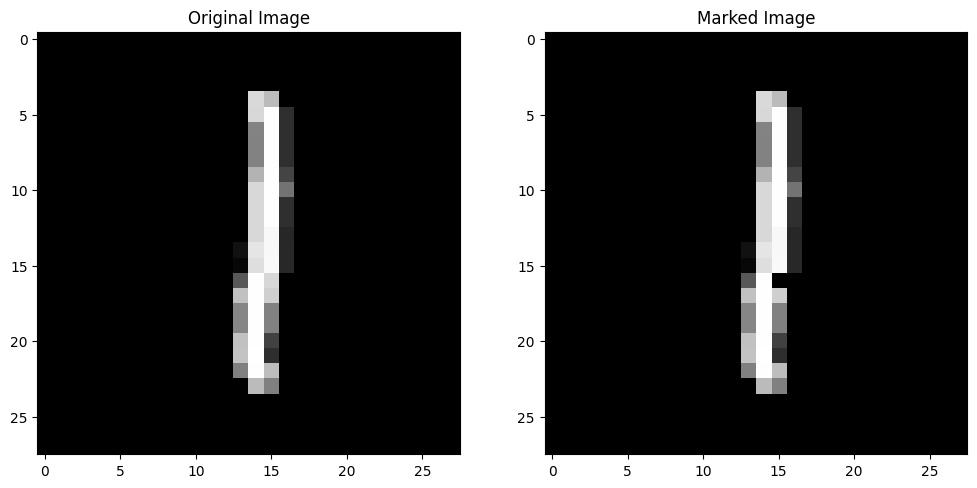

In [ ]:
# Extract the flat image
flat_image = X_train_subset.iloc[10].values
# Initialize the mask to keep all pixels
mask = np.ones(len(flat_image), dtype=bool)
# Turn off only the 100th pixel
mask[463] = False
# Mark the selected pixel with a high value for visibility (e.g., 255 for white)
marked_image = flat_image.copy()
marked_image[463] = 0  # Mark pixel
# Display the original and marked image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(flat_image.reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(marked_image.reshape(28, 28), cmap='gray')
plt.title('Marked Image')
plt.show()

Calculating the overall pixel importances

In [ ]:
pixel_importance = {}
split_index = int(len(X_train)*0.20)
# Use a subset of the training data
X_train_subset = X_train[:split_index].copy()  # Create a copy of the subset
y_train_subset = y_train[:split_index]

# Iterate through each pixel index for the entire image grid
for pixel_index in range(28*28):
    print(f'Evaluating pixel: {pixel_index}')
    # Create a copy of the original dataset before modification
    X_train_modified = X_train_subset.copy()  # Use the entire training dataset for modification

    # Mask all pixels except the one at the current index
    for i in range(len(X_train_modified)):
        flat_image = X_train_modified.iloc[i].values
        marked_image = flat_image.copy()
        marked_image[pixel_index] = 0  # Mark pixel
        X_train_modified.iloc[i] = marked_image

    # Reshape the modified images for the model
    X_train_modified_array = np.array(X_train_modified).reshape(-1, 28, 28, 1)

    # Create and train the model
    model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(10, activation='softmax')
        ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with the entire dataset
    model.fit(X_train_modified_array, y_train_subset, batch_size=128, epochs=5, verbose=1)

    # Evaluate the model with the test set
    score = model.evaluate(np.array(X_test).reshape(-1, 28, 28, 1), y_test, verbose=0)

    # Calculate and store the importance of the current pixel
    pixel_importance[pixel_index] = 1 - score[1]  # 1 - accuracy

    # Evaluate the model with the test set
    X_test_modified = np.array(X_test).reshape(-1, 28, 28, 1)
    y_pred = model.predict(X_test_modified)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    class_report = classification_report(y_test_classes, y_pred_classes)

    print('Score after only keeping these pixels:', pixels_to_turn_on)
    print('Accuracy:', accuracy)
    print('Classification Report:\n', class_report)

print('Pixel Importance:', pixel_importance)

Epoch 2/5
88/88 [==============================] - 5s 54ms/step - loss: 0.2301 - accuracy: 0.9338
Epoch 3/5
88/88 [==============================] - 5s 54ms/step - loss: 0.1306 - accuracy: 0.9604
Epoch 4/5
88/88 [==============================] - 5s 54ms/step - loss: 0.0846 - accuracy: 0.9746
Epoch 5/5
88/88 [==============================] - 5s 54ms/step - loss: 0.0535 - accuracy: 0.9837
Evaluating pixel: 694
Epoch 1/5
88/88 [==============================] - 5s 54ms/step - loss: 4.0839 - accuracy: 0.6923
Epoch 2/5
88/88 [==============================] - 5s 54ms/step - loss: 0.2203 - accuracy: 0.9332
Epoch 3/5
88/88 [==============================] - 5s 54ms/step - loss: 0.1230 - accuracy: 0.9613
Epoch 4/5
88/88 [==============================] - 5s 54ms/step - loss: 0.0780 - accuracy: 0.9756
Epoch 5/5
88/88 [==============================] - 5s 54ms/step - loss: 0.0477 - accuracy: 0.9862
Evaluating pixel: 695
Epoch 1/5
88/88 [==============================] - 5s 54ms/step - loss: 2.

In [ ]:
pixels =  {0: 0.041071414947509766, 1: 0.03678572177886963, 2: 0.03457140922546387, 3: 0.03964287042617798, 4: 0.03407144546508789, 5: 0.039571404457092285, 6: 0.04021430015563965, 7: 0.03307145833969116, 8: 0.040285706520080566, 9: 0.03585714101791382, 10: 0.03714287281036377, 11: 0.03864288330078125, 12: 0.030571401119232178, 13: 0.035357117652893066, 14: 0.04021430015563965, 15: 0.03635716438293457, 16: 0.03514283895492554, 17: 0.035357117652893066, 18: 0.039571404457092285, 19: 0.0308571457862854, 20: 0.0422857403755188, 21: 0.03357142210006714, 22: 0.03614288568496704, 23: 0.03628569841384888, 24: 0.03014284372329712, 25: 0.03450000286102295, 26: 0.03557145595550537, 27: 0.03435713052749634, 28: 0.0389285683631897, 29: 0.03614288568496704, 30: 0.033214271068573, 31: 0.03385716676712036, 32: 0.03378570079803467, 33: 0.039571404457092285, 34: 0.03171426057815552, 35: 0.046571433544158936, 36: 0.03635716438293457, 37: 0.037071406841278076, 38: 0.03371429443359375, 39: 0.04100000858306885, 40: 0.03850001096725464, 41: 0.03700000047683716, 42: 0.034785687923431396, 43: 0.03678572177886963, 44: 0.043071448802948, 45: 0.0339999794960022, 46: 0.03271430730819702, 47: 0.03278571367263794, 48: 0.03171426057815552, 49: 0.045071423053741455, 50: 0.03978574275970459, 51: 0.043785691261291504, 52: 0.03285712003707886, 53: 0.03442859649658203, 54: 0.04178571701049805, 55: 0.03328573703765869, 56: 0.0365714430809021, 57: 0.03064286708831787, 58: 0.03778570890426636, 59: 0.03149998188018799, 60: 0.03178572654724121, 61: 0.0350000262260437, 62: 0.038428544998168945, 63: 0.036499977111816406, 64: 0.03928571939468384, 65: 0.03221428394317627, 66: 0.03299999237060547, 67: 0.03028571605682373, 68: 0.0373571515083313, 69: 0.03757143020629883, 70: 0.03471428155899048, 71: 0.0339999794960022, 72: 0.040499985218048096, 73: 0.044357120990753174, 74: 0.03757143020629883, 75: 0.03857141733169556, 76: 0.03414285182952881, 77: 0.03357142210006714, 78: 0.03235715627670288, 79: 0.03299999237060547, 80: 0.039357125759124756, 81: 0.03521430492401123, 82: 0.03457140922546387, 83: 0.04057145118713379, 84: 0.03485715389251709, 85: 0.03157144784927368, 86: 0.03464287519454956, 87: 0.04328572750091553, 88: 0.03928571939468384, 89: 0.03885716199874878, 90: 0.03778570890426636, 91: 0.03835713863372803, 92: 0.03450000286102295, 93: 0.04035717248916626, 94: 0.03328573703765869, 95: 0.03635716438293457, 96: 0.038214266300201416, 97: 0.03850001096725464, 98: 0.04000002145767212, 99: 0.03778570890426636, 100: 0.0365714430809021, 101: 0.03635716438293457, 102: 0.03778570890426636, 103: 0.03385716676712036, 104: 0.037285685539245605, 105: 0.037642836570739746, 106: 0.037285685539245605, 107: 0.03642857074737549, 108: 0.03299999237060547, 109: 0.0381428599357605, 110: 0.03278571367263794, 111: 0.03185713291168213, 112: 0.042214274406433105, 113: 0.03285712003707886, 114: 0.03149998188018799, 115: 0.03721427917480469, 116: 0.03799998760223389, 117: 0.042999982833862305, 118: 0.0339999794960022, 119: 0.03457140922546387, 120: 0.03185713291168213, 121: 0.03685712814331055, 122: 0.03464287519454956, 123: 0.03828573226928711, 124: 0.03600001335144043, 125: 0.0357857346534729, 126: 0.04992854595184326, 127: 0.03421425819396973, 128: 0.03235715627670288, 129: 0.03671431541442871, 130: 0.041071414947509766, 131: 0.03135716915130615, 132: 0.03928571939468384, 133: 0.046071410179138184, 134: 0.04000002145767212, 135: 0.04100000858306885, 136: 0.03200000524520874, 137: 0.03492856025695801, 138: 0.038428544998168945, 139: 0.04342859983444214, 140: 0.03792858123779297, 141: 0.039357125759124756, 142: 0.03557145595550537, 143: 0.03471428155899048, 144: 0.03299999237060547, 145: 0.036499977111816406, 146: 0.03450000286102295, 147: 0.03635716438293457, 148: 0.03421425819396973, 149: 0.03928571939468384, 150: 0.03200000524520874, 151: 0.04042857885360718, 152: 0.04292857646942139, 153: 0.03557145595550537, 154: 0.03335714340209961, 155: 0.0373571515083313, 156: 0.04192858934402466, 157: 0.03949999809265137, 158: 0.03692859411239624, 159: 0.029857158660888672, 160: 0.0373571515083313, 161: 0.03557145595550537, 162: 0.03614288568496704, 163: 0.03664284944534302, 164: 0.03257143497467041, 165: 0.0357857346534729, 166: 0.03385716676712036, 167: 0.03614288568496704, 168: 0.03507143259048462, 169: 0.03692859411239624, 170: 0.039357125759124756, 171: 0.03514283895492554, 172: 0.04021430015563965, 173: 0.03750002384185791, 174: 0.043928563594818115, 175: 0.03364282846450806, 176: 0.03857141733169556, 177: 0.03507143259048462, 178: 0.0389285683631897, 179: 0.03614288568496704, 180: 0.03521430492401123, 181: 0.03564286231994629, 182: 0.03714287281036377, 183: 0.03600001335144043, 184: 0.03471428155899048, 185: 0.03542858362197876, 186: 0.03342854976654053, 187: 0.03692859411239624, 188: 0.038785696029663086, 189: 0.0373571515083313, 190: 0.03178572654724121, 191: 0.03214287757873535, 192: 0.037285685539245605, 193: 0.03385716676712036, 194: 0.03714287281036377, 195: 0.03564286231994629, 196: 0.03978574275970459, 197: 0.035928547382354736, 198: 0.03985714912414551, 199: 0.03714287281036377, 200: 0.03364282846450806, 201: 0.03564286231994629, 202: 0.03885716199874878, 203: 0.03664284944534302, 204: 0.03914284706115723, 205: 0.03271430730819702, 206: 0.0350000262260437, 207: 0.04214286804199219, 208: 0.041499972343444824, 209: 0.03771430253982544, 210: 0.03771430253982544, 211: 0.03271430730819702, 212: 0.03721427917480469, 213: 0.040928542613983154, 214: 0.03685712814331055, 215: 0.039928555488586426, 216: 0.03664284944534302, 217: 0.03585714101791382, 218: 0.03350001573562622, 219: 0.03442859649658203, 220: 0.03128570318222046, 221: 0.03250002861022949, 222: 0.03635716438293457, 223: 0.04135715961456299, 224: 0.035357117652893066, 225: 0.03792858123779297, 226: 0.03564286231994629, 227: 0.034785687923431396, 228: 0.03207141160964966, 229: 0.040857136249542236, 230: 0.04192858934402466, 231: 0.03299999237060547, 232: 0.03792858123779297, 233: 0.0350000262260437, 234: 0.037071406841278076, 235: 0.03585714101791382, 236: 0.03378570079803467, 237: 0.03907144069671631, 238: 0.03385716676712036, 239: 0.03985714912414551, 240: 0.04100000858306885, 241: 0.03350001573562622, 242: 0.03485715389251709, 243: 0.046428561210632324, 244: 0.03585714101791382, 245: 0.040928542613983154, 246: 0.03528571128845215, 247: 0.03685712814331055, 248: 0.04557144641876221, 249: 0.044928550720214844, 250: 0.03628569841384888, 251: 0.04135715961456299, 252: 0.03671431541442871, 253: 0.0316428542137146, 254: 0.03557145595550537, 255: 0.03671431541442871, 256: 0.04064285755157471, 257: 0.03607141971588135, 258: 0.04000002145767212, 259: 0.03928571939468384, 260: 0.03257143497467041, 261: 0.03621429204940796, 262: 0.034785687923431396, 263: 0.038428544998168945, 264: 0.042071402072906494, 265: 0.03371429443359375, 266: 0.04671430587768555, 267: 0.03557145595550537, 268: 0.04171431064605713, 269: 0.03492856025695801, 270: 0.0324285626411438, 271: 0.0339999794960022, 272: 0.03149998188018799, 273: 0.03742855787277222, 274: 0.03421425819396973, 275: 0.040857136249542236, 276: 0.03228569030761719, 277: 0.03471428155899048, 278: 0.037071406841278076, 279: 0.035928547382354736, 280: 0.03942859172821045, 281: 0.03778570890426636, 282: 0.044928550720214844, 283: 0.039357125759124756, 284: 0.042999982833862305, 285: 0.038428544998168945, 286: 0.03692859411239624, 287: 0.034785687923431396, 288: 0.03442859649658203, 289: 0.031142830848693848, 290: 0.0422857403755188, 291: 0.0365714430809021, 292: 0.03642857074737549, 293: 0.03671431541442871, 294: 0.038428544998168945, 295: 0.03299999237060547, 296: 0.038214266300201416, 297: 0.03385716676712036, 298: 0.039714276790618896, 299: 0.03621429204940796, 300: 0.03200000524520874, 301: 0.04650002717971802, 302: 0.03542858362197876, 303: 0.03607141971588135, 304: 0.03885716199874878, 305: 0.03350001573562622, 306: 0.03792858123779297, 307: 0.03314286470413208, 308: 0.0365714430809021, 309: 0.035928547382354736, 310: 0.0357857346534729, 311: 0.035357117652893066, 312: 0.045214295387268066, 313: 0.040142834186553955, 314: 0.03828573226928711, 315: 0.030785739421844482, 316: 0.03392857313156128, 317: 0.03985714912414551, 318: 0.03850001096725464, 319: 0.038214266300201416, 320: 0.03857141733169556, 321: 0.04000002145767212, 322: 0.03928571939468384, 323: 0.03328573703765869, 324: 0.03942859172821045, 325: 0.039571404457092285, 326: 0.03978574275970459, 327: 0.039357125759124756, 328: 0.03299999237060547, 329: 0.040714263916015625, 330: 0.03685712814331055, 331: 0.03364282846450806, 332: 0.03807145357131958, 333: 0.037071406841278076, 334: 0.03742855787277222, 335: 0.0357857346534729, 336: 0.03628569841384888, 337: 0.038428544998168945, 338: 0.03235715627670288, 339: 0.03742855787277222, 340: 0.03864288330078125, 341: 0.03685712814331055, 342: 0.0373571515083313, 343: 0.03778570890426636, 344: 0.03799998760223389, 345: 0.03278571367263794, 346: 0.03621429204940796, 347: 0.03700000047683716, 348: 0.03792858123779297, 349: 0.03457140922546387, 350: 0.0316428542137146, 351: 0.03664284944534302, 352: 0.0308571457862854, 353: 0.040857136249542236, 354: 0.03664284944534302, 355: 0.03664284944534302, 356: 0.03342854976654053, 357: 0.03914284706115723, 358: 0.03771430253982544, 359: 0.03907144069671631, 360: 0.03585714101791382, 361: 0.0365714430809021, 362: 0.0350000262260437, 363: 0.03700000047683716, 364: 0.037642836570739746, 365: 0.03121429681777954, 366: 0.03642857074737549, 367: 0.03907144069671631, 368: 0.03742855787277222, 369: 0.040857136249542236, 370: 0.03292858600616455, 371: 0.03571426868438721, 372: 0.03414285182952881, 373: 0.038428544998168945, 374: 0.038214266300201416, 375: 0.03214287757873535, 376: 0.046428561210632324, 377: 0.03414285182952881, 378: 0.03392857313156128, 379: 0.03507143259048462, 380: 0.03771430253982544, 381: 0.03185713291168213, 382: 0.03350001573562622, 383: 0.03828573226928711, 384: 0.03342854976654053, 385: 0.03414285182952881, 386: 0.04614287614822388, 387: 0.04035717248916626, 388: 0.040285706520080566, 389: 0.03678572177886963, 390: 0.03442859649658203, 391: 0.03678572177886963, 392: 0.03542858362197876, 393: 0.03385716676712036, 394: 0.03385716676712036, 395: 0.03185713291168213, 396: 0.03514283895492554, 397: 0.03357142210006714, 398: 0.041642844676971436, 399: 0.04514282941818237, 400: 0.03607141971588135, 401: 0.03200000524520874, 402: 0.03914284706115723, 403: 0.03357142210006714, 404: 0.03464287519454956, 405: 0.03378570079803467, 406: 0.03871428966522217, 407: 0.041071414947509766, 408: 0.03221428394317627, 409: 0.03221428394317627, 410: 0.041857123374938965, 411: 0.03271430730819702, 412: 0.043357133865356445, 413: 0.03557145595550537, 414: 0.03521430492401123, 415: 0.03471428155899048, 416: 0.03871428966522217, 417: 0.03464287519454956, 418: 0.03621429204940796, 419: 0.03335714340209961, 420: 0.0316428542137146, 421: 0.03464287519454956, 422: 0.03642857074737549, 423: 0.0350000262260437, 424: 0.03914284706115723, 425: 0.03664284944534302, 426: 0.034785687923431396, 427: 0.04100000858306885, 428: 0.040285706520080566, 429: 0.03492856025695801, 430: 0.039928555488586426, 431: 0.03721427917480469, 432: 0.03750002384185791, 433: 0.03457140922546387, 434: 0.034785687923431396, 435: 0.03549998998641968, 436: 0.03635716438293457, 437: 0.03828573226928711, 438: 0.03514283895492554, 439: 0.03485715389251709, 440: 0.03678572177886963, 441: 0.039357125759124756, 442: 0.03542858362197876, 443: 0.03528571128845215, 444: 0.03678572177886963, 445: 0.03835713863372803, 446: 0.03285712003707886, 447: 0.037857115268707275, 448: 0.038999974727630615, 449: 0.03692859411239624, 450: 0.03285712003707886, 451: 0.03421425819396973, 452: 0.0365714430809021, 453: 0.03342854976654053, 454: 0.0389285683631897, 455: 0.03278571367263794, 456: 0.03678572177886963, 457: 0.042071402072906494, 458: 0.03914284706115723, 459: 0.03307145833969116, 460: 0.035357117652893066, 461: 0.0339999794960022, 462: 0.03521430492401123, 463: 0.0365714430809021, 464: 0.03557145595550537, 465: 0.03564286231994629, 466: 0.041857123374938965, 467: 0.039928555488586426, 468: 0.03507143259048462, 469: 0.03564286231994629, 470: 0.03335714340209961, 471: 0.0389285683631897, 472: 0.03671431541442871, 473: 0.03378570079803467, 474: 0.03507143259048462, 475: 0.04171431064605713, 476: 0.03142857551574707, 477: 0.03450000286102295, 478: 0.03614288568496704, 479: 0.03171426057815552, 480: 0.03235715627670288, 481: 0.035928547382354736, 482: 0.03528571128845215, 483: 0.03221428394317627, 484: 0.0339999794960022, 485: 0.047928571701049805, 486: 0.0324285626411438, 487: 0.043928563594818115, 488: 0.03485715389251709, 489: 0.03549998998641968, 490: 0.03871428966522217, 491: 0.03835713863372803, 492: 0.0389285683631897, 493: 0.03571426868438721, 494: 0.046000003814697266, 495: 0.04007142782211304, 496: 0.039571404457092285, 497: 0.034785687923431396, 498: 0.03350001573562622, 499: 0.03207141160964966, 500: 0.040142834186553955, 501: 0.0308571457862854, 502: 0.03549998998641968, 503: 0.03414285182952881, 504: 0.038785696029663086, 505: 0.03457140922546387, 506: 0.03214287757873535, 507: 0.03214287757873535, 508: 0.03257143497467041, 509: 0.040928542613983154, 510: 0.03328573703765869, 511: 0.03850001096725464, 512: 0.03457140922546387, 513: 0.03771430253982544, 514: 0.03549998998641968, 515: 0.035357117652893066, 516: 0.03907144069671631, 517: 0.03357142210006714, 518: 0.03457140922546387, 519: 0.038999974727630615, 520: 0.03564286231994629, 521: 0.03507143259048462, 522: 0.03757143020629883, 523: 0.04135715961456299, 524: 0.04035717248916626, 525: 0.03521430492401123, 526: 0.038785696029663086, 527: 0.03549998998641968, 528: 0.037071406841278076, 529: 0.03542858362197876, 530: 0.03521430492401123, 531: 0.03850001096725464, 532: 0.0389285683631897, 533: 0.03557145595550537, 534: 0.03585714101791382, 535: 0.03692859411239624, 536: 0.03464287519454956, 537: 0.03257143497467041, 538: 0.039928555488586426, 539: 0.04007142782211304, 540: 0.03428572416305542, 541: 0.03521430492401123, 542: 0.03335714340209961, 543: 0.03614288568496704, 544: 0.03128570318222046, 545: 0.03414285182952881, 546: 0.045499980449676514, 547: 0.03471428155899048, 548: 0.03342854976654053, 549: 0.03185713291168213, 550: 0.03614288568496704, 551: 0.03271430730819702, 552: 0.034785687923431396, 553: 0.03492856025695801, 554: 0.03471428155899048, 555: 0.04007142782211304, 556: 0.03514283895492554, 557: 0.03771430253982544, 558: 0.035928547382354736, 559: 0.03614288568496704, 560: 0.03542858362197876, 561: 0.03685712814331055, 562: 0.040142834186553955, 563: 0.03171426057815552, 564: 0.0422857403755188, 565: 0.03985714912414551, 566: 0.03564286231994629, 567: 0.03942859172821045, 568: 0.0300714373588562, 569: 0.04007142782211304, 570: 0.0373571515083313, 571: 0.03792858123779297, 572: 0.03914284706115723, 573: 0.037285685539245605, 574: 0.0373571515083313, 575: 0.044642865657806396, 576: 0.041642844676971436, 577: 0.03628569841384888, 578: 0.03471428155899048, 579: 0.036499977111816406, 580: 0.03692859411239624, 581: 0.03571426868438721, 582: 0.038785696029663086, 583: 0.03464287519454956, 584: 0.03607141971588135, 585: 0.03614288568496704, 586: 0.04192858934402466, 587: 0.03264284133911133, 588: 0.03428572416305542, 589: 0.03064286708831787, 590: 0.0350000262260437, 591: 0.03492856025695801, 592: 0.03685712814331055, 593: 0.03607141971588135, 594: 0.03471428155899048, 595: 0.03392857313156128, 596: 0.03235715627670288, 597: 0.03128570318222046, 598: 0.03799998760223389, 599: 0.03585714101791382, 600: 0.03642857074737549, 601: 0.034785687923431396, 602: 0.04135715961456299, 603: 0.03914284706115723, 604: 0.0389285683631897, 605: 0.03742855787277222, 606: 0.04157143831253052, 607: 0.03307145833969116, 608: 0.03571426868438721, 609: 0.04157143831253052, 610: 0.03664284944534302, 611: 0.03871428966522217, 612: 0.03350001573562622, 613: 0.04057145118713379, 614: 0.039928555488586426, 615: 0.03357142210006714, 616: 0.03799998760223389, 617: 0.0339999794960022, 618: 0.03949999809265137, 619: 0.035928547382354736, 620: 0.04614287614822388, 621: 0.03457140922546387, 622: 0.03771430253982544, 623: 0.03871428966522217, 624: 0.03135716915130615, 625: 0.03257143497467041, 626: 0.040857136249542236, 627: 0.03742855787277222, 628: 0.03885716199874878, 629: 0.03149998188018799, 630: 0.03457140922546387, 631: 0.03757143020629883, 632: 0.03549998998641968, 633: 0.044142842292785645, 634: 0.03978574275970459, 635: 0.03471428155899048, 636: 0.03492856025695801, 637: 0.0350000262260437, 638: 0.03328573703765869, 639: 0.03850001096725464, 640: 0.04192858934402466, 641: 0.03407144546508789, 642: 0.03621429204940796, 643: 0.03335714340209961, 644: 0.03414285182952881, 645: 0.035357117652893066, 646: 0.03357142210006714, 647: 0.029999971389770508, 648: 0.03635716438293457, 649: 0.03514283895492554, 650: 0.03228569030761719, 651: 0.039357125759124756, 652: 0.03671431541442871, 653: 0.04271429777145386, 654: 0.041642844676971436, 655: 0.041499972343444824, 656: 0.03921431303024292, 657: 0.049571454524993896, 658: 0.03864288330078125, 659: 0.03528571128845215, 660: 0.0381428599357605, 661: 0.03671431541442871, 662: 0.03571426868438721, 663: 0.03142857551574707, 664: 0.04042857885360718, 665: 0.03371429443359375, 666: 0.03421425819396973, 667: 0.03835713863372803, 668: 0.03778570890426636, 669: 0.0365714430809021, 670: 0.03264284133911133, 671: 0.03771430253982544, 672: 0.03585714101791382, 673: 0.0422857403755188, 674: 0.04021430015563965, 675: 0.04442858695983887, 676: 0.042428553104400635, 677: 0.035928547382354736, 678: 0.03871428966522217, 679: 0.03385716676712036, 680: 0.03635716438293457, 681: 0.03557145595550537, 682: 0.03542858362197876, 683: 0.03357142210006714, 684: 0.0350000262260437, 685: 0.03314286470413208, 686: 0.03214287757873535, 687: 0.0350000262260437, 688: 0.03628569841384888, 689: 0.03864288330078125, 690: 0.03064286708831787, 691: 0.03664284944534302, 692: 0.03464287519454956, 693: 0.03721427917480469, 694: 0.03278571367263794, 695: 0.040499985218048096, 696: 0.03342854976654053, 697: 0.03871428966522217, 698: 0.036499977111816406, 699: 0.03621429204940796, 700: 0.030571401119232178, 701: 0.04100000858306885, 702: 0.036499977111816406, 703: 0.03871428966522217, 704: 0.036499977111816406, 705: 0.03850001096725464, 706: 0.03442859649658203, 707: 0.03614288568496704, 708: 0.03549998998641968, 709: 0.03514283895492554, 710: 0.036499977111816406, 711: 0.031142830848693848, 712: 0.03485715389251709, 713: 0.03285712003707886, 714: 0.03557145595550537, 715: 0.03514283895492554, 716: 0.031142830848693848, 717: 0.040499985218048096, 718: 0.0373571515083313, 719: 0.03464287519454956, 720: 0.03035712242126465, 721: 0.03757143020629883, 722: 0.04764288663864136, 723: 0.03807145357131958, 724: 0.03507143259048462, 725: 0.033214271068573, 726: 0.03721427917480469, 727: 0.037642836570739746, 728: 0.03357142210006714, 729: 0.0365714430809021, 730: 0.03378570079803467, 731: 0.03192859888076782, 732: 0.042642831802368164, 733: 0.0381428599357605, 734: 0.039357125759124756, 735: 0.038428544998168945, 736: 0.039357125759124756, 737: 0.03964287042617798, 738: 0.03235715627670288, 739: 0.03942859172821045, 740: 0.03607141971588135, 741: 0.03557145595550537, 742: 0.03528571128845215, 743: 0.04778569936752319, 744: 0.03407144546508789, 745: 0.03200000524520874, 746: 0.03642857074737549, 747: 0.03135716915130615, 748: 0.03778570890426636, 749: 0.037285685539245605, 750: 0.03635716438293457, 751: 0.030571401119232178, 752: 0.03457140922546387, 753: 0.043571412563323975, 754: 0.03857141733169556, 755: 0.043214261531829834, 756: 0.03642857074737549, 757: 0.03678572177886963, 758: 0.03492856025695801, 759: 0.03792858123779297, 760: 0.03471428155899048, 761: 0.03442859649658203, 762: 0.04057145118713379, 763: 0.03528571128845215, 764: 0.040142834186553955, 765: 0.04000002145767212, 766: 0.04214286804199219, 767: 0.04000002145767212, 768: 0.03314286470413208, 769: 0.039571404457092285, 770: 0.036499977111816406, 771: 0.03185713291168213, 772: 0.042642831802368164, 773: 0.03457140922546387, 774: 0.036499977111816406, 775: 0.035357117652893066, 776: 0.03235715627670288, 777: 0.04007142782211304, 778: 0.03214287757873535, 779: 0.03271430730819702, 780: 0.035357117652893066, 781: 0.04271429777145386, 782: 0.03178572654724121, 783: 0.03357142210006714}

10 4
285 0.038428544998168945
10 5
286 0.03692859411239624
10 6
287 0.034785687923431396
10 7
288 0.03442859649658203
10 8
289 0.031142830848693848
10 9
290 0.0422857403755188
10 10
291 0.0365714430809021
10 11
292 0.03642857074737549
10 12
293 0.03671431541442871
10 13
294 0.038428544998168945
10 14
295 0.03299999237060547
10 15
296 0.038214266300201416
10 16
297 0.03385716676712036
10 17
298 0.039714276790618896
10 18
299 0.03621429204940796
10 19
300 0.03200000524520874
10 20
301 0.04650002717971802
10 21
302 0.03542858362197876
10 22
303 0.03607141971588135
10 23
304 0.03885716199874878
10 24
305 0.03350001573562622
10 25
306 0.03792858123779297
10 26
307 0.03314286470413208
10 27
308 0.0365714430809021
11 0
309 0.035928547382354736
11 1
310 0.0357857346534729
11 2
311 0.035357117652893066
11 3
312 0.045214295387268066
11 4
313 0.040142834186553955
11 5
314 0.03828573226928711
11 6
315 0.030785739421844482
11 7
316 0.03392857313156128
11 8
317 0.03985714912414551
11 9
318 0.0385000

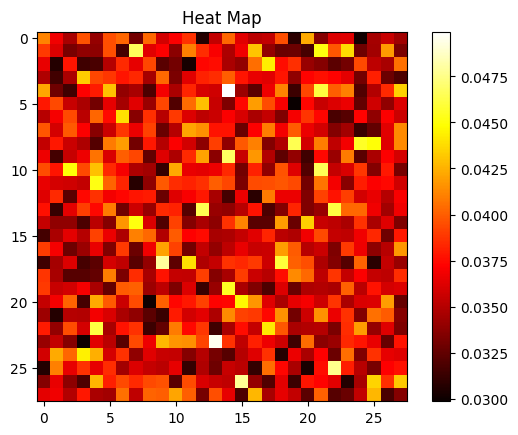

In [ ]:
data_array = np.zeros((28, 28))
for key, value in pixels.items():
    #print(key, value)
    row = key // 28
    col = key % 28
    #print(row, col)
    data_array[row, col] = value

# Create the heat map
plt.imshow(data_array, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Heat Map')
plt.show()

### SMARTPATCH_v1 for selecting only top or lowest pixels based on pixel importances

In [ ]:
def select_top_k_pixels(pixels, k, val = True):
    # Sort the pixels by importance in descending order
    sorted_pixels = sorted(pixels.items(), key=lambda item: item[1], reverse=val) #selecting best by default 
    
    # Select the top k pixels
    top_k_pixels = [item[0] for item in sorted_pixels[:k]]
    
    return top_k_pixels
    
pixel_importance = {}
split_index = int(len(X_train)*0.40)
# Use a subset of the training data
X_train_subset = X_train[:split_index].copy()  # Create a copy of the subset
y_train_subset = y_train[:split_index]

def run_model(k, pixels):

    # List of pixels to turn on
    pixels_to_turn_on = select_top_k_pixels(pixels, k) 

    X_train_modified = X_train_subset.copy()  # Use the entire training dataset for modification

    # Mask all pixels except the ones in the list
    for i in range(len(X_train_modified)):
        flat_image = X_train_modified.iloc[i].values
        marked_image = np.zeros_like(flat_image)  # Turn off all pixels
        for p in pixels_to_turn_on:
            if p < len(flat_image):
                marked_image[p] = flat_image[p]  # Turn on the pixels in the list
        X_train_modified.iloc[i] = marked_image

    # Reshape the modified images for the model
    X_train_modified_array = np.array(X_train_modified).reshape(-1, 28, 28, 1)

    # Create and train the model
    model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(10, activation='softmax')
        ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with the entire dataset
    model.fit(X_train_modified_array, y_train_subset, batch_size=128, epochs=5, verbose=1)

    # Evaluate the model with the test set
    X_test_modified = np.array(X_test).reshape(-1, 28, 28, 1)
    y_pred = model.predict(X_test_modified)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    class_report = classification_report(y_test_classes, y_pred_classes)

    print('Score after only keeping these pixels:', pixels_to_turn_on)
    print('Accuracy:', accuracy)
    print('Classification Report:\n', class_report)

In [ ]:
run_model(350, pixels)

Epoch 1/5
175/175 [==============================] - 3s 16ms/step - loss: 2.0014 - accuracy: 0.7651
Epoch 2/5
175/175 [==============================] - 3s 15ms/step - loss: 0.2220 - accuracy: 0.9373
Epoch 3/5
175/175 [==============================] - 3s 16ms/step - loss: 0.1401 - accuracy: 0.9568
Epoch 4/5
175/175 [==============================] - 3s 16ms/step - loss: 0.1002 - accuracy: 0.9686
Epoch 5/5
438/438 [==============================] - 1s 2ms/step
Score after only keeping these pixels: [126, 657, 485, 743, 722, 266, 35, 301, 243, 376, 386, 620, 133, 494, 248, 546, 312, 399, 49, 249, 282, 575, 675, 73, 633, 174, 487, 51, 753, 139, 412, 87, 755, 44, 117, 284, 152, 653, 781, 732, 772, 676, 20, 290, 564, 673, 112, 207, 766, 264, 457, 156, 230, 586, 640, 410, 466, 54, 268, 475, 398, 576, 654, 606, 609, 208, 655, 223, 251, 523, 602, 0, 130, 407, 39, 135, 240, 427, 701, 213, 245, 509, 229, 275, 353, 369, 626, 329, 256, 83, 613, 762, 72, 695, 717, 151, 664, 93, 387, 524, 8, 388, 4

In [ ]:
run_model(350, pixels, False)

### Calculating Pixel importances with respect to each class

In [ ]:
pixel_importance = {}
pixel_importance_per_class = {}
split_index = int(len(X_train)*0.20)
# Use a subset of the training data
X_train_subset = X_train[:split_index].copy()  # Create a copy of the subset
y_train_subset = y_train[:split_index]

# Iterate through each pixel index for the entire image grid
for pixel_index in range(28*28):
    print(f'Evaluating pixel: {pixel_index}')
    # Create a copy of the original dataset before modification
    X_train_modified = X_train_subset.copy()  # Use the entire training dataset for modification

    # Mask all pixels except the one at the current index
    for i in range(len(X_train_modified)):
        flat_image = X_train_modified.iloc[i].values
        marked_image = flat_image.copy()
        marked_image[pixel_index] = 0  # Mark pixel
        X_train_modified.iloc[i] = marked_image

    # Reshape the modified images for the model
    X_train_modified_array = np.array(X_train_modified).reshape(-1, 28, 28, 1)

    # Create and train the model
    model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(10, activation='softmax')
        ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with the entire dataset
    model.fit(X_train_modified_array, y_train_subset, batch_size=128, epochs=5, verbose=1, shuffle = False) #if we dont shuffle after epoches the results are not exactly reproducible, but the model learns better no?

    # Evaluate the model with the test set
    #score = model.evaluate(np.array(X_test).reshape(-1, 28, 28, 1), y_test, verbose=0)

    # Calculate and store the importance of the current pixel
    #pixel_importance[pixel_index] = 1 - score[1]  # 1 - accuracy

    # Evaluate the model with the test set
    X_test_modified = np.array(X_test).reshape(-1, 28, 28, 1)
    y_pred = model.predict(X_test_modified)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    #print(y_pred_classes, y_test_classes)
    #accuracy = accuracy_score(y_test_classes, y_pred_classes)
    #class_report = classification_report(y_test_classes, y_pred_classes)

    #print('Accuracy:', accuracy)
    #print('Classification Report:\n', class_report)
    #print('Pixel Importance:', pixel_importance)

    # Calculate accuracy for each class
    class_accuracies = {}
    for class_label in range(10):
        #for all rows with this class we want the correspodning predictions  
        class_indices = np.where(y_test_classes == class_label)[0] #indices of all rows with this class
        class_accuracy = accuracy_score(y_test_classes[class_indices], y_pred_classes[class_indices])
        #print(f'Accuracy for class {class_label}: {class_accuracy}')
        val = 1 - class_accuracy
        class_accuracies[class_label] = val
        
    pixel_importance_per_class[pixel_index] = class_accuracies    
    #print('Pixel Importance for current pixel:', pixel_importance)
    #print('Pixel Importance per class:', pixel_importance_per_class)

Epoch 5/5
438/438 [==============================] - 1s 2ms/step
Evaluating pixel: 701
Epoch 1/5
88/88 [==============================] - 2s 14ms/step - loss: 3.1086 - accuracy: 0.7179
Epoch 2/5
88/88 [==============================] - 1s 15ms/step - loss: 0.2491 - accuracy: 0.9302
Epoch 3/5
88/88 [==============================] - 1s 15ms/step - loss: 0.1410 - accuracy: 0.9579
Epoch 4/5
88/88 [==============================] - 1s 14ms/step - loss: 0.0870 - accuracy: 0.9717
Epoch 5/5
438/438 [==============================] - 1s 2ms/step
Evaluating pixel: 702
Epoch 1/5
88/88 [==============================] - 1s 13ms/step - loss: 1.9884 - accuracy: 0.7627
Epoch 2/5
88/88 [==============================] - 1s 15ms/step - loss: 0.1902 - accuracy: 0.9438
Epoch 3/5
88/88 [==============================] - 1s 14ms/step - loss: 0.0982 - accuracy: 0.9703
Epoch 4/5
88/88 [==============================] - 1s 15ms/step - loss: 0.0587 - accuracy: 0.9820
Epoch 5/5
438/438 [=======================

In [ ]:
copy_pixel_importance_per_class = {0: {0: 0.9895755770662695, 1: 0.9875, 2: 0.9398550724637681, 3: 0.9581297976273552, 4: 0.9590733590733591, 5: 0.9473684210526315, 6: 0.9885386819484241, 7: 0.9767132401862941, 8: 0.9491525423728814, 9: 0.9514084507042253}, 1: {0: 0.9821295606850335, 1: 0.989375, 2: 0.9637681159420289, 3: 0.9616189811584089, 4: 0.9536679536679536, 5: 0.9701492537313433, 6: 0.9770773638968482, 7: 0.9600798403193613, 8: 0.9565217391304348, 9: 0.9528169014084507}, 2: {0: 0.9620253164556962, 1: 0.99, 2: 0.922463768115942, 3: 0.9385903698534543, 4: 0.9652509652509652, 5: 0.9803613511390417, 6: 0.9785100286532952, 7: 0.9753825681969395, 8: 0.9285187914517318, 9: 0.9485915492957746}, 3: {0: 0.9679821295606851, 1: 0.98, 2: 0.9746376811594203, 3: 0.9672016748080949, 4: 0.9606177606177606, 5: 0.9732914375490966, 6: 0.9828080229226361, 7: 0.9447771124417831, 8: 0.9395725865880619, 9: 0.9443661971830986}, 4: {0: 0.953090096798213, 1: 0.98125, 2: 0.9072463768115943, 3: 0.9497557571528262, 4: 0.9359073359073359, 5: 0.9190887666928516, 6: 0.9842406876790831, 7: 0.9208250166333999, 8: 0.974207811348563, 9: 0.9478873239436619}, 5: {0: 0.9873417721518988, 1: 0.985625, 2: 0.9398550724637681, 3: 0.9623168178646196, 4: 0.9544401544401544, 5: 0.974076983503535, 6: 0.9799426934097422, 7: 0.9820359281437125, 8: 0.9587324981577008, 9: 0.9415492957746479}, 6: {0: 0.9769173492181683, 1: 0.984375, 2: 0.9681159420289855, 3: 0.9706908583391486, 4: 0.9675675675675676, 5: 0.9552238805970149, 6: 0.9756446991404012, 7: 0.9680638722554891, 8: 0.9498894620486367, 9: 0.9373239436619718}, 7: {0: 0.9761727475800447, 1: 0.98125, 2: 0.9688405797101449, 3: 0.9720865317515701, 4: 0.976061776061776, 5: 0.9473684210526315, 6: 0.9842406876790831, 7: 0.9520958083832335, 8: 0.9307295504789977, 9: 0.9366197183098591}, 8: {0: 0.9746835443037974, 1: 0.976875, 2: 0.9434782608695652, 3: 0.9176552686671319, 4: 0.9752895752895753, 5: 0.9607227022780833, 6: 0.9792263610315186, 7: 0.9780439121756487, 8: 0.9543109801031687, 9: 0.9225352112676056}, 9: {0: 0.9888309754281459, 1: 0.983125, 2: 0.9297101449275362, 3: 0.9595254710397767, 4: 0.9505791505791505, 5: 0.9874312647289867, 6: 0.9720630372492837, 7: 0.9753825681969395, 8: 0.9322033898305084, 9: 0.9485915492957746}, 10: {0: 0.9858525688756515, 1: 0.9875, 2: 0.9471014492753623, 3: 0.9699930216329379, 4: 0.9791505791505791, 5: 0.9560094265514533, 6: 0.9785100286532952, 7: 0.9640718562874252, 8: 0.9675755342667649, 9: 0.9528169014084507}, 11: {0: 0.9761727475800447, 1: 0.98625, 2: 0.9688405797101449, 3: 0.9630146545708305, 4: 0.9683397683397683, 5: 0.9489395129615082, 6: 0.9835243553008596, 7: 0.9614105123087159, 8: 0.969786293294031, 9: 0.9457746478873239}, 12: {0: 0.9694713328369322, 1: 0.978125, 2: 0.9304347826086956, 3: 0.9727843684577809, 4: 0.9714285714285714, 5: 0.9756480754124116, 6: 0.9777936962750716, 7: 0.9640718562874252, 8: 0.94620486366986, 9: 0.9669014084507043}, 13: {0: 0.992553983618764, 1: 0.98375, 2: 0.9528985507246377, 3: 0.9504535938590369, 4: 0.9698841698841699, 5: 0.9780047132757266, 6: 0.9713467048710601, 7: 0.9620758483033932, 8: 0.9344141488577745, 9: 0.9471830985915493}, 14: {0: 0.9806403574087863, 1: 0.98, 2: 0.9666666666666667, 3: 0.9672016748080949, 4: 0.9444015444015444, 5: 0.9709347996857817, 6: 0.9813753581661891, 7: 0.9620758483033932, 8: 0.9498894620486367, 9: 0.9514084507042253}, 15: {0: 0.9798957557706627, 1: 0.983125, 2: 0.9579710144927536, 3: 0.9483600837404047, 4: 0.9536679536679536, 5: 0.9654359780047133, 6: 0.9792263610315186, 7: 0.9620758483033932, 8: 0.9579955784819455, 9: 0.9633802816901409}, 16: {0: 0.9694713328369322, 1: 0.985625, 2: 0.9710144927536232, 3: 0.9595254710397767, 4: 0.9776061776061776, 5: 0.9512961508248232, 6: 0.9785100286532952, 7: 0.9554224883566201, 8: 0.9565217391304348, 9: 0.9471830985915493}, 17: {0: 0.9851079672375279, 1: 0.97625, 2: 0.9528985507246377, 3: 0.9385903698534543, 4: 0.9621621621621622, 5: 0.9552238805970149, 6: 0.9813753581661891, 7: 0.9607451763140386, 8: 0.9476787030213707, 9: 0.9591549295774648}, 18: {0: 0.9813849590469099, 1: 0.981875, 2: 0.9340579710144927, 3: 0.9692951849267272, 4: 0.9714285714285714, 5: 0.9780047132757266, 6: 0.9799426934097422, 7: 0.9693945442448436, 8: 0.9550478997789241, 9: 0.9626760563380282}, 19: {0: 0.9679821295606851, 1: 0.97625, 2: 0.9630434782608696, 3: 0.9225401256106072, 4: 0.9467181467181467, 5: 0.9756480754124116, 6: 0.9785100286532952, 7: 0.9647371922821024, 8: 0.948415622697126, 9: 0.956338028169014}, 20: {0: 0.9754281459419211, 1: 0.986875, 2: 0.9782608695652174, 3: 0.9546406140963015, 4: 0.9444015444015444, 5: 0.9402985074626866, 6: 0.9949856733524355, 7: 0.9693945442448436, 8: 0.9322033898305084, 9: 0.9584507042253522}, 21: {0: 0.9583023082650782, 1: 0.97125, 2: 0.9572463768115942, 3: 0.9699930216329379, 4: 0.9660231660231661, 5: 0.9591516103692066, 6: 0.9620343839541547, 7: 0.9520958083832335, 8: 0.9690493736182756, 9: 0.9598591549295775}, 22: {0: 0.9836187639612807, 1: 0.989375, 2: 0.9565217391304348, 3: 0.9651081646894627, 4: 0.9212355212355212, 5: 0.950510604870385, 6: 0.9770773638968482, 7: 0.9500998003992016, 8: 0.9336772291820191, 9: 0.95}, 23: {0: 0.9709605361131795, 1: 0.985, 2: 0.9594202898550724, 3: 0.9546406140963015, 4: 0.9799227799227799, 5: 0.9756480754124116, 6: 0.9792263610315186, 7: 0.9507651363938789, 8: 0.9115696389093588, 9: 0.9478873239436619}, 24: {0: 0.9739389426656738, 1: 0.98625, 2: 0.95, 3: 0.9518492672714585, 4: 0.9660231660231661, 5: 0.9567949725058916, 6: 0.9849570200573066, 7: 0.9747172322022621, 8: 0.9380987472365512, 9: 0.9330985915492958}, 25: {0: 0.9843633655994043, 1: 0.98125, 2: 0.9710144927536232, 3: 0.9692951849267272, 4: 0.9420849420849421, 5: 0.9630793401413983, 6: 0.9785100286532952, 7: 0.9793745841650033, 8: 0.9403095062638173, 9: 0.921830985915493}, 26: {0: 0.9709605361131795, 1: 0.97, 2: 0.9471014492753623, 3: 0.9497557571528262, 4: 0.9590733590733591, 5: 0.94344069128044, 6: 0.9878223495702005, 7: 0.9773785761809713, 8: 0.9469417833456153, 9: 0.9485915492957746}, 27: {0: 0.9776619508562919, 1: 0.97875, 2: 0.9644927536231884, 3: 0.9811584089323099, 4: 0.9613899613899614, 5: 0.9654359780047133, 6: 0.9799426934097422, 7: 0.948769128409847, 8: 0.9351510685335298, 9: 0.9422535211267605}, 28: {0: 0.9769173492181683, 1: 0.97125, 2: 0.9492753623188406, 3: 0.9378925331472435, 4: 0.9768339768339769, 5: 0.9662215239591516, 6: 0.9835243553008596, 7: 0.9747172322022621, 8: 0.9425202652910832, 9: 0.928169014084507}, 29: {0: 0.9739389426656738, 1: 0.979375, 2: 0.9304347826086956, 3: 0.9434752267969295, 4: 0.9328185328185328, 5: 0.9772191673212883, 6: 0.9570200573065902, 7: 0.9660678642714571, 8: 0.9675755342667649, 9: 0.9640845070422536}, 30: {0: 0.9724497393894267, 1: 0.98375, 2: 0.9188405797101449, 3: 0.9811584089323099, 4: 0.9590733590733591, 5: 0.9583660644147682, 6: 0.9792263610315186, 7: 0.9727212242182302, 8: 0.9351510685335298, 9: 0.9528169014084507}, 31: {0: 0.9754281459419211, 1: 0.985, 2: 0.9485507246376812, 3: 0.9665038381018841, 4: 0.9660231660231661, 5: 0.9725058915946583, 6: 0.9849570200573066, 7: 0.9600798403193613, 8: 0.9329403095062638, 9: 0.9577464788732394}, 32: {0: 0.9702159344750558, 1: 0.99, 2: 0.9579710144927536, 3: 0.9302163293789253, 4: 0.983011583011583, 5: 0.9748625294579732, 6: 0.9885386819484241, 7: 0.9800399201596807, 8: 0.8872512896094326, 9: 0.8774647887323944}, 33: {0: 0.9828741623231572, 1: 0.97625, 2: 0.9652173913043478, 3: 0.9546406140963015, 4: 0.9498069498069498, 5: 0.9607227022780833, 6: 0.9691977077363897, 7: 0.9494344644045243, 8: 0.9579955784819455, 9: 0.9443661971830986}, 34: {0: 0.9798957557706627, 1: 0.983125, 2: 0.9557971014492753, 3: 0.9637124912770412, 4: 0.972972972972973, 5: 0.9772191673212883, 6: 0.9806590257879656, 7: 0.9780439121756487, 8: 0.9439941046425939, 9: 0.9485915492957746}, 35: {0: 0.9851079672375279, 1: 0.981875, 2: 0.9666666666666667, 3: 0.9490579204466155, 4: 0.9667953667953668, 5: 0.9654359780047133, 6: 0.9727793696275072, 7: 0.9820359281437125, 8: 0.9572586588061901, 9: 0.9394366197183098}, 36: {0: 0.9836187639612807, 1: 0.9775, 2: 0.9688405797101449, 3: 0.9713886950453594, 4: 0.9420849420849421, 5: 0.9748625294579732, 6: 0.9835243553008596, 7: 0.9634065202927479, 8: 0.9329403095062638, 9: 0.9507042253521126}, 37: {0: 0.9687267311988086, 1: 0.986875, 2: 0.9630434782608696, 3: 0.9658060013956734, 4: 0.9737451737451738, 5: 0.9717203456402199, 6: 0.9828080229226361, 7: 0.9640718562874252, 8: 0.9587324981577008, 9: 0.9591549295774648}, 38: {0: 0.9784065524944154, 1: 0.98375, 2: 0.9623188405797102, 3: 0.9518492672714585, 4: 0.9343629343629344, 5: 0.9552238805970149, 6: 0.9885386819484241, 7: 0.9634065202927479, 8: 0.9425202652910832, 9: 0.9612676056338029}, 39: {0: 0.9746835443037974, 1: 0.984375, 2: 0.9594202898550724, 3: 0.9665038381018841, 4: 0.9451737451737452, 5: 0.9756480754124116, 6: 0.9820916905444126, 7: 0.9414504324683965, 8: 0.9535740604274134, 9: 0.9633802816901409}, 40: {0: 0.9627699180938198, 1: 0.979375, 2: 0.9608695652173913, 3: 0.9769713886950454, 4: 0.9374517374517375, 5: 0.9575805184603299, 6: 0.9684813753581661, 7: 0.9607451763140386, 8: 0.9498894620486367, 9: 0.952112676056338}, 41: {0: 0.960536113179449, 1: 0.975625, 2: 0.9550724637681159, 3: 0.9364968597348221, 4: 0.9652509652509652, 5: 0.9748625294579732, 6: 0.9878223495702005, 7: 0.9620758483033932, 8: 0.9535740604274134, 9: 0.9450704225352112}, 42: {0: 0.9828741623231572, 1: 0.986875, 2: 0.9586956521739131, 3: 0.9734822051639916, 4: 0.9590733590733591, 5: 0.96700706991359, 6: 0.9828080229226361, 7: 0.9673985362608117, 8: 0.9565217391304348, 9: 0.969718309859155}, 43: {0: 0.9679821295606851, 1: 0.98375, 2: 0.9347826086956522, 3: 0.9741800418702024, 4: 0.9660231660231661, 5: 0.9308719560094265, 6: 0.9770773638968482, 7: 0.9587491683300067, 8: 0.9167280766396463, 9: 0.9352112676056338}, 44: {0: 0.9754281459419211, 1: 0.979375, 2: 0.9384057971014492, 3: 0.9630146545708305, 4: 0.9335907335907336, 5: 0.969363707776905, 6: 0.9691977077363897, 7: 0.9673985362608117, 8: 0.9572586588061901, 9: 0.9669014084507043}, 45: {0: 0.9843633655994043, 1: 0.9775, 2: 0.9565217391304348, 3: 0.9490579204466155, 4: 0.9544401544401544, 5: 0.9638648860958366, 6: 0.9749283667621776, 7: 0.9673985362608117, 8: 0.9646278555637435, 9: 0.9556338028169014}, 46: {0: 0.9813849590469099, 1: 0.981875, 2: 0.9623188405797102, 3: 0.9378925331472435, 4: 0.9822393822393822, 5: 0.9756480754124116, 6: 0.9799426934097422, 7: 0.9580838323353293, 8: 0.9587324981577008, 9: 0.9570422535211267}, 47: {0: 0.9791511541325391, 1: 0.974375, 2: 0.972463768115942, 3: 0.9525471039776692, 4: 0.9698841698841699, 5: 0.9803613511390417, 6: 0.9727793696275072, 7: 0.9767132401862941, 8: 0.941783345615328, 9: 0.9436619718309859}, 48: {0: 0.9739389426656738, 1: 0.98, 2: 0.9550724637681159, 3: 0.9811584089323099, 4: 0.9606177606177606, 5: 0.969363707776905, 6: 0.9842406876790831, 7: 0.948769128409847, 8: 0.9469417833456153, 9: 0.9654929577464789}, 49: {0: 0.9776619508562919, 1: 0.98, 2: 0.9601449275362319, 3: 0.9623168178646196, 4: 0.9822393822393822, 5: 0.9732914375490966, 6: 0.9878223495702005, 7: 0.978709248170326, 8: 0.9454679439941046, 9: 0.9274647887323944}, 50: {0: 0.9702159344750558, 1: 0.97, 2: 0.9623188405797102, 3: 0.9755757152826239, 4: 0.938996138996139, 5: 0.9371563236449332, 6: 0.9856733524355301, 7: 0.9673985362608117, 8: 0.9557848194546794, 9: 0.9591549295774648}, 51: {0: 0.9664929262844378, 1: 0.97875, 2: 0.9681159420289855, 3: 0.9713886950453594, 4: 0.9505791505791505, 5: 0.9261586802827966, 6: 0.9713467048710601, 7: 0.9773785761809713, 8: 0.9447310243183493, 9: 0.9338028169014084}, 52: {0: 0.9776619508562919, 1: 0.9825, 2: 0.9797101449275363, 3: 0.9706908583391486, 4: 0.9598455598455599, 5: 0.96700706991359, 6: 0.9785100286532952, 7: 0.9727212242182302, 8: 0.9351510685335298, 9: 0.9549295774647887}, 53: {0: 0.9918093819806404, 1: 0.98625, 2: 0.9804347826086957, 3: 0.9364968597348221, 4: 0.9567567567567568, 5: 0.9685781618224666, 6: 0.9742120343839542, 7: 0.9500998003992016, 8: 0.9506263817243921, 9: 0.9591549295774648}, 54: {0: 0.9627699180938198, 1: 0.971875, 2: 0.9695652173913043, 3: 0.9546406140963015, 4: 0.9714285714285714, 5: 0.9646504320502749, 6: 0.9799426934097422, 7: 0.9600798403193613, 8: 0.9476787030213707, 9: 0.9605633802816902}, 55: {0: 0.9672375279225615, 1: 0.971875, 2: 0.9478260869565217, 3: 0.944870900209351, 4: 0.9644787644787645, 5: 0.9544383346425765, 6: 0.9849570200573066, 7: 0.9713905522288756, 8: 0.9521002210759028, 9: 0.9598591549295775}, 56: {0: 0.9903201787043932, 1: 0.985625, 2: 0.9434782608695652, 3: 0.947662247034194, 4: 0.9621621621621622, 5: 0.9787902592301649, 6: 0.9792263610315186, 7: 0.9747172322022621, 8: 0.94620486366986, 9: 0.9450704225352112}, 57: {0: 0.9903201787043932, 1: 0.983125, 2: 0.9507246376811594, 3: 0.942079553384508, 4: 0.9714285714285714, 5: 0.9701492537313433, 6: 0.9777936962750716, 7: 0.9733865602129075, 8: 0.9513633014001474, 9: 0.9570422535211267}, 58: {0: 0.9784065524944154, 1: 0.98125, 2: 0.941304347826087, 3: 0.9455687369155618, 4: 0.9683397683397683, 5: 0.9622937941869599, 6: 0.9785100286532952, 7: 0.9893546240851631, 8: 0.9557848194546794, 9: 0.9267605633802817}, 59: {0: 0.9798957557706627, 1: 0.971875, 2: 0.9681159420289855, 3: 0.9490579204466155, 4: 0.9459459459459459, 5: 0.9732914375490966, 6: 0.9799426934097422, 7: 0.9733865602129075, 8: 0.9351510685335298, 9: 0.9401408450704225}, 60: {0: 0.9806403574087863, 1: 0.98125, 2: 0.9369565217391305, 3: 0.9720865317515701, 4: 0.9644787644787645, 5: 0.9725058915946583, 6: 0.9749283667621776, 7: 0.9727212242182302, 8: 0.9550478997789241, 9: 0.9295774647887324}, 61: {0: 0.9873417721518988, 1: 0.979375, 2: 0.9579710144927536, 3: 0.958827634333566, 4: 0.9660231660231661, 5: 0.959937156323645, 6: 0.9813753581661891, 7: 0.9707252162341983, 8: 0.9579955784819455, 9: 0.9274647887323944}, 62: {0: 0.9664929262844378, 1: 0.98, 2: 0.9572463768115942, 3: 0.9755757152826239, 4: 0.9474903474903474, 5: 0.9607227022780833, 6: 0.9799426934097422, 7: 0.948769128409847, 8: 0.941783345615328, 9: 0.9507042253521126}, 63: {0: 0.9709605361131795, 1: 0.978125, 2: 0.9615942028985507, 3: 0.9623168178646196, 4: 0.9822393822393822, 5: 0.9654359780047133, 6: 0.9792263610315186, 7: 0.9467731204258151, 8: 0.94620486366986, 9: 0.9690140845070423}, 64: {0: 0.9828741623231572, 1: 0.980625, 2: 0.9637681159420289, 3: 0.9713886950453594, 4: 0.9799227799227799, 5: 0.9677926158680282, 6: 0.9699140401146131, 7: 0.957418496340652, 8: 0.9395725865880619, 9: 0.9471830985915493}, 65: {0: 0.9813849590469099, 1: 0.981875, 2: 0.9442028985507246, 3: 0.9546406140963015, 4: 0.9737451737451738, 5: 0.97643362136685, 6: 0.9742120343839542, 7: 0.9713905522288756, 8: 0.9587324981577008, 9: 0.9619718309859155}, 66: {0: 0.9717051377513031, 1: 0.988125, 2: 0.9521739130434783, 3: 0.9818562456385206, 4: 0.9837837837837838, 5: 0.9646504320502749, 6: 0.9806590257879656, 7: 0.9713905522288756, 8: 0.9506263817243921, 9: 0.9366197183098591}, 67: {0: 0.9754281459419211, 1: 0.973125, 2: 0.9456521739130435, 3: 0.9602233077459874, 4: 0.9714285714285714, 5: 0.9701492537313433, 6: 0.9684813753581661, 7: 0.9733865602129075, 8: 0.9403095062638173, 9: 0.9450704225352112}, 68: {0: 0.9932985852568875, 1: 0.9875, 2: 0.9688405797101449, 3: 0.9441730635031402, 4: 0.962934362934363, 5: 0.9725058915946583, 6: 0.9713467048710601, 7: 0.980705256154358, 8: 0.9661016949152542, 9: 0.9422535211267605}, 69: {0: 0.9746835443037974, 1: 0.985, 2: 0.9550724637681159, 3: 0.9595254710397767, 4: 0.9752895752895753, 5: 0.9725058915946583, 6: 0.9842406876790831, 7: 0.9614105123087159, 8: 0.9609432571849669, 9: 0.9570422535211267}, 70: {0: 0.9709605361131795, 1: 0.978125, 2: 0.9804347826086957, 3: 0.9692951849267272, 4: 0.9498069498069498, 5: 0.9544383346425765, 6: 0.9856733524355301, 7: 0.9500998003992016, 8: 0.9240972733971997, 9: 0.926056338028169}, 71: {0: 0.9724497393894267, 1: 0.97625, 2: 0.9572463768115942, 3: 0.9595254710397767, 4: 0.955984555984556, 5: 0.950510604870385, 6: 0.9763610315186246, 7: 0.9753825681969395, 8: 0.9447310243183493, 9: 0.9464788732394366}, 72: {0: 0.9731943410275503, 1: 0.976875, 2: 0.9623188405797102, 3: 0.9364968597348221, 4: 0.9436293436293436, 5: 0.9795758051846033, 6: 0.9849570200573066, 7: 0.9567531603459747, 8: 0.9137803979366249, 9: 0.9732394366197183}, 73: {0: 0.9880863737900223, 1: 0.984375, 2: 0.9572463768115942, 3: 0.9797627355198884, 4: 0.955984555984556, 5: 0.9583660644147682, 6: 0.9713467048710601, 7: 0.9607451763140386, 8: 0.9572586588061901, 9: 0.9683098591549296}, 74: {0: 0.9806403574087863, 1: 0.985625, 2: 0.9565217391304348, 3: 0.9678995115143056, 4: 0.9598455598455599, 5: 0.950510604870385, 6: 0.9792263610315186, 7: 0.9727212242182302, 8: 0.9506263817243921, 9: 0.9295774647887324}, 75: {0: 0.9672375279225615, 1: 0.97625, 2: 0.9601449275362319, 3: 0.9609211444521982, 4: 0.9482625482625483, 5: 0.9677926158680282, 6: 0.9727793696275072, 7: 0.9540918163672655, 8: 0.9646278555637435, 9: 0.954225352112676}, 76: {0: 0.9903201787043932, 1: 0.980625, 2: 0.9594202898550724, 3: 0.9720865317515701, 4: 0.9575289575289575, 5: 0.9583660644147682, 6: 0.9684813753581661, 7: 0.9214903526280772, 8: 0.9373618275607959, 9: 0.9183098591549296}, 77: {0: 0.9851079672375279, 1: 0.98625, 2: 0.9608695652173913, 3: 0.9574319609211445, 4: 0.9590733590733591, 5: 0.9756480754124116, 6: 0.9670487106017192, 7: 0.9461077844311377, 8: 0.9366249078850405, 9: 0.9591549295774648}, 78: {0: 0.9687267311988086, 1: 0.980625, 2: 0.9710144927536232, 3: 0.9399860432658758, 4: 0.9590733590733591, 5: 0.9544383346425765, 6: 0.9799426934097422, 7: 0.9527611443779108, 8: 0.952837140751658, 9: 0.9471830985915493}, 79: {0: 0.9888309754281459, 1: 0.9825, 2: 0.9630434782608696, 3: 0.9755757152826239, 4: 0.9498069498069498, 5: 0.9308719560094265, 6: 0.9871060171919771, 7: 0.9634065202927479, 8: 0.924834193072955, 9: 0.9401408450704225}, 80: {0: 0.9806403574087863, 1: 0.98125, 2: 0.9485507246376812, 3: 0.958827634333566, 4: 0.9691119691119691, 5: 0.9575805184603299, 6: 0.9842406876790831, 7: 0.9853626081170991, 8: 0.9565217391304348, 9: 0.9274647887323944}, 81: {0: 0.9791511541325391, 1: 0.97125, 2: 0.9586956521739131, 3: 0.9804605722260991, 4: 0.955984555984556, 5: 0.9646504320502749, 6: 0.9727793696275072, 7: 0.9461077844311377, 8: 0.9594694178334562, 9: 0.9612676056338029}, 82: {0: 0.9813849590469099, 1: 0.985, 2: 0.9644927536231884, 3: 0.9692951849267272, 4: 0.9505791505791505, 5: 0.9638648860958366, 6: 0.9806590257879656, 7: 0.9494344644045243, 8: 0.9366249078850405, 9: 0.9612676056338029}, 83: {0: 0.9702159344750558, 1: 0.97125, 2: 0.9094202898550725, 3: 0.9371946964410328, 4: 0.976061776061776, 5: 0.9701492537313433, 6: 0.9756446991404012, 7: 0.9880239520958084, 8: 0.9550478997789241, 9: 0.9380281690140845}, 84: {0: 0.9813849590469099, 1: 0.98, 2: 0.9579710144927536, 3: 0.9658060013956734, 4: 0.9660231660231661, 5: 0.96700706991359, 6: 0.9720630372492837, 7: 0.9707252162341983, 8: 0.9506263817243921, 9: 0.9556338028169014}, 85: {0: 0.9769173492181683, 1: 0.98, 2: 0.9485507246376812, 3: 0.9302163293789253, 4: 0.972972972972973, 5: 0.9874312647289867, 6: 0.9677650429799427, 7: 0.9846972721224219, 8: 0.9388356669123066, 9: 0.9014084507042254}, 86: {0: 0.9858525688756515, 1: 0.985625, 2: 0.9630434782608696, 3: 0.9595254710397767, 4: 0.9884169884169884, 5: 0.9709347996857817, 6: 0.9777936962750716, 7: 0.9800399201596807, 8: 0.9240972733971997, 9: 0.9295774647887324}, 87: {0: 0.9746835443037974, 1: 0.983125, 2: 0.9586956521739131, 3: 0.9518492672714585, 4: 0.9714285714285714, 5: 0.9795758051846033, 6: 0.9856733524355301, 7: 0.9620758483033932, 8: 0.9675755342667649, 9: 0.9359154929577465}, 88: {0: 0.9784065524944154, 1: 0.98375, 2: 0.9601449275362319, 3: 0.9560362875087229, 4: 0.9714285714285714, 5: 0.9890023566378633, 6: 0.9742120343839542, 7: 0.9740518962075848, 8: 0.9624170965364776, 9: 0.9316901408450704}, 89: {0: 0.9851079672375279, 1: 0.981875, 2: 0.9594202898550724, 3: 0.9574319609211445, 4: 0.9745173745173745, 5: 0.9607227022780833, 6: 0.9885386819484241, 7: 0.9507651363938789, 8: 0.9705232129697863, 9: 0.9401408450704225}, 90: {0: 0.9776619508562919, 1: 0.98125, 2: 0.9644927536231884, 3: 0.9637124912770412, 4: 0.9482625482625483, 5: 0.9575805184603299, 6: 0.9885386819484241, 7: 0.9713905522288756, 8: 0.952837140751658, 9: 0.9549295774647887}, 91: {0: 0.9828741623231572, 1: 0.9825, 2: 0.9449275362318841, 3: 0.9623168178646196, 4: 0.9791505791505791, 5: 0.9630793401413983, 6: 0.9899713467048711, 7: 0.9747172322022621, 8: 0.9255711127487104, 9: 0.9330985915492958}, 92: {0: 0.9731943410275503, 1: 0.986875, 2: 0.9572463768115942, 3: 0.9804605722260991, 4: 0.9660231660231661, 5: 0.9654359780047133, 6: 0.9863896848137536, 7: 0.9214903526280772, 8: 0.9432571849668386, 9: 0.9352112676056338}, 93: {0: 0.9836187639612807, 1: 0.9875, 2: 0.9746376811594203, 3: 0.9637124912770412, 4: 0.9420849420849421, 5: 0.9528672427336999, 6: 0.9691977077363897, 7: 0.9700598802395209, 8: 0.9543109801031687, 9: 0.967605633802817}, 94: {0: 0.9754281459419211, 1: 0.98625, 2: 0.9521739130434783, 3: 0.9769713886950454, 4: 0.9745173745173745, 5: 0.9528672427336999, 6: 0.9734957020057307, 7: 0.9700598802395209, 8: 0.952837140751658, 9: 0.9161971830985915}, 95: {0: 0.9672375279225615, 1: 0.96125, 2: 0.9731884057971014, 3: 0.9483600837404047, 4: 0.9706563706563707, 5: 0.9717203456402199, 6: 0.9835243553008596, 7: 0.9660678642714571, 8: 0.9307295504789977, 9: 0.9612676056338029}, 96: {0: 0.9679821295606851, 1: 0.984375, 2: 0.9456521739130435, 3: 0.9469644103279833, 4: 0.9598455598455599, 5: 0.969363707776905, 6: 0.9684813753581661, 7: 0.9547571523619428, 8: 0.9535740604274134, 9: 0.9274647887323944}, 97: {0: 0.9806403574087863, 1: 0.9825, 2: 0.9420289855072463, 3: 0.9713886950453594, 4: 0.9698841698841699, 5: 0.9308719560094265, 6: 0.9756446991404012, 7: 0.9461077844311377, 8: 0.9130434782608695, 9: 0.9436619718309859}, 98: {0: 0.9739389426656738, 1: 0.98125, 2: 0.9478260869565217, 3: 0.9623168178646196, 4: 0.9660231660231661, 5: 0.9583660644147682, 6: 0.9871060171919771, 7: 0.9667332002661344, 8: 0.9425202652910832, 9: 0.9492957746478873}, 99: {0: 0.9873417721518988, 1: 0.98625, 2: 0.9630434782608696, 3: 0.9406838799720866, 4: 0.955984555984556, 5: 0.9803613511390417, 6: 0.9806590257879656, 7: 0.9627411842980705, 8: 0.9329403095062638, 9: 0.9549295774647887}, 100: {0: 0.9672375279225615, 1: 0.989375, 2: 0.9746376811594203, 3: 0.958827634333566, 4: 0.9544401544401544, 5: 0.9622937941869599, 6: 0.9734957020057307, 7: 0.9314703925482368, 8: 0.9307295504789977, 9: 0.9619718309859155}, 101: {0: 0.9761727475800447, 1: 0.988125, 2: 0.9557971014492753, 3: 0.9560362875087229, 4: 0.9567567567567568, 5: 0.9591516103692066, 6: 0.9756446991404012, 7: 0.9654025282767797, 8: 0.9351510685335298, 9: 0.9535211267605633}, 102: {0: 0.9880863737900223, 1: 0.97875, 2: 0.9615942028985507, 3: 0.9609211444521982, 4: 0.9482625482625483, 5: 0.9544383346425765, 6: 0.9885386819484241, 7: 0.9634065202927479, 8: 0.9432571849668386, 9: 0.9464788732394366}, 103: {0: 0.9843633655994043, 1: 0.98875, 2: 0.9536231884057971, 3: 0.9497557571528262, 4: 0.9552123552123553, 5: 0.9827179890023566, 6: 0.9656160458452722, 7: 0.9494344644045243, 8: 0.9410464259395726, 9: 0.9591549295774648}, 104: {0: 0.9754281459419211, 1: 0.989375, 2: 0.9239130434782609, 3: 0.9644103279832519, 4: 0.9606177606177606, 5: 0.9780047132757266, 6: 0.9813753581661891, 7: 0.9820359281437125, 8: 0.9609432571849669, 9: 0.9514084507042253}, 105: {0: 0.9739389426656738, 1: 0.98, 2: 0.9731884057971014, 3: 0.9595254710397767, 4: 0.9552123552123553, 5: 0.974076983503535, 6: 0.9806590257879656, 7: 0.9773785761809713, 8: 0.9661016949152542, 9: 0.9528169014084507}, 106: {0: 0.9717051377513031, 1: 0.976875, 2: 0.9644927536231884, 3: 0.9616189811584089, 4: 0.9683397683397683, 5: 0.9489395129615082, 6: 0.9792263610315186, 7: 0.9700598802395209, 8: 0.9425202652910832, 9: 0.9422535211267605}, 107: {0: 0.956813104988831, 1: 0.9825, 2: 0.927536231884058, 3: 0.958827634333566, 4: 0.9567567567567568, 5: 0.9732914375490966, 6: 0.9899713467048711, 7: 0.9634065202927479, 8: 0.9646278555637435, 9: 0.9591549295774648}, 108: {0: 0.9836187639612807, 1: 0.984375, 2: 0.9050724637681159, 3: 0.9651081646894627, 4: 0.9498069498069498, 5: 0.9717203456402199, 6: 0.9770773638968482, 7: 0.9540918163672655, 8: 0.9756816507000737, 9: 0.9549295774647887}, 109: {0: 0.9538346984363366, 1: 0.97, 2: 0.9557971014492753, 3: 0.9637124912770412, 4: 0.9428571428571428, 5: 0.9300864100549883, 6: 0.9828080229226361, 7: 0.9667332002661344, 8: 0.9521002210759028, 9: 0.9443661971830986}, 110: {0: 0.9761727475800447, 1: 0.985, 2: 0.9637681159420289, 3: 0.9672016748080949, 4: 0.9528957528957529, 5: 0.94344069128044, 6: 0.9670487106017192, 7: 0.9773785761809713, 8: 0.9410464259395726, 9: 0.9436619718309859}, 111: {0: 0.9761727475800447, 1: 0.98125, 2: 0.9797101449275363, 3: 0.9553384508025122, 4: 0.9675675675675676, 5: 0.9560094265514533, 6: 0.9835243553008596, 7: 0.9607451763140386, 8: 0.9292557111274871, 9: 0.956338028169014}, 112: {0: 0.9791511541325391, 1: 0.989375, 2: 0.9528985507246377, 3: 0.9378925331472435, 4: 0.9451737451737452, 5: 0.9622937941869599, 6: 0.9906876790830945, 7: 0.9560878243512974, 8: 0.9299926308032425, 9: 0.9415492957746479}, 113: {0: 0.9828741623231572, 1: 0.984375, 2: 0.9565217391304348, 3: 0.9644103279832519, 4: 0.9528957528957529, 5: 0.9552238805970149, 6: 0.9770773638968482, 7: 0.959414504324684, 8: 0.9329403095062638, 9: 0.954225352112676}, 114: {0: 0.9851079672375279, 1: 0.979375, 2: 0.9702898550724638, 3: 0.9511514305652478, 4: 0.9382239382239382, 5: 0.9512961508248232, 6: 0.9749283667621776, 7: 0.9547571523619428, 8: 0.9491525423728814, 9: 0.9514084507042253}, 115: {0: 0.9545793000744601, 1: 0.975625, 2: 0.9630434782608696, 3: 0.9748778785764132, 4: 0.9544401544401544, 5: 0.9591516103692066, 6: 0.9828080229226361, 7: 0.9687292082501663, 8: 0.9572586588061901, 9: 0.956338028169014}, 116: {0: 0.9895755770662695, 1: 0.9725, 2: 0.9478260869565217, 3: 0.9197487787857641, 4: 0.9714285714285714, 5: 0.9717203456402199, 6: 0.9713467048710601, 7: 0.9840319361277445, 8: 0.9395725865880619, 9: 0.9204225352112676}, 117: {0: 0.9702159344750558, 1: 0.986875, 2: 0.9355072463768116, 3: 0.9539427773900907, 4: 0.9884169884169884, 5: 0.9654359780047133, 6: 0.9835243553008596, 7: 0.9693945442448436, 8: 0.9705232129697863, 9: 0.9528169014084507}, 118: {0: 0.9717051377513031, 1: 0.975, 2: 0.9557971014492753, 3: 0.939288206559665, 4: 0.9644787644787645, 5: 0.9756480754124116, 6: 0.9727793696275072, 7: 0.9700598802395209, 8: 0.9395725865880619, 9: 0.9598591549295775}, 119: {0: 0.9828741623231572, 1: 0.983125, 2: 0.9536231884057971, 3: 0.9497557571528262, 4: 0.9567567567567568, 5: 0.9732914375490966, 6: 0.9777936962750716, 7: 0.9554224883566201, 8: 0.9395725865880619, 9: 0.9478873239436619}, 120: {0: 0.9791511541325391, 1: 0.975, 2: 0.946376811594203, 3: 0.958827634333566, 4: 0.9382239382239382, 5: 0.9615082482325216, 6: 0.9849570200573066, 7: 0.9687292082501663, 8: 0.9683124539425203, 9: 0.9401408450704225}, 121: {0: 0.9717051377513031, 1: 0.98125, 2: 0.9615942028985507, 3: 0.9560362875087229, 4: 0.932046332046332, 5: 0.9748625294579732, 6: 0.9828080229226361, 7: 0.9660678642714571, 8: 0.9042004421518055, 9: 0.9683098591549296}, 122: {0: 0.9724497393894267, 1: 0.99, 2: 0.9804347826086957, 3: 0.9699930216329379, 4: 0.9637065637065637, 5: 0.9622937941869599, 6: 0.9856733524355301, 7: 0.9720558882235529, 8: 0.94620486366986, 9: 0.95}, 123: {0: 0.9813849590469099, 1: 0.9875, 2: 0.9731884057971014, 3: 0.9574319609211445, 4: 0.9737451737451738, 5: 0.9654359780047133, 6: 0.9756446991404012, 7: 0.9534264803725881, 8: 0.9425202652910832, 9: 0.9535211267605633}, 124: {0: 0.9687267311988086, 1: 0.979375, 2: 0.9420289855072463, 3: 0.9497557571528262, 4: 0.9652509652509652, 5: 0.9520816967792616, 6: 0.9828080229226361, 7: 0.9700598802395209, 8: 0.9616801768607222, 9: 0.9591549295774648}, 125: {0: 0.9746835443037974, 1: 0.973125, 2: 0.9456521739130435, 3: 0.9720865317515701, 4: 0.9706563706563707, 5: 0.9450117831893166, 6: 0.9835243553008596, 7: 0.9374584165003327, 8: 0.941783345615328, 9: 0.9549295774647887}, 126: {0: 0.9813849590469099, 1: 0.9825, 2: 0.946376811594203, 3: 0.9616189811584089, 4: 0.9783783783783784, 5: 0.9725058915946583, 6: 0.9799426934097422, 7: 0.9587491683300067, 8: 0.9403095062638173, 9: 0.9126760563380282}, 127: {0: 0.9836187639612807, 1: 0.988125, 2: 0.9615942028985507, 3: 0.9699930216329379, 4: 0.9598455598455599, 5: 0.9630793401413983, 6: 0.9785100286532952, 7: 0.9853626081170991, 8: 0.9447310243183493, 9: 0.9380281690140845}, 128: {0: 0.9865971705137752, 1: 0.983125, 2: 0.9717391304347827, 3: 0.9630146545708305, 4: 0.932046332046332, 5: 0.9677926158680282, 6: 0.9706303724928367, 7: 0.9514304723885563, 8: 0.9543109801031687, 9: 0.9605633802816902}, 129: {0: 0.9754281459419211, 1: 0.9775, 2: 0.936231884057971, 3: 0.9490579204466155, 4: 0.9660231660231661, 5: 0.9560094265514533, 6: 0.9878223495702005, 7: 0.9720558882235529, 8: 0.9439941046425939, 9: 0.9246478873239437}, 130: {0: 0.9672375279225615, 1: 0.93625, 2: 0.9623188405797102, 3: 0.9539427773900907, 4: 0.9544401544401544, 5: 0.9591516103692066, 6: 0.9734957020057307, 7: 0.9720558882235529, 8: 0.9454679439941046, 9: 0.9408450704225352}, 131: {0: 0.9798957557706627, 1: 0.986875, 2: 0.9681159420289855, 3: 0.947662247034194, 4: 0.9698841698841699, 5: 0.9622937941869599, 6: 0.9799426934097422, 7: 0.9740518962075848, 8: 0.9204126750184229, 9: 0.9591549295774648}, 132: {0: 0.9843633655994043, 1: 0.981875, 2: 0.9695652173913043, 3: 0.958827634333566, 4: 0.9575289575289575, 5: 0.9780047132757266, 6: 0.9828080229226361, 7: 0.9627411842980705, 8: 0.9056742815033162, 9: 0.9626760563380282}, 133: {0: 0.9754281459419211, 1: 0.98375, 2: 0.9637681159420289, 3: 0.9658060013956734, 4: 0.9706563706563707, 5: 0.9819324430479183, 6: 0.9727793696275072, 7: 0.9733865602129075, 8: 0.9373618275607959, 9: 0.926056338028169}, 134: {0: 0.9501116902457185, 1: 0.980625, 2: 0.9536231884057971, 3: 0.9539427773900907, 4: 0.9698841698841699, 5: 0.959937156323645, 6: 0.9835243553008596, 7: 0.9793745841650033, 8: 0.9565217391304348, 9: 0.9471830985915493}, 135: {0: 0.9806403574087863, 1: 0.984375, 2: 0.9710144927536232, 3: 0.9553384508025122, 4: 0.955984555984556, 5: 0.98114689709348, 6: 0.9863896848137536, 7: 0.9507651363938789, 8: 0.9535740604274134, 9: 0.9408450704225352}, 136: {0: 0.9806403574087863, 1: 0.97625, 2: 0.9739130434782609, 3: 0.9616189811584089, 4: 0.962934362934363, 5: 0.9756480754124116, 6: 0.9806590257879656, 7: 0.9833666001330672, 8: 0.9506263817243921, 9: 0.9612676056338029}, 137: {0: 0.9791511541325391, 1: 0.9875, 2: 0.9492753623188406, 3: 0.9546406140963015, 4: 0.9637065637065637, 5: 0.9536527886881383, 6: 0.9785100286532952, 7: 0.9660678642714571, 8: 0.9454679439941046, 9: 0.9457746478873239}, 138: {0: 0.9657483246463142, 1: 0.99125, 2: 0.9304347826086956, 3: 0.9678995115143056, 4: 0.9706563706563707, 5: 0.9780047132757266, 6: 0.9856733524355301, 7: 0.980705256154358, 8: 0.9255711127487104, 9: 0.952112676056338}, 139: {0: 0.9746835443037974, 1: 0.9875, 2: 0.9427536231884058, 3: 0.958827634333566, 4: 0.9714285714285714, 5: 0.9756480754124116, 6: 0.9734957020057307, 7: 0.9693945442448436, 8: 0.9609432571849669, 9: 0.9443661971830986}, 140: {0: 0.9597915115413254, 1: 0.978125, 2: 0.9608695652173913, 3: 0.9567341242149338, 4: 0.9714285714285714, 5: 0.9615082482325216, 6: 0.9706303724928367, 7: 0.9654025282767797, 8: 0.9631540162122328, 9: 0.9415492957746479}, 141: {0: 0.9798957557706627, 1: 0.97875, 2: 0.9159420289855073, 3: 0.9560362875087229, 4: 0.9644787644787645, 5: 0.9450117831893166, 6: 0.9734957020057307, 7: 0.9727212242182302, 8: 0.9535740604274134, 9: 0.954225352112676}, 142: {0: 0.9717051377513031, 1: 0.980625, 2: 0.972463768115942, 3: 0.9678995115143056, 4: 0.9737451737451738, 5: 0.969363707776905, 6: 0.9813753581661891, 7: 0.9494344644045243, 8: 0.9535740604274134, 9: 0.9422535211267605}, 143: {0: 0.9888309754281459, 1: 0.97875, 2: 0.9615942028985507, 3: 0.947662247034194, 4: 0.9644787644787645, 5: 0.9717203456402199, 6: 0.9484240687679083, 7: 0.978709248170326, 8: 0.9498894620486367, 9: 0.9626760563380282}, 144: {0: 0.9769173492181683, 1: 0.96375, 2: 0.9833333333333333, 3: 0.9232379623168179, 4: 0.932046332046332, 5: 0.9418695993715632, 6: 0.9785100286532952, 7: 0.9580838323353293, 8: 0.9631540162122328, 9: 0.9345070422535211}, 145: {0: 0.9754281459419211, 1: 0.990625, 2: 0.9318840579710145, 3: 0.9581297976273552, 4: 0.9768339768339769, 5: 0.9630793401413983, 6: 0.9706303724928367, 7: 0.9161676646706587, 8: 0.9594694178334562, 9: 0.9345070422535211}, 146: {0: 0.9836187639612807, 1: 0.9775, 2: 0.9768115942028985, 3: 0.9637124912770412, 4: 0.9637065637065637, 5: 0.9528672427336999, 6: 0.9706303724928367, 7: 0.9288090485695276, 8: 0.9631540162122328, 9: 0.9626760563380282}, 147: {0: 0.9821295606850335, 1: 0.98375, 2: 0.9253623188405797, 3: 0.9406838799720866, 4: 0.9474903474903474, 5: 0.9662215239591516, 6: 0.9799426934097422, 7: 0.9634065202927479, 8: 0.9594694178334562, 9: 0.9570422535211267}, 148: {0: 0.9761727475800447, 1: 0.975625, 2: 0.9586956521739131, 3: 0.958827634333566, 4: 0.938996138996139, 5: 0.9615082482325216, 6: 0.9842406876790831, 7: 0.9700598802395209, 8: 0.9543109801031687, 9: 0.9633802816901409}, 149: {0: 0.9717051377513031, 1: 0.97875, 2: 0.9471014492753623, 3: 0.939288206559665, 4: 0.9783783783783784, 5: 0.9709347996857817, 6: 0.9785100286532952, 7: 0.9547571523619428, 8: 0.9543109801031687, 9: 0.9436619718309859}, 150: {0: 0.9798957557706627, 1: 0.978125, 2: 0.9695652173913043, 3: 0.9762735519888346, 4: 0.9521235521235522, 5: 0.969363707776905, 6: 0.9777936962750716, 7: 0.9434464404524284, 8: 0.9535740604274134, 9: 0.9570422535211267}, 151: {0: 0.9865971705137752, 1: 0.983125, 2: 0.9623188405797102, 3: 0.9602233077459874, 4: 0.9583011583011583, 5: 0.9677926158680282, 6: 0.9863896848137536, 7: 0.978709248170326, 8: 0.9373618275607959, 9: 0.9471830985915493}, 152: {0: 0.9858525688756515, 1: 0.981875, 2: 0.9615942028985507, 3: 0.9644103279832519, 4: 0.9675675675675676, 5: 0.9780047132757266, 6: 0.9799426934097422, 7: 0.9720558882235529, 8: 0.9616801768607222, 9: 0.9429577464788732}, 153: {0: 0.9784065524944154, 1: 0.985625, 2: 0.9405797101449276, 3: 0.9560362875087229, 4: 0.9745173745173745, 5: 0.9662215239591516, 6: 0.9770773638968482, 7: 0.9693945442448436, 8: 0.9653647752394989, 9: 0.9288732394366197}, 154: {0: 0.9828741623231572, 1: 0.98125, 2: 0.9391304347826087, 3: 0.9734822051639916, 4: 0.9698841698841699, 5: 0.9756480754124116, 6: 0.9777936962750716, 7: 0.9640718562874252, 8: 0.9550478997789241, 9: 0.9556338028169014}, 155: {0: 0.9836187639612807, 1: 0.99, 2: 0.9471014492753623, 3: 0.9706908583391486, 4: 0.9034749034749034, 5: 0.9175176747839748, 6: 0.9899713467048711, 7: 0.9846972721224219, 8: 0.9388356669123066, 9: 0.9605633802816902}, 156: {0: 0.9776619508562919, 1: 0.981875, 2: 0.9579710144927536, 3: 0.9727843684577809, 4: 0.9752895752895753, 5: 0.9560094265514533, 6: 0.9849570200573066, 7: 0.9700598802395209, 8: 0.9432571849668386, 9: 0.9478873239436619}, 157: {0: 0.9813849590469099, 1: 0.98625, 2: 0.95, 3: 0.9630146545708305, 4: 0.9691119691119691, 5: 0.9654359780047133, 6: 0.9899713467048711, 7: 0.9627411842980705, 8: 0.9469417833456153, 9: 0.9316901408450704}, 158: {0: 0.9836187639612807, 1: 0.984375, 2: 0.9681159420289855, 3: 0.9699930216329379, 4: 0.9644787644787645, 5: 0.9442262372348782, 6: 0.9777936962750716, 7: 0.9693945442448436, 8: 0.922623434045689, 9: 0.9605633802816902}, 159: {0: 0.9798957557706627, 1: 0.98625, 2: 0.9565217391304348, 3: 0.9525471039776692, 4: 0.983011583011583, 5: 0.9520816967792616, 6: 0.9749283667621776, 7: 0.9567531603459747, 8: 0.9498894620486367, 9: 0.9288732394366197}, 160: {0: 0.9798957557706627, 1: 0.97625, 2: 0.9369565217391305, 3: 0.9699930216329379, 4: 0.9745173745173745, 5: 0.9732914375490966, 6: 0.9742120343839542, 7: 0.9654025282767797, 8: 0.9513633014001474, 9: 0.9464788732394366}, 161: {0: 0.9776619508562919, 1: 0.980625, 2: 0.9659420289855073, 3: 0.9455687369155618, 4: 0.9405405405405406, 5: 0.969363707776905, 6: 0.9949856733524355, 7: 0.9534264803725881, 8: 0.918201915991157, 9: 0.9732394366197183}, 162: {0: 0.9702159344750558, 1: 0.97875, 2: 0.9717391304347827, 3: 0.9685973482205164, 4: 0.9521235521235522, 5: 0.9725058915946583, 6: 0.9828080229226361, 7: 0.9347970725216235, 8: 0.952837140751658, 9: 0.9598591549295775}, 163: {0: 0.9739389426656738, 1: 0.98125, 2: 0.9188405797101449, 3: 0.9260293091416608, 4: 0.9683397683397683, 5: 0.9677926158680282, 6: 0.9885386819484241, 7: 0.9673985362608117, 8: 0.952837140751658, 9: 0.9359154929577465}, 164: {0: 0.9784065524944154, 1: 0.98625, 2: 0.9478260869565217, 3: 0.9699930216329379, 4: 0.9528957528957529, 5: 0.9638648860958366, 6: 0.9756446991404012, 7: 0.9767132401862941, 8: 0.941783345615328, 9: 0.9359154929577465}, 165: {0: 0.9836187639612807, 1: 0.9775, 2: 0.9536231884057971, 3: 0.947662247034194, 4: 0.9667953667953668, 5: 0.9677926158680282, 6: 0.9863896848137536, 7: 0.978709248170326, 8: 0.9410464259395726, 9: 0.9464788732394366}, 166: {0: 0.9635145197319435, 1: 0.98625, 2: 0.9543478260869566, 3: 0.9288206559665039, 4: 0.9366795366795366, 5: 0.9677926158680282, 6: 0.9656160458452722, 7: 0.9481037924151696, 8: 0.9351510685335298, 9: 0.9584507042253522}, 167: {0: 0.9791511541325391, 1: 0.981875, 2: 0.9492753623188406, 3: 0.9755757152826239, 4: 0.9552123552123553, 5: 0.9662215239591516, 6: 0.9656160458452722, 7: 0.9700598802395209, 8: 0.9358879882092852, 9: 0.952112676056338}, 168: {0: 0.9620253164556962, 1: 0.984375, 2: 0.9637681159420289, 3: 0.9644103279832519, 4: 0.962934362934363, 5: 0.9677926158680282, 6: 0.9835243553008596, 7: 0.9587491683300067, 8: 0.9292557111274871, 9: 0.9492957746478873}, 169: {0: 0.9791511541325391, 1: 0.98125, 2: 0.9594202898550724, 3: 0.95324494068388, 4: 0.9814671814671815, 5: 0.97643362136685, 6: 0.9742120343839542, 7: 0.978709248170326, 8: 0.9299926308032425, 9: 0.926056338028169}, 170: {0: 0.9895755770662695, 1: 0.97375, 2: 0.9521739130434783, 3: 0.9741800418702024, 4: 0.9528957528957529, 5: 0.9300864100549883, 6: 0.9842406876790831, 7: 0.9707252162341983, 8: 0.9727339719970524, 9: 0.95}, 171: {0: 0.9851079672375279, 1: 0.990625, 2: 0.9594202898550724, 3: 0.9651081646894627, 4: 0.9521235521235522, 5: 0.9638648860958366, 6: 0.9691977077363897, 7: 0.9800399201596807, 8: 0.9683124539425203, 9: 0.9457746478873239}, 172: {0: 0.9687267311988086, 1: 0.9675, 2: 0.9594202898550724, 3: 0.9651081646894627, 4: 0.9683397683397683, 5: 0.9552238805970149, 6: 0.9799426934097422, 7: 0.9634065202927479, 8: 0.9587324981577008, 9: 0.9471830985915493}, 173: {0: 0.9865971705137752, 1: 0.976875, 2: 0.9572463768115942, 3: 0.9518492672714585, 4: 0.9181467181467181, 5: 0.9795758051846033, 6: 0.9835243553008596, 7: 0.9833666001330672, 8: 0.9432571849668386, 9: 0.926056338028169}, 174: {0: 0.9694713328369322, 1: 0.97375, 2: 0.9608695652173913, 3: 0.9623168178646196, 4: 0.9606177606177606, 5: 0.98114689709348, 6: 0.9828080229226361, 7: 0.9640718562874252, 8: 0.9425202652910832, 9: 0.9626760563380282}, 175: {0: 0.9910647803425168, 1: 0.98375, 2: 0.9057971014492754, 3: 0.958827634333566, 4: 0.9667953667953668, 5: 0.9662215239591516, 6: 0.9756446991404012, 7: 0.9860279441117764, 8: 0.9646278555637435, 9: 0.9387323943661972}, 176: {0: 0.9791511541325391, 1: 0.98375, 2: 0.9630434782608696, 3: 0.9490579204466155, 4: 0.976061776061776, 5: 0.9756480754124116, 6: 0.9820916905444126, 7: 0.9534264803725881, 8: 0.9366249078850405, 9: 0.9570422535211267}, 177: {0: 0.9843633655994043, 1: 0.9875, 2: 0.9586956521739131, 3: 0.9727843684577809, 4: 0.9467181467181467, 5: 0.9575805184603299, 6: 0.9813753581661891, 7: 0.957418496340652, 8: 0.9403095062638173, 9: 0.9633802816901409}, 178: {0: 0.9843633655994043, 1: 0.989375, 2: 0.9456521739130435, 3: 0.9553384508025122, 4: 0.9814671814671815, 5: 0.9732914375490966, 6: 0.9871060171919771, 7: 0.9747172322022621, 8: 0.941783345615328, 9: 0.9394366197183098}, 179: {0: 0.9791511541325391, 1: 0.98875, 2: 0.9557971014492753, 3: 0.9644103279832519, 4: 0.9528957528957529, 5: 0.9489395129615082, 6: 0.9842406876790831, 7: 0.9680638722554891, 8: 0.9594694178334562, 9: 0.9478873239436619}, 180: {0: 0.9813849590469099, 1: 0.98, 2: 0.9768115942028985, 3: 0.9609211444521982, 4: 0.9683397683397683, 5: 0.9583660644147682, 6: 0.9806590257879656, 7: 0.9600798403193613, 8: 0.9535740604274134, 9: 0.9436619718309859}, 181: {0: 0.9724497393894267, 1: 0.981875, 2: 0.9376811594202898, 3: 0.9637124912770412, 4: 0.9613899613899614, 5: 0.9654359780047133, 6: 0.9770773638968482, 7: 0.9773785761809713, 8: 0.9594694178334562, 9: 0.9492957746478873}, 182: {0: 0.9687267311988086, 1: 0.9825, 2: 0.9318840579710145, 3: 0.9672016748080949, 4: 0.9698841698841699, 5: 0.9732914375490966, 6: 0.9763610315186246, 7: 0.9673985362608117, 8: 0.9550478997789241, 9: 0.9126760563380282}, 183: {0: 0.9746835443037974, 1: 0.98375, 2: 0.9311594202898551, 3: 0.9804605722260991, 4: 0.9675675675675676, 5: 0.9780047132757266, 6: 0.9727793696275072, 7: 0.9793745841650033, 8: 0.9263080324244657, 9: 0.9591549295774648}, 184: {0: 0.9798957557706627, 1: 0.986875, 2: 0.9659420289855073, 3: 0.9567341242149338, 4: 0.9196911196911197, 5: 0.9489395129615082, 6: 0.9763610315186246, 7: 0.9401197604790419, 8: 0.9403095062638173, 9: 0.9704225352112676}, 185: {0: 0.9687267311988086, 1: 0.98125, 2: 0.9804347826086957, 3: 0.958827634333566, 4: 0.9660231660231661, 5: 0.9520816967792616, 6: 0.9462750716332379, 7: 0.9567531603459747, 8: 0.9204126750184229, 9: 0.9577464788732394}, 186: {0: 0.9769173492181683, 1: 0.974375, 2: 0.9659420289855073, 3: 0.9455687369155618, 4: 0.9714285714285714, 5: 0.9717203456402199, 6: 0.9763610315186246, 7: 0.9367930805056554, 8: 0.9513633014001474, 9: 0.952112676056338}, 187: {0: 0.9828741623231572, 1: 0.975625, 2: 0.9659420289855073, 3: 0.9525471039776692, 4: 0.9359073359073359, 5: 0.9709347996857817, 6: 0.9835243553008596, 7: 0.9547571523619428, 8: 0.9712601326455417, 9: 0.9605633802816902}, 188: {0: 0.9851079672375279, 1: 0.98125, 2: 0.9565217391304348, 3: 0.9783670621074668, 4: 0.9752895752895753, 5: 0.9497250589159466, 6: 0.9742120343839542, 7: 0.9700598802395209, 8: 0.9395725865880619, 9: 0.9380281690140845}, 189: {0: 0.9635145197319435, 1: 0.985625, 2: 0.9434782608695652, 3: 0.9574319609211445, 4: 0.9861003861003861, 5: 0.9497250589159466, 6: 0.9799426934097422, 7: 0.9693945442448436, 8: 0.924834193072955, 9: 0.9309859154929577}, 190: {0: 0.9784065524944154, 1: 0.9725, 2: 0.9521739130434783, 3: 0.9651081646894627, 4: 0.9498069498069498, 5: 0.9520816967792616, 6: 0.9842406876790831, 7: 0.9028609447771124, 8: 0.9653647752394989, 9: 0.9605633802816902}, 191: {0: 0.9746835443037974, 1: 0.9775, 2: 0.9492753623188406, 3: 0.9483600837404047, 4: 0.9536679536679536, 5: 0.9709347996857817, 6: 0.9842406876790831, 7: 0.9527611443779108, 8: 0.9624170965364776, 9: 0.9584507042253522}, 192: {0: 0.9769173492181683, 1: 0.99, 2: 0.9717391304347827, 3: 0.9441730635031402, 4: 0.9243243243243243, 5: 0.974076983503535, 6: 0.9713467048710601, 7: 0.9727212242182302, 8: 0.9543109801031687, 9: 0.956338028169014}, 193: {0: 0.9821295606850335, 1: 0.980625, 2: 0.9550724637681159, 3: 0.9678995115143056, 4: 0.938996138996139, 5: 0.9473684210526315, 6: 0.9878223495702005, 7: 0.9241516966067864, 8: 0.9498894620486367, 9: 0.9570422535211267}, 194: {0: 0.9612807148175726, 1: 0.974375, 2: 0.9637681159420289, 3: 0.947662247034194, 4: 0.955984555984556, 5: 0.9622937941869599, 6: 0.9756446991404012, 7: 0.9607451763140386, 8: 0.9638909358879882, 9: 0.9464788732394366}, 195: {0: 0.9746835443037974, 1: 0.9825, 2: 0.95, 3: 0.9818562456385206, 4: 0.962934362934363, 5: 0.9387274155538099, 6: 0.9828080229226361, 7: 0.9600798403193613, 8: 0.9557848194546794, 9: 0.9471830985915493}, 196: {0: 0.9717051377513031, 1: 0.975625, 2: 0.9594202898550724, 3: 0.9581297976273552, 4: 0.9289575289575289, 5: 0.9677926158680282, 6: 0.9777936962750716, 7: 0.9481037924151696, 8: 0.9469417833456153, 9: 0.967605633802817}, 197: {0: 0.9709605361131795, 1: 0.98, 2: 0.9717391304347827, 3: 0.9685973482205164, 4: 0.9335907335907336, 5: 0.9489395129615082, 6: 0.9555873925501432, 7: 0.9740518962075848, 8: 0.9233603537214443, 9: 0.9274647887323944}, 198: {0: 0.9784065524944154, 1: 0.98875, 2: 0.9507246376811594, 3: 0.9651081646894627, 4: 0.9621621621621622, 5: 0.9725058915946583, 6: 0.9756446991404012, 7: 0.9753825681969395, 8: 0.922623434045689, 9: 0.9598591549295775}, 199: {0: 0.992553983618764, 1: 0.9825, 2: 0.946376811594203, 3: 0.9574319609211445, 4: 0.9861003861003861, 5: 0.9536527886881383, 6: 0.9742120343839542, 7: 0.957418496340652, 8: 0.9115696389093588, 9: 0.9633802816901409}, 200: {0: 0.9776619508562919, 1: 0.9875, 2: 0.9376811594202898, 3: 0.9427773900907188, 4: 0.9791505791505791, 5: 0.9591516103692066, 6: 0.9856733524355301, 7: 0.9667332002661344, 8: 0.9292557111274871, 9: 0.9584507042253522}, 201: {0: 0.9806403574087863, 1: 0.98, 2: 0.9536231884057971, 3: 0.9574319609211445, 4: 0.9637065637065637, 5: 0.9717203456402199, 6: 0.9770773638968482, 7: 0.9713905522288756, 8: 0.9425202652910832, 9: 0.9471830985915493}, 202: {0: 0.9650037230081906, 1: 0.985, 2: 0.9528985507246377, 3: 0.9637124912770412, 4: 0.9428571428571428, 5: 0.9238020424194815, 6: 0.9856733524355301, 7: 0.9760479041916168, 8: 0.9344141488577745, 9: 0.954225352112676}, 203: {0: 0.9836187639612807, 1: 0.99, 2: 0.9615942028985507, 3: 0.9602233077459874, 4: 0.9606177606177606, 5: 0.9748625294579732, 6: 0.9806590257879656, 7: 0.9614105123087159, 8: 0.9380987472365512, 9: 0.923943661971831}, 204: {0: 0.9828741623231572, 1: 0.98125, 2: 0.9326086956521739, 3: 0.9672016748080949, 4: 0.9783783783783784, 5: 0.96700706991359, 6: 0.9770773638968482, 7: 0.9753825681969395, 8: 0.9299926308032425, 9: 0.9352112676056338}, 205: {0: 0.9813849590469099, 1: 0.97875, 2: 0.936231884057971, 3: 0.958827634333566, 4: 0.9706563706563707, 5: 0.9717203456402199, 6: 0.9835243553008596, 7: 0.9600798403193613, 8: 0.9587324981577008, 9: 0.95}, 206: {0: 0.9724497393894267, 1: 0.981875, 2: 0.9492753623188406, 3: 0.944870900209351, 4: 0.9613899613899614, 5: 0.974076983503535, 6: 0.9763610315186246, 7: 0.9733865602129075, 8: 0.9439941046425939, 9: 0.9401408450704225}, 207: {0: 0.992553983618764, 1: 0.989375, 2: 0.9521739130434783, 3: 0.9741800418702024, 4: 0.9698841698841699, 5: 0.9340141398271798, 6: 0.9792263610315186, 7: 0.9135063206919495, 8: 0.9307295504789977, 9: 0.9471830985915493}, 208: {0: 0.9806403574087863, 1: 0.97875, 2: 0.9608695652173913, 3: 0.9692951849267272, 4: 0.9799227799227799, 5: 0.96700706991359, 6: 0.9706303724928367, 7: 0.9720558882235529, 8: 0.9579955784819455, 9: 0.893661971830986}, 209: {0: 0.9858525688756515, 1: 0.979375, 2: 0.9601449275362319, 3: 0.9511514305652478, 4: 0.9675675675675676, 5: 0.9677926158680282, 6: 0.9856733524355301, 7: 0.9720558882235529, 8: 0.9565217391304348, 9: 0.952112676056338}, 210: {0: 0.9821295606850335, 1: 0.988125, 2: 0.9514492753623188, 3: 0.9672016748080949, 4: 0.955984555984556, 5: 0.9685781618224666, 6: 0.9756446991404012, 7: 0.9447771124417831, 8: 0.9425202652910832, 9: 0.9633802816901409}, 211: {0: 0.9657483246463142, 1: 0.985, 2: 0.9565217391304348, 3: 0.9644103279832519, 4: 0.9683397683397683, 5: 0.97643362136685, 6: 0.9863896848137536, 7: 0.9654025282767797, 8: 0.9624170965364776, 9: 0.9577464788732394}, 212: {0: 0.9739389426656738, 1: 0.97875, 2: 0.9760869565217392, 3: 0.9539427773900907, 4: 0.9575289575289575, 5: 0.9308719560094265, 6: 0.9770773638968482, 7: 0.9720558882235529, 8: 0.9115696389093588, 9: 0.9373239436619718}, 213: {0: 0.9821295606850335, 1: 0.975625, 2: 0.9297101449275362, 3: 0.9720865317515701, 4: 0.9822393822393822, 5: 0.97643362136685, 6: 0.9792263610315186, 7: 0.9427811044577512, 8: 0.9535740604274134, 9: 0.9352112676056338}, 214: {0: 0.9843633655994043, 1: 0.980625, 2: 0.9492753623188406, 3: 0.944870900209351, 4: 0.9598455598455599, 5: 0.9528672427336999, 6: 0.9871060171919771, 7: 0.957418496340652, 8: 0.971997052321297, 9: 0.9647887323943662}, 215: {0: 0.9664929262844378, 1: 0.978125, 2: 0.9702898550724638, 3: 0.9378925331472435, 4: 0.972972972972973, 5: 0.9772191673212883, 6: 0.9792263610315186, 7: 0.9740518962075848, 8: 0.9329403095062638, 9: 0.9119718309859155}, 216: {0: 0.9813849590469099, 1: 0.9825, 2: 0.9688405797101449, 3: 0.9455687369155618, 4: 0.9667953667953668, 5: 0.9795758051846033, 6: 0.9820916905444126, 7: 0.9793745841650033, 8: 0.9322033898305084, 9: 0.9443661971830986}, 217: {0: 0.9828741623231572, 1: 0.9725, 2: 0.9289855072463769, 3: 0.9685973482205164, 4: 0.9644787644787645, 5: 0.9567949725058916, 6: 0.9598853868194842, 7: 0.9713905522288756, 8: 0.9351510685335298, 9: 0.9267605633802817}, 218: {0: 0.9694713328369322, 1: 0.985, 2: 0.9608695652173913, 3: 0.9706908583391486, 4: 0.9258687258687258, 5: 0.9725058915946583, 6: 0.9842406876790831, 7: 0.9720558882235529, 8: 0.9631540162122328, 9: 0.9732394366197183}, 219: {0: 0.9806403574087863, 1: 0.9625, 2: 0.972463768115942, 3: 0.9727843684577809, 4: 0.983011583011583, 5: 0.950510604870385, 6: 0.9806590257879656, 7: 0.9514304723885563, 8: 0.9646278555637435, 9: 0.952112676056338}, 220: {0: 0.9858525688756515, 1: 0.98125, 2: 0.9492753623188406, 3: 0.9595254710397767, 4: 0.9861003861003861, 5: 0.9473684210526315, 6: 0.9835243553008596, 7: 0.9660678642714571, 8: 0.9476787030213707, 9: 0.9415492957746479}, 221: {0: 0.9784065524944154, 1: 0.983125, 2: 0.9630434782608696, 3: 0.9469644103279833, 4: 0.9637065637065637, 5: 0.9622937941869599, 6: 0.9806590257879656, 7: 0.9494344644045243, 8: 0.9491525423728814, 9: 0.954225352112676}, 222: {0: 0.9806403574087863, 1: 0.9675, 2: 0.9449275362318841, 3: 0.9637124912770412, 4: 0.9768339768339769, 5: 0.9607227022780833, 6: 0.9734957020057307, 7: 0.9800399201596807, 8: 0.9410464259395726, 9: 0.8915492957746479}, 223: {0: 0.9754281459419211, 1: 0.985, 2: 0.9746376811594203, 3: 0.9351011863224006, 4: 0.9606177606177606, 5: 0.9638648860958366, 6: 0.9842406876790831, 7: 0.9021956087824351, 8: 0.9624170965364776, 9: 0.9584507042253522}, 224: {0: 0.9858525688756515, 1: 0.9825, 2: 0.9536231884057971, 3: 0.958827634333566, 4: 0.9536679536679536, 5: 0.9583660644147682, 6: 0.9799426934097422, 7: 0.9547571523619428, 8: 0.952837140751658, 9: 0.9633802816901409}, 225: {0: 0.9694713328369322, 1: 0.985625, 2: 0.9594202898550724, 3: 0.9623168178646196, 4: 0.9637065637065637, 5: 0.9701492537313433, 6: 0.9770773638968482, 7: 0.9414504324683965, 8: 0.971997052321297, 9: 0.9450704225352112}, 226: {0: 0.9724497393894267, 1: 0.966875, 2: 0.9659420289855073, 3: 0.939288206559665, 4: 0.9498069498069498, 5: 0.9701492537313433, 6: 0.9756446991404012, 7: 0.9580838323353293, 8: 0.9609432571849669, 9: 0.9647887323943662}, 227: {0: 0.9776619508562919, 1: 0.98, 2: 0.9333333333333333, 3: 0.8932309839497558, 4: 0.9791505791505791, 5: 0.9827179890023566, 6: 0.9699140401146131, 7: 0.9720558882235529, 8: 0.9653647752394989, 9: 0.9450704225352112}, 228: {0: 0.9806403574087863, 1: 0.98375, 2: 0.9398550724637681, 3: 0.9616189811584089, 4: 0.9621621621621622, 5: 0.9418695993715632, 6: 0.9842406876790831, 7: 0.9660678642714571, 8: 0.9572586588061901, 9: 0.9366197183098591}, 229: {0: 0.9769173492181683, 1: 0.978125, 2: 0.9782608695652174, 3: 0.9713886950453594, 4: 0.972972972972973, 5: 0.9520816967792616, 6: 0.9742120343839542, 7: 0.957418496340652, 8: 0.9712601326455417, 9: 0.9647887323943662}, 230: {0: 0.9754281459419211, 1: 0.975, 2: 0.9536231884057971, 3: 0.9692951849267272, 4: 0.9359073359073359, 5: 0.9654359780047133, 6: 0.9820916905444126, 7: 0.9560878243512974, 8: 0.948415622697126, 9: 0.969718309859155}, 231: {0: 0.956813104988831, 1: 0.985, 2: 0.9579710144927536, 3: 0.9574319609211445, 4: 0.9413127413127413, 5: 0.959937156323645, 6: 0.9849570200573066, 7: 0.9753825681969395, 8: 0.9579955784819455, 9: 0.9528169014084507}, 232: {0: 0.9702159344750558, 1: 0.96625, 2: 0.936231884057971, 3: 0.95324494068388, 4: 0.9397683397683397, 5: 0.9756480754124116, 6: 0.9691977077363897, 7: 0.9414504324683965, 8: 0.9734708916728076, 9: 0.9232394366197183}, 233: {0: 0.9843633655994043, 1: 0.981875, 2: 0.9717391304347827, 3: 0.9574319609211445, 4: 0.949034749034749, 5: 0.9638648860958366, 6: 0.9799426934097422, 7: 0.9447771124417831, 8: 0.9174649963154016, 9: 0.9640845070422536}, 234: {0: 0.9791511541325391, 1: 0.984375, 2: 0.9449275362318841, 3: 0.9581297976273552, 4: 0.9691119691119691, 5: 0.969363707776905, 6: 0.9828080229226361, 7: 0.9534264803725881, 8: 0.9454679439941046, 9: 0.9591549295774648}, 235: {0: 0.9888309754281459, 1: 0.9875, 2: 0.9268115942028986, 3: 0.9630146545708305, 4: 0.9552123552123553, 5: 0.9685781618224666, 6: 0.9720630372492837, 7: 0.9753825681969395, 8: 0.9425202652910832, 9: 0.9612676056338029}, 236: {0: 0.9702159344750558, 1: 0.98375, 2: 0.9398550724637681, 3: 0.958827634333566, 4: 0.962934362934363, 5: 0.9560094265514533, 6: 0.9785100286532952, 7: 0.9846972721224219, 8: 0.9263080324244657, 9: 0.9478873239436619}, 237: {0: 0.9895755770662695, 1: 0.98875, 2: 0.8956521739130435, 3: 0.9846475924633635, 4: 0.9683397683397683, 5: 0.9536527886881383, 6: 0.9734957020057307, 7: 0.9527611443779108, 8: 0.9447310243183493, 9: 0.9169014084507042}, 238: {0: 0.9776619508562919, 1: 0.988125, 2: 0.9376811594202898, 3: 0.9692951849267272, 4: 0.9575289575289575, 5: 0.974076983503535, 6: 0.9613180515759312, 7: 0.9820359281437125, 8: 0.9314664701547531, 9: 0.9415492957746479}, 239: {0: 0.9761727475800447, 1: 0.98125, 2: 0.9608695652173913, 3: 0.9560362875087229, 4: 0.9698841698841699, 5: 0.9780047132757266, 6: 0.9806590257879656, 7: 0.9760479041916168, 8: 0.952837140751658, 9: 0.930281690140845}, 240: {0: 0.9813849590469099, 1: 0.9875, 2: 0.9739130434782609, 3: 0.9595254710397767, 4: 0.9675675675675676, 5: 0.9725058915946583, 6: 0.9734957020057307, 7: 0.9733865602129075, 8: 0.94620486366986, 9: 0.9274647887323944}, 241: {0: 0.9836187639612807, 1: 0.98, 2: 0.9268115942028986, 3: 0.9665038381018841, 4: 0.9660231660231661, 5: 0.9512961508248232, 6: 0.9849570200573066, 7: 0.9547571523619428, 8: 0.9145173176123802, 9: 0.9612676056338029}, 242: {0: 0.9590469099032017, 1: 0.9725, 2: 0.9543478260869566, 3: 0.9637124912770412, 4: 0.9552123552123553, 5: 0.9607227022780833, 6: 0.9856733524355301, 7: 0.9654025282767797, 8: 0.9550478997789241, 9: 0.9366197183098591}, 243: {0: 0.9895755770662695, 1: 0.9875, 2: 0.9427536231884058, 3: 0.9630146545708305, 4: 0.9606177606177606, 5: 0.9709347996857817, 6: 0.9820916905444126, 7: 0.9514304723885563, 8: 0.9454679439941046, 9: 0.9619718309859155}, 244: {0: 0.9828741623231572, 1: 0.981875, 2: 0.9543478260869566, 3: 0.9630146545708305, 4: 0.9698841698841699, 5: 0.9567949725058916, 6: 0.9813753581661891, 7: 0.93812375249501, 8: 0.9572586588061901, 9: 0.9401408450704225}, 245: {0: 0.9880863737900223, 1: 0.978125, 2: 0.9420289855072463, 3: 0.9602233077459874, 4: 0.9637065637065637, 5: 0.9677926158680282, 6: 0.9656160458452722, 7: 0.9780439121756487, 8: 0.9579955784819455, 9: 0.9464788732394366}, 246: {0: 0.9702159344750558, 1: 0.984375, 2: 0.9630434782608696, 3: 0.9658060013956734, 4: 0.9444015444015444, 5: 0.9622937941869599, 6: 0.9813753581661891, 7: 0.9580838323353293, 8: 0.9410464259395726, 9: 0.9626760563380282}, 247: {0: 0.9895755770662695, 1: 0.97875, 2: 0.9260869565217391, 3: 0.9427773900907188, 4: 0.983011583011583, 5: 0.9418695993715632, 6: 0.9842406876790831, 7: 0.9767132401862941, 8: 0.9476787030213707, 9: 0.9359154929577465}, 248: {0: 0.9784065524944154, 1: 0.985, 2: 0.9355072463768116, 3: 0.9616189811584089, 4: 0.9621621621621622, 5: 0.9701492537313433, 6: 0.9849570200573066, 7: 0.9567531603459747, 8: 0.9469417833456153, 9: 0.969718309859155}, 249: {0: 0.9791511541325391, 1: 0.97125, 2: 0.9789855072463768, 3: 0.9734822051639916, 4: 0.9706563706563707, 5: 0.9662215239591516, 6: 0.9806590257879656, 7: 0.9720558882235529, 8: 0.9616801768607222, 9: 0.9225352112676056}, 250: {0: 0.9784065524944154, 1: 0.97625, 2: 0.9681159420289855, 3: 0.9567341242149338, 4: 0.9768339768339769, 5: 0.9630793401413983, 6: 0.9806590257879656, 7: 0.957418496340652, 8: 0.9380987472365512, 9: 0.9415492957746479}, 251: {0: 0.9843633655994043, 1: 0.973125, 2: 0.9659420289855073, 3: 0.9616189811584089, 4: 0.9536679536679536, 5: 0.9560094265514533, 6: 0.9892550143266475, 7: 0.978709248170326, 8: 0.9661016949152542, 9: 0.9436619718309859}, 252: {0: 0.9739389426656738, 1: 0.9925, 2: 0.9688405797101449, 3: 0.9699930216329379, 4: 0.9691119691119691, 5: 0.9615082482325216, 6: 0.9734957020057307, 7: 0.9680638722554891, 8: 0.9314664701547531, 9: 0.9415492957746479}, 253: {0: 0.9754281459419211, 1: 0.9775, 2: 0.9521739130434783, 3: 0.9497557571528262, 4: 0.9312741312741313, 5: 0.96700706991359, 6: 0.9871060171919771, 7: 0.9753825681969395, 8: 0.9395725865880619, 9: 0.9387323943661972}, 254: {0: 0.9776619508562919, 1: 0.983125, 2: 0.9666666666666667, 3: 0.9644103279832519, 4: 0.9783783783783784, 5: 0.9701492537313433, 6: 0.9734957020057307, 7: 0.9534264803725881, 8: 0.9609432571849669, 9: 0.9528169014084507}, 255: {0: 0.9590469099032017, 1: 0.98375, 2: 0.9710144927536232, 3: 0.9518492672714585, 4: 0.9575289575289575, 5: 0.9410840534171249, 6: 0.9634670487106017, 7: 0.9607451763140386, 8: 0.948415622697126, 9: 0.9471830985915493}, 256: {0: 0.9448994787788533, 1: 0.98375, 2: 0.9746376811594203, 3: 0.9434752267969295, 4: 0.9791505791505791, 5: 0.9450117831893166, 6: 0.9691977077363897, 7: 0.9607451763140386, 8: 0.9447310243183493, 9: 0.9443661971830986}, 257: {0: 0.9687267311988086, 1: 0.981875, 2: 0.9550724637681159, 3: 0.9511514305652478, 4: 0.9884169884169884, 5: 0.9827179890023566, 6: 0.9813753581661891, 7: 0.9820359281437125, 8: 0.9395725865880619, 9: 0.9478873239436619}, 258: {0: 0.9739389426656738, 1: 0.975625, 2: 0.9615942028985507, 3: 0.9441730635031402, 4: 0.9768339768339769, 5: 0.9725058915946583, 6: 0.9849570200573066, 7: 0.9228210246174318, 8: 0.9683124539425203, 9: 0.9330985915492958}, 259: {0: 0.9791511541325391, 1: 0.978125, 2: 0.9644927536231884, 3: 0.9623168178646196, 4: 0.9791505791505791, 5: 0.969363707776905, 6: 0.9591690544412608, 7: 0.9767132401862941, 8: 0.9476787030213707, 9: 0.9514084507042253}, 260: {0: 0.9791511541325391, 1: 0.986875, 2: 0.9644927536231884, 3: 0.9623168178646196, 4: 0.9675675675675676, 5: 0.9780047132757266, 6: 0.9756446991404012, 7: 0.9341317365269461, 8: 0.9277818717759764, 9: 0.9633802816901409}, 261: {0: 0.9635145197319435, 1: 0.980625, 2: 0.9557971014492753, 3: 0.9581297976273552, 4: 0.9714285714285714, 5: 0.9725058915946583, 6: 0.9785100286532952, 7: 0.9620758483033932, 8: 0.9543109801031687, 9: 0.9464788732394366}, 262: {0: 0.9746835443037974, 1: 0.98125, 2: 0.9615942028985507, 3: 0.9560362875087229, 4: 0.9637065637065637, 5: 0.9709347996857817, 6: 0.9742120343839542, 7: 0.9680638722554891, 8: 0.9403095062638173, 9: 0.954225352112676}, 263: {0: 0.9828741623231572, 1: 0.9825, 2: 0.9601449275362319, 3: 0.9637124912770412, 4: 0.9776061776061776, 5: 0.9332285938727416, 6: 0.9756446991404012, 7: 0.9634065202927479, 8: 0.9521002210759028, 9: 0.9204225352112676}, 264: {0: 0.9694713328369322, 1: 0.9875, 2: 0.9391304347826087, 3: 0.9609211444521982, 4: 0.9698841698841699, 5: 0.974076983503535, 6: 0.9813753581661891, 7: 0.9767132401862941, 8: 0.9410464259395726, 9: 0.9598591549295775}, 265: {0: 0.9821295606850335, 1: 0.979375, 2: 0.9695652173913043, 3: 0.9637124912770412, 4: 0.9660231660231661, 5: 0.950510604870385, 6: 0.9820916905444126, 7: 0.9660678642714571, 8: 0.9403095062638173, 9: 0.9507042253521126}, 266: {0: 0.9672375279225615, 1: 0.98375, 2: 0.9572463768115942, 3: 0.9630146545708305, 4: 0.9637065637065637, 5: 0.9426551453260016, 6: 0.9727793696275072, 7: 0.9634065202927479, 8: 0.9506263817243921, 9: 0.9119718309859155}, 267: {0: 0.9806403574087863, 1: 0.988125, 2: 0.9557971014492753, 3: 0.9204466154919749, 4: 0.9837837837837838, 5: 0.9787902592301649, 6: 0.9756446991404012, 7: 0.9700598802395209, 8: 0.9506263817243921, 9: 0.9056338028169014}, 268: {0: 0.9761727475800447, 1: 0.980625, 2: 0.9427536231884058, 3: 0.9581297976273552, 4: 0.9621621621621622, 5: 0.950510604870385, 6: 0.9706303724928367, 7: 0.9560878243512974, 8: 0.9616801768607222, 9: 0.9359154929577465}, 269: {0: 0.9731943410275503, 1: 0.988125, 2: 0.9586956521739131, 3: 0.9748778785764132, 4: 0.955984555984556, 5: 0.9654359780047133, 6: 0.9734957020057307, 7: 0.9727212242182302, 8: 0.9366249078850405, 9: 0.9338028169014084}, 270: {0: 0.9903201787043932, 1: 0.9875, 2: 0.9347826086956522, 3: 0.9204466154919749, 4: 0.9420849420849421, 5: 0.9544383346425765, 6: 0.9842406876790831, 7: 0.9773785761809713, 8: 0.9123065585851142, 9: 0.9690140845070423}, 271: {0: 0.9858525688756515, 1: 0.98, 2: 0.9565217391304348, 3: 0.9483600837404047, 4: 0.9814671814671815, 5: 0.9780047132757266, 6: 0.9699140401146131, 7: 0.9673985362608117, 8: 0.9521002210759028, 9: 0.9147887323943662}, 272: {0: 0.9791511541325391, 1: 0.980625, 2: 0.946376811594203, 3: 0.9727843684577809, 4: 0.9660231660231661, 5: 0.9567949725058916, 6: 0.9749283667621776, 7: 0.9527611443779108, 8: 0.9587324981577008, 9: 0.9415492957746479}, 273: {0: 0.9746835443037974, 1: 0.96875, 2: 0.9695652173913043, 3: 0.9616189811584089, 4: 0.9250965250965251, 5: 0.9607227022780833, 6: 0.9634670487106017, 7: 0.9600798403193613, 8: 0.952837140751658, 9: 0.9654929577464789}, 274: {0: 0.964259121370067, 1: 0.978125, 2: 0.9514492753623188, 3: 0.9455687369155618, 4: 0.9675675675675676, 5: 0.9615082482325216, 6: 0.9799426934097422, 7: 0.9667332002661344, 8: 0.9277818717759764, 9: 0.9549295774647887}, 275: {0: 0.9791511541325391, 1: 0.98375, 2: 0.9717391304347827, 3: 0.9511514305652478, 4: 0.9791505791505791, 5: 0.9457973291437549, 6: 0.9663323782234957, 7: 0.9667332002661344, 8: 0.9535740604274134, 9: 0.9422535211267605}, 276: {0: 0.9806403574087863, 1: 0.9725, 2: 0.9586956521739131, 3: 0.958827634333566, 4: 0.9343629343629344, 5: 0.9583660644147682, 6: 0.9563037249283668, 7: 0.9394544244843646, 8: 0.9705232129697863, 9: 0.956338028169014}, 277: {0: 0.9761727475800447, 1: 0.979375, 2: 0.9753623188405797, 3: 0.9553384508025122, 4: 0.955984555984556, 5: 0.9473684210526315, 6: 0.9799426934097422, 7: 0.9328010645375915, 8: 0.9498894620486367, 9: 0.9788732394366197}, 278: {0: 0.9821295606850335, 1: 0.980625, 2: 0.9659420289855073, 3: 0.9741800418702024, 4: 0.9675675675675676, 5: 0.9677926158680282, 6: 0.9634670487106017, 7: 0.9673985362608117, 8: 0.9299926308032425, 9: 0.9359154929577465}, 279: {0: 0.9806403574087863, 1: 0.98125, 2: 0.9434782608695652, 3: 0.9832519190509421, 4: 0.9297297297297298, 5: 0.9646504320502749, 6: 0.9756446991404012, 7: 0.9733865602129075, 8: 0.9196757553426677, 9: 0.956338028169014}, 280: {0: 0.9724497393894267, 1: 0.98375, 2: 0.927536231884058, 3: 0.958827634333566, 4: 0.9722007722007722, 5: 0.9560094265514533, 6: 0.9799426934097422, 7: 0.957418496340652, 8: 0.974207811348563, 9: 0.9211267605633803}, 281: {0: 0.9612807148175726, 1: 0.9775, 2: 0.9521739130434783, 3: 0.9630146545708305, 4: 0.955984555984556, 5: 0.9544383346425765, 6: 0.9720630372492837, 7: 0.9813705921490352, 8: 0.9447310243183493, 9: 0.9267605633802817}, 282: {0: 0.9612807148175726, 1: 0.97125, 2: 0.9601449275362319, 3: 0.9748778785764132, 4: 0.9444015444015444, 5: 0.9410840534171249, 6: 0.9763610315186246, 7: 0.9494344644045243, 8: 0.9661016949152542, 9: 0.9683098591549296}, 283: {0: 0.9560685033507074, 1: 0.99, 2: 0.9623188405797102, 3: 0.9783670621074668, 4: 0.9637065637065637, 5: 0.950510604870385, 6: 0.9756446991404012, 7: 0.9554224883566201, 8: 0.9498894620486367, 9: 0.9204225352112676}, 284: {0: 0.9709605361131795, 1: 0.98, 2: 0.9644927536231884, 3: 0.9811584089323099, 4: 0.9583011583011583, 5: 0.950510604870385, 6: 0.9763610315186246, 7: 0.9607451763140386, 8: 0.9498894620486367, 9: 0.9591549295774648}, 285: {0: 0.9731943410275503, 1: 0.978125, 2: 0.9615942028985507, 3: 0.9804605722260991, 4: 0.9876447876447877, 5: 0.9630793401413983, 6: 0.9756446991404012, 7: 0.9560878243512974, 8: 0.9579955784819455, 9: 0.9485915492957746}, 286: {0: 0.9776619508562919, 1: 0.975625, 2: 0.9253623188405797, 3: 0.9595254710397767, 4: 0.9861003861003861, 5: 0.9615082482325216, 6: 0.9706303724928367, 7: 0.9760479041916168, 8: 0.9579955784819455, 9: 0.9}, 287: {0: 0.9657483246463142, 1: 0.985, 2: 0.946376811594203, 3: 0.9602233077459874, 4: 0.9660231660231661, 5: 0.9214454045561665, 6: 0.9828080229226361, 7: 0.9720558882235529, 8: 0.9491525423728814, 9: 0.9549295774647887}, 288: {0: 0.9687267311988086, 1: 0.97875, 2: 0.9572463768115942, 3: 0.9692951849267272, 4: 0.9528957528957529, 5: 0.9850746268656716, 6: 0.9742120343839542, 7: 0.9467731204258151, 8: 0.9159911569638909, 9: 0.9661971830985916}, 289: {0: 0.9873417721518988, 1: 0.9825, 2: 0.9652173913043478, 3: 0.9734822051639916, 4: 0.9513513513513514, 5: 0.97643362136685, 6: 0.9799426934097422, 7: 0.9733865602129075, 8: 0.9506263817243921, 9: 0.9612676056338029}, 290: {0: 0.9918093819806404, 1: 0.978125, 2: 0.9666666666666667, 3: 0.9720865317515701, 4: 0.9505791505791505, 5: 0.9654359780047133, 6: 0.9828080229226361, 7: 0.9687292082501663, 8: 0.9403095062638173, 9: 0.9633802816901409}, 291: {0: 0.9791511541325391, 1: 0.984375, 2: 0.941304347826087, 3: 0.9567341242149338, 4: 0.9621621621621622, 5: 0.9497250589159466, 6: 0.9878223495702005, 7: 0.9733865602129075, 8: 0.9491525423728814, 9: 0.9401408450704225}, 292: {0: 0.9612807148175726, 1: 0.961875, 2: 0.9681159420289855, 3: 0.9741800418702024, 4: 0.9698841698841699, 5: 0.9591516103692066, 6: 0.9799426934097422, 7: 0.9367930805056554, 8: 0.9123065585851142, 9: 0.9535211267605633}, 293: {0: 0.9791511541325391, 1: 0.981875, 2: 0.9492753623188406, 3: 0.9539427773900907, 4: 0.9613899613899614, 5: 0.9615082482325216, 6: 0.9878223495702005, 7: 0.978709248170326, 8: 0.8975681650700074, 9: 0.9380281690140845}, 294: {0: 0.9687267311988086, 1: 0.97375, 2: 0.9702898550724638, 3: 0.9553384508025122, 4: 0.9250965250965251, 5: 0.9677926158680282, 6: 0.9749283667621776, 7: 0.9527611443779108, 8: 0.9587324981577008, 9: 0.9633802816901409}, 295: {0: 0.9843633655994043, 1: 0.9825, 2: 0.9594202898550724, 3: 0.9630146545708305, 4: 0.9799227799227799, 5: 0.9646504320502749, 6: 0.9477077363896849, 7: 0.948769128409847, 8: 0.9498894620486367, 9: 0.8732394366197183}, 296: {0: 0.9888309754281459, 1: 0.99125, 2: 0.9427536231884058, 3: 0.9330076762037683, 4: 0.9691119691119691, 5: 0.9080911233307148, 6: 0.9792263610315186, 7: 0.9367930805056554, 8: 0.941783345615328, 9: 0.9007042253521127}, 297: {0: 0.9739389426656738, 1: 0.98375, 2: 0.9565217391304348, 3: 0.947662247034194, 4: 0.9374517374517375, 5: 0.9795758051846033, 6: 0.9677650429799427, 7: 0.9560878243512974, 8: 0.9322033898305084, 9: 0.9661971830985916}, 298: {0: 0.9784065524944154, 1: 0.97625, 2: 0.9753623188405797, 3: 0.9692951849267272, 4: 0.962934362934363, 5: 0.9787902592301649, 6: 0.9820916905444126, 7: 0.9707252162341983, 8: 0.9270449521002211, 9: 0.9387323943661972}, 299: {0: 0.9791511541325391, 1: 0.994375, 2: 0.9007246376811594, 3: 0.9546406140963015, 4: 0.9621621621621622, 5: 0.950510604870385, 6: 0.9734957020057307, 7: 0.9454424484364604, 8: 0.9602063375092115, 9: 0.95}, 300: {0: 0.9702159344750558, 1: 0.9725, 2: 0.9442028985507246, 3: 0.9623168178646196, 4: 0.9606177606177606, 5: 0.9560094265514533, 6: 0.9842406876790831, 7: 0.9500998003992016, 8: 0.918201915991157, 9: 0.9704225352112676}, 301: {0: 0.9583023082650782, 1: 0.97375, 2: 0.9702898550724638, 3: 0.9692951849267272, 4: 0.9660231660231661, 5: 0.9457973291437549, 6: 0.9720630372492837, 7: 0.9481037924151696, 8: 0.9380987472365512, 9: 0.9605633802816902}, 302: {0: 0.9694713328369322, 1: 0.98625, 2: 0.9376811594202898, 3: 0.9483600837404047, 4: 0.9722007722007722, 5: 0.9528672427336999, 6: 0.9849570200573066, 7: 0.9886892880904857, 8: 0.9543109801031687, 9: 0.9154929577464789}, 303: {0: 0.9739389426656738, 1: 0.980625, 2: 0.9492753623188406, 3: 0.9637124912770412, 4: 0.9752895752895753, 5: 0.959937156323645, 6: 0.9806590257879656, 7: 0.9441117764471058, 8: 0.9380987472365512, 9: 0.9577464788732394}, 304: {0: 0.9739389426656738, 1: 0.976875, 2: 0.9746376811594203, 3: 0.9658060013956734, 4: 0.9544401544401544, 5: 0.9560094265514533, 6: 0.9878223495702005, 7: 0.9567531603459747, 8: 0.9550478997789241, 9: 0.954225352112676}, 305: {0: 0.9851079672375279, 1: 0.98125, 2: 0.9572463768115942, 3: 0.9630146545708305, 4: 0.9644787644787645, 5: 0.9662215239591516, 6: 0.9813753581661891, 7: 0.9640718562874252, 8: 0.9683124539425203, 9: 0.9528169014084507}, 306: {0: 0.992553983618764, 1: 0.984375, 2: 0.967391304347826, 3: 0.9734822051639916, 4: 0.9521235521235522, 5: 0.9520816967792616, 6: 0.9691977077363897, 7: 0.9647371922821024, 8: 0.9425202652910832, 9: 0.9464788732394366}, 307: {0: 0.9791511541325391, 1: 0.976875, 2: 0.9608695652173913, 3: 0.9553384508025122, 4: 0.9714285714285714, 5: 0.974076983503535, 6: 0.9749283667621776, 7: 0.959414504324684, 8: 0.9521002210759028, 9: 0.9528169014084507}, 308: {0: 0.9746835443037974, 1: 0.979375, 2: 0.9492753623188406, 3: 0.9616189811584089, 4: 0.9675675675675676, 5: 0.9457973291437549, 6: 0.9871060171919771, 7: 0.9534264803725881, 8: 0.9557848194546794, 9: 0.9450704225352112}, 309: {0: 0.9784065524944154, 1: 0.98375, 2: 0.9543478260869566, 3: 0.9727843684577809, 4: 0.9737451737451738, 5: 0.9662215239591516, 6: 0.9892550143266475, 7: 0.9514304723885563, 8: 0.9358879882092852, 9: 0.9598591549295775}, 310: {0: 0.9769173492181683, 1: 0.97875, 2: 0.9688405797101449, 3: 0.9574319609211445, 4: 0.9467181467181467, 5: 0.9677926158680282, 6: 0.9806590257879656, 7: 0.9514304723885563, 8: 0.9469417833456153, 9: 0.9753521126760564}, 311: {0: 0.9724497393894267, 1: 0.981875, 2: 0.9710144927536232, 3: 0.9644103279832519, 4: 0.9436293436293436, 5: 0.9630793401413983, 6: 0.9785100286532952, 7: 0.9634065202927479, 8: 0.952837140751658, 9: 0.9605633802816902}, 312: {0: 0.9798957557706627, 1: 0.98125, 2: 0.927536231884058, 3: 0.9560362875087229, 4: 0.9590733590733591, 5: 0.9607227022780833, 6: 0.9720630372492837, 7: 0.9421157684630739, 8: 0.9661016949152542, 9: 0.9464788732394366}, 313: {0: 0.9731943410275503, 1: 0.99, 2: 0.9710144927536232, 3: 0.9762735519888346, 4: 0.9498069498069498, 5: 0.9371563236449332, 6: 0.9785100286532952, 7: 0.9540918163672655, 8: 0.971997052321297, 9: 0.9584507042253522}, 314: {0: 0.9798957557706627, 1: 0.988125, 2: 0.9550724637681159, 3: 0.9734822051639916, 4: 0.9675675675675676, 5: 0.9465828750981933, 6: 0.9856733524355301, 7: 0.9414504324683965, 8: 0.9432571849668386, 9: 0.956338028169014}, 315: {0: 0.9791511541325391, 1: 0.986875, 2: 0.9521739130434783, 3: 0.9706908583391486, 4: 0.9683397683397683, 5: 0.9607227022780833, 6: 0.9749283667621776, 7: 0.9560878243512974, 8: 0.9454679439941046, 9: 0.956338028169014}, 316: {0: 0.9761727475800447, 1: 0.978125, 2: 0.9753623188405797, 3: 0.9483600837404047, 4: 0.949034749034749, 5: 0.9536527886881383, 6: 0.9813753581661891, 7: 0.9634065202927479, 8: 0.9299926308032425, 9: 0.9633802816901409}, 317: {0: 0.9724497393894267, 1: 0.965625, 2: 0.9630434782608696, 3: 0.9678995115143056, 4: 0.9482625482625483, 5: 0.9630793401413983, 6: 0.9598853868194842, 7: 0.957418496340652, 8: 0.9646278555637435, 9: 0.9619718309859155}, 318: {0: 0.960536113179449, 1: 0.989375, 2: 0.9420289855072463, 3: 0.9546406140963015, 4: 0.9498069498069498, 5: 0.9732914375490966, 6: 0.9777936962750716, 7: 0.9507651363938789, 8: 0.9432571849668386, 9: 0.9528169014084507}, 319: {0: 0.9694713328369322, 1: 0.985625, 2: 0.9420289855072463, 3: 0.9560362875087229, 4: 0.983011583011583, 5: 0.9701492537313433, 6: 0.9770773638968482, 7: 0.9793745841650033, 8: 0.9491525423728814, 9: 0.930281690140845}, 320: {0: 0.9895755770662695, 1: 0.985, 2: 0.9731884057971014, 3: 0.9692951849267272, 4: 0.9374517374517375, 5: 0.9685781618224666, 6: 0.9785100286532952, 7: 0.9700598802395209, 8: 0.9322033898305084, 9: 0.9626760563380282}, 321: {0: 0.9791511541325391, 1: 0.9825, 2: 0.9528985507246377, 3: 0.95324494068388, 4: 0.9544401544401544, 5: 0.9662215239591516, 6: 0.9849570200573066, 7: 0.9727212242182302, 8: 0.9476787030213707, 9: 0.9316901408450704}, 322: {0: 0.9798957557706627, 1: 0.98, 2: 0.9782608695652174, 3: 0.9595254710397767, 4: 0.9853281853281853, 5: 0.9717203456402199, 6: 0.9749283667621776, 7: 0.9174983366600133, 8: 0.9115696389093588, 9: 0.9190140845070423}, 323: {0: 0.9769173492181683, 1: 0.96875, 2: 0.9681159420289855, 3: 0.9497557571528262, 4: 0.9698841698841699, 5: 0.959937156323645, 6: 0.9842406876790831, 7: 0.9707252162341983, 8: 0.9506263817243921, 9: 0.9626760563380282}, 324: {0: 0.9672375279225615, 1: 0.97625, 2: 0.9442028985507246, 3: 0.9609211444521982, 4: 0.9436293436293436, 5: 0.9717203456402199, 6: 0.9663323782234957, 7: 0.9687292082501663, 8: 0.9093588798820929, 9: 0.9640845070422536}, 325: {0: 0.9739389426656738, 1: 0.976875, 2: 0.9565217391304348, 3: 0.9727843684577809, 4: 0.9459459459459459, 5: 0.9520816967792616, 6: 0.9670487106017192, 7: 0.9560878243512974, 8: 0.9653647752394989, 9: 0.9514084507042253}, 326: {0: 0.9784065524944154, 1: 0.971875, 2: 0.9688405797101449, 3: 0.9741800418702024, 4: 0.9613899613899614, 5: 0.9607227022780833, 6: 0.9871060171919771, 7: 0.9554224883566201, 8: 0.9543109801031687, 9: 0.9436619718309859}, 327: {0: 0.9791511541325391, 1: 0.979375, 2: 0.9594202898550724, 3: 0.9616189811584089, 4: 0.9405405405405406, 5: 0.9418695993715632, 6: 0.9727793696275072, 7: 0.9753825681969395, 8: 0.9373618275607959, 9: 0.9507042253521126}, 328: {0: 0.9650037230081906, 1: 0.98875, 2: 0.9601449275362319, 3: 0.9553384508025122, 4: 0.9521235521235522, 5: 0.959937156323645, 6: 0.9863896848137536, 7: 0.9580838323353293, 8: 0.9668386145910096, 9: 0.9485915492957746}, 329: {0: 0.9761727475800447, 1: 0.980625, 2: 0.9536231884057971, 3: 0.9581297976273552, 4: 0.962934362934363, 5: 0.98114689709348, 6: 0.9785100286532952, 7: 0.9740518962075848, 8: 0.94620486366986, 9: 0.9669014084507043}, 330: {0: 0.9791511541325391, 1: 0.979375, 2: 0.9478260869565217, 3: 0.9232379623168179, 4: 0.9590733590733591, 5: 0.96700706991359, 6: 0.9828080229226361, 7: 0.9780439121756487, 8: 0.924834193072955, 9: 0.921830985915493}, 331: {0: 0.9821295606850335, 1: 0.9725, 2: 0.967391304347826, 3: 0.9504535938590369, 4: 0.976061776061776, 5: 0.9630793401413983, 6: 0.9785100286532952, 7: 0.9713905522288756, 8: 0.9661016949152542, 9: 0.9225352112676056}, 332: {0: 0.9858525688756515, 1: 0.985, 2: 0.9304347826086956, 3: 0.9560362875087229, 4: 0.949034749034749, 5: 0.9646504320502749, 6: 0.9813753581661891, 7: 0.9820359281437125, 8: 0.9469417833456153, 9: 0.9626760563380282}, 333: {0: 0.9851079672375279, 1: 0.979375, 2: 0.9492753623188406, 3: 0.9678995115143056, 4: 0.9451737451737452, 5: 0.9512961508248232, 6: 0.9770773638968482, 7: 0.9660678642714571, 8: 0.9565217391304348, 9: 0.9711267605633803}, 334: {0: 0.9813849590469099, 1: 0.979375, 2: 0.95, 3: 0.9727843684577809, 4: 0.9652509652509652, 5: 0.9685781618224666, 6: 0.9742120343839542, 7: 0.9740518962075848, 8: 0.9299926308032425, 9: 0.9612676056338029}, 335: {0: 0.9821295606850335, 1: 0.986875, 2: 0.9514492753623188, 3: 0.9595254710397767, 4: 0.9675675675675676, 5: 0.9772191673212883, 6: 0.9670487106017192, 7: 0.9634065202927479, 8: 0.9292557111274871, 9: 0.9633802816901409}, 336: {0: 0.9761727475800447, 1: 0.973125, 2: 0.9666666666666667, 3: 0.9574319609211445, 4: 0.9606177606177606, 5: 0.959937156323645, 6: 0.9620343839541547, 7: 0.9673985362608117, 8: 0.9498894620486367, 9: 0.9507042253521126}, 337: {0: 0.9784065524944154, 1: 0.98, 2: 0.972463768115942, 3: 0.9699930216329379, 4: 0.9081081081081082, 5: 0.9615082482325216, 6: 0.9455587392550143, 7: 0.9454424484364604, 8: 0.952837140751658, 9: 0.9661971830985916}, 338: {0: 0.9813849590469099, 1: 0.989375, 2: 0.9297101449275362, 3: 0.9658060013956734, 4: 0.9683397683397683, 5: 0.9457973291437549, 6: 0.9648997134670487, 7: 0.9580838323353293, 8: 0.9344141488577745, 9: 0.9725352112676057}, 339: {0: 0.9776619508562919, 1: 0.98625, 2: 0.9543478260869566, 3: 0.9727843684577809, 4: 0.9644787644787645, 5: 0.9489395129615082, 6: 0.9777936962750716, 7: 0.9733865602129075, 8: 0.9439941046425939, 9: 0.9443661971830986}, 340: {0: 0.9754281459419211, 1: 0.984375, 2: 0.9326086956521739, 3: 0.944870900209351, 4: 0.9482625482625483, 5: 0.9725058915946583, 6: 0.9749283667621776, 7: 0.9780439121756487, 8: 0.948415622697126, 9: 0.9535211267605633}, 341: {0: 0.9880863737900223, 1: 0.99, 2: 0.9471014492753623, 3: 0.9609211444521982, 4: 0.9428571428571428, 5: 0.9677926158680282, 6: 0.9849570200573066, 7: 0.9174983366600133, 8: 0.9410464259395726, 9: 0.9753521126760564}, 342: {0: 0.9501116902457185, 1: 0.98625, 2: 0.9557971014492753, 3: 0.9762735519888346, 4: 0.9544401544401544, 5: 0.9615082482325216, 6: 0.9785100286532952, 7: 0.978709248170326, 8: 0.9329403095062638, 9: 0.9633802816901409}, 343: {0: 0.9888309754281459, 1: 0.983125, 2: 0.9492753623188406, 3: 0.9546406140963015, 4: 0.9722007722007722, 5: 0.969363707776905, 6: 0.9763610315186246, 7: 0.9747172322022621, 8: 0.9557848194546794, 9: 0.9436619718309859}, 344: {0: 0.9851079672375279, 1: 0.978125, 2: 0.9768115942028985, 3: 0.9665038381018841, 4: 0.9598455598455599, 5: 0.9442262372348782, 6: 0.9899713467048711, 7: 0.9667332002661344, 8: 0.9550478997789241, 9: 0.9408450704225352}, 345: {0: 0.9798957557706627, 1: 0.985625, 2: 0.9514492753623188, 3: 0.9302163293789253, 4: 0.9806949806949807, 5: 0.9732914375490966, 6: 0.9670487106017192, 7: 0.9500998003992016, 8: 0.9653647752394989, 9: 0.9309859154929577}, 346: {0: 0.9880863737900223, 1: 0.985, 2: 0.9550724637681159, 3: 0.9734822051639916, 4: 0.9814671814671815, 5: 0.9685781618224666, 6: 0.9727793696275072, 7: 0.9520958083832335, 8: 0.9447310243183493, 9: 0.9373239436619718}, 347: {0: 0.9873417721518988, 1: 0.98125, 2: 0.9297101449275362, 3: 0.958827634333566, 4: 0.9806949806949807, 5: 0.969363707776905, 6: 0.9777936962750716, 7: 0.9634065202927479, 8: 0.9380987472365512, 9: 0.9316901408450704}, 348: {0: 0.9538346984363366, 1: 0.974375, 2: 0.9355072463768116, 3: 0.9748778785764132, 4: 0.976061776061776, 5: 0.9662215239591516, 6: 0.9770773638968482, 7: 0.9660678642714571, 8: 0.9668386145910096, 9: 0.9457746478873239}, 349: {0: 0.9806403574087863, 1: 0.98875, 2: 0.9398550724637681, 3: 0.9685973482205164, 4: 0.9513513513513514, 5: 0.9520816967792616, 6: 0.9792263610315186, 7: 0.9727212242182302, 8: 0.9476787030213707, 9: 0.9598591549295775}, 350: {0: 0.9836187639612807, 1: 0.9775, 2: 0.9427536231884058, 3: 0.9637124912770412, 4: 0.9837837837837838, 5: 0.9402985074626866, 6: 0.9770773638968482, 7: 0.9747172322022621, 8: 0.9602063375092115, 9: 0.9492957746478873}, 351: {0: 0.9754281459419211, 1: 0.99, 2: 0.9594202898550724, 3: 0.9602233077459874, 4: 0.9482625482625483, 5: 0.9819324430479183, 6: 0.9706303724928367, 7: 0.9607451763140386, 8: 0.9403095062638173, 9: 0.9225352112676056}, 352: {0: 0.9888309754281459, 1: 0.98375, 2: 0.941304347826087, 3: 0.9567341242149338, 4: 0.9660231660231661, 5: 0.9654359780047133, 6: 0.9828080229226361, 7: 0.9733865602129075, 8: 0.9211495946941783, 9: 0.9598591549295775}, 353: {0: 0.9672375279225615, 1: 0.985625, 2: 0.9492753623188406, 3: 0.9776692254012561, 4: 0.9714285714285714, 5: 0.9654359780047133, 6: 0.9806590257879656, 7: 0.9767132401862941, 8: 0.9322033898305084, 9: 0.9485915492957746}, 354: {0: 0.9739389426656738, 1: 0.99, 2: 0.9601449275362319, 3: 0.9455687369155618, 4: 0.9444015444015444, 5: 0.9819324430479183, 6: 0.9734957020057307, 7: 0.9534264803725881, 8: 0.9432571849668386, 9: 0.9401408450704225}, 355: {0: 0.9843633655994043, 1: 0.990625, 2: 0.9442028985507246, 3: 0.9595254710397767, 4: 0.9467181467181467, 5: 0.9780047132757266, 6: 0.9785100286532952, 7: 0.9720558882235529, 8: 0.9211495946941783, 9: 0.954225352112676}, 356: {0: 0.9843633655994043, 1: 0.9775, 2: 0.9688405797101449, 3: 0.9616189811584089, 4: 0.9722007722007722, 5: 0.9646504320502749, 6: 0.9849570200573066, 7: 0.9627411842980705, 8: 0.9624170965364776, 9: 0.9323943661971831}, 357: {0: 0.9776619508562919, 1: 0.98125, 2: 0.9695652173913043, 3: 0.9434752267969295, 4: 0.9768339768339769, 5: 0.98114689709348, 6: 0.9835243553008596, 7: 0.9700598802395209, 8: 0.9064112011790715, 9: 0.9422535211267605}, 358: {0: 0.9746835443037974, 1: 0.980625, 2: 0.9340579710144927, 3: 0.9581297976273552, 4: 0.9737451737451738, 5: 0.9638648860958366, 6: 0.9756446991404012, 7: 0.9753825681969395, 8: 0.9307295504789977, 9: 0.9359154929577465}, 359: {0: 0.9813849590469099, 1: 0.98125, 2: 0.9594202898550724, 3: 0.9790648988136776, 4: 0.9752895752895753, 5: 0.974076983503535, 6: 0.9634670487106017, 7: 0.9720558882235529, 8: 0.9410464259395726, 9: 0.9253521126760563}, 360: {0: 0.9650037230081906, 1: 0.979375, 2: 0.9797101449275363, 3: 0.9427773900907188, 4: 0.9837837837837838, 5: 0.9646504320502749, 6: 0.9813753581661891, 7: 0.9634065202927479, 8: 0.9373618275607959, 9: 0.923943661971831}, 361: {0: 0.9888309754281459, 1: 0.98625, 2: 0.9586956521739131, 3: 0.9399860432658758, 4: 0.949034749034749, 5: 0.9638648860958366, 6: 0.9691977077363897, 7: 0.9281437125748503, 8: 0.9513633014001474, 9: 0.9422535211267605}, 362: {0: 0.9858525688756515, 1: 0.985, 2: 0.972463768115942, 3: 0.9518492672714585, 4: 0.9328185328185328, 5: 0.9630793401413983, 6: 0.9806590257879656, 7: 0.9820359281437125, 8: 0.9587324981577008, 9: 0.9183098591549296}, 363: {0: 0.9903201787043932, 1: 0.98375, 2: 0.894927536231884, 3: 0.9692951849267272, 4: 0.9637065637065637, 5: 0.9245875883739199, 6: 0.9670487106017192, 7: 0.9733865602129075, 8: 0.9594694178334562, 9: 0.9492957746478873}, 364: {0: 0.9836187639612807, 1: 0.98375, 2: 0.9717391304347827, 3: 0.958827634333566, 4: 0.9776061776061776, 5: 0.9646504320502749, 6: 0.9828080229226361, 7: 0.9720558882235529, 8: 0.9521002210759028, 9: 0.9077464788732394}, 365: {0: 0.9784065524944154, 1: 0.980625, 2: 0.9760869565217392, 3: 0.9692951849267272, 4: 0.9613899613899614, 5: 0.9748625294579732, 6: 0.9684813753581661, 7: 0.9481037924151696, 8: 0.9189388356669123, 9: 0.9626760563380282}, 366: {0: 0.9836187639612807, 1: 0.980625, 2: 0.9543478260869566, 3: 0.9553384508025122, 4: 0.983011583011583, 5: 0.9575805184603299, 6: 0.9742120343839542, 7: 0.9773785761809713, 8: 0.9616801768607222, 9: 0.9345070422535211}, 367: {0: 0.9791511541325391, 1: 0.98125, 2: 0.9579710144927536, 3: 0.9665038381018841, 4: 0.9706563706563707, 5: 0.9615082482325216, 6: 0.9799426934097422, 7: 0.9507651363938789, 8: 0.9690493736182756, 9: 0.9528169014084507}, 368: {0: 0.9843633655994043, 1: 0.985, 2: 0.972463768115942, 3: 0.9713886950453594, 4: 0.9814671814671815, 5: 0.9709347996857817, 6: 0.9756446991404012, 7: 0.9693945442448436, 8: 0.9152542372881356, 9: 0.9485915492957746}, 369: {0: 0.9784065524944154, 1: 0.98625, 2: 0.9253623188405797, 3: 0.9595254710397767, 4: 0.9752895752895753, 5: 0.9615082482325216, 6: 0.9806590257879656, 7: 0.957418496340652, 8: 0.9513633014001474, 9: 0.9619718309859155}, 370: {0: 0.9769173492181683, 1: 0.97875, 2: 0.9586956521739131, 3: 0.9630146545708305, 4: 0.9714285714285714, 5: 0.959937156323645, 6: 0.9699140401146131, 7: 0.9813705921490352, 8: 0.9425202652910832, 9: 0.9619718309859155}, 371: {0: 0.9828741623231572, 1: 0.97625, 2: 0.9623188405797102, 3: 0.9581297976273552, 4: 0.9799227799227799, 5: 0.96700706991359, 6: 0.9720630372492837, 7: 0.9767132401862941, 8: 0.9624170965364776, 9: 0.9345070422535211}, 372: {0: 0.9806403574087863, 1: 0.98375, 2: 0.9173913043478261, 3: 0.9490579204466155, 4: 0.9667953667953668, 5: 0.9536527886881383, 6: 0.9799426934097422, 7: 0.9627411842980705, 8: 0.9454679439941046, 9: 0.930281690140845}, 373: {0: 0.9731943410275503, 1: 0.98125, 2: 0.9731884057971014, 3: 0.9399860432658758, 4: 0.9598455598455599, 5: 0.9717203456402199, 6: 0.9878223495702005, 7: 0.9607451763140386, 8: 0.9299926308032425, 9: 0.9352112676056338}, 374: {0: 0.9836187639612807, 1: 0.983125, 2: 0.95, 3: 0.9644103279832519, 4: 0.9714285714285714, 5: 0.9756480754124116, 6: 0.9777936962750716, 7: 0.9414504324683965, 8: 0.952837140751658, 9: 0.9711267605633803}, 375: {0: 0.9754281459419211, 1: 0.981875, 2: 0.9485507246376812, 3: 0.9720865317515701, 4: 0.955984555984556, 5: 0.9293008641005499, 6: 0.9828080229226361, 7: 0.9813705921490352, 8: 0.9543109801031687, 9: 0.9232394366197183}, 376: {0: 0.9724497393894267, 1: 0.98, 2: 0.9630434782608696, 3: 0.939288206559665, 4: 0.9644787644787645, 5: 0.9481539670070699, 6: 0.9727793696275072, 7: 0.9607451763140386, 8: 0.9491525423728814, 9: 0.9647887323943662}, 377: {0: 0.9836187639612807, 1: 0.98, 2: 0.9731884057971014, 3: 0.9699930216329379, 4: 0.9474903474903474, 5: 0.969363707776905, 6: 0.9749283667621776, 7: 0.9667332002661344, 8: 0.924834193072955, 9: 0.9485915492957746}, 378: {0: 0.9717051377513031, 1: 0.98, 2: 0.9652173913043478, 3: 0.9672016748080949, 4: 0.9521235521235522, 5: 0.9780047132757266, 6: 0.9634670487106017, 7: 0.9394544244843646, 8: 0.9646278555637435, 9: 0.9690140845070423}, 379: {0: 0.9724497393894267, 1: 0.985625, 2: 0.9471014492753623, 3: 0.9567341242149338, 4: 0.9706563706563707, 5: 0.9787902592301649, 6: 0.9749283667621776, 7: 0.9447771124417831, 8: 0.9469417833456153, 9: 0.9380281690140845}, 380: {0: 0.9828741623231572, 1: 0.98875, 2: 0.9376811594202898, 3: 0.9378925331472435, 4: 0.9637065637065637, 5: 0.9803613511390417, 6: 0.9598853868194842, 7: 0.9707252162341983, 8: 0.9388356669123066, 9: 0.9429577464788732}, 381: {0: 0.9776619508562919, 1: 0.985625, 2: 0.941304347826087, 3: 0.9385903698534543, 4: 0.972972972972973, 5: 0.9293008641005499, 6: 0.9820916905444126, 7: 0.9773785761809713, 8: 0.9454679439941046, 9: 0.9366197183098591}, 382: {0: 0.9843633655994043, 1: 0.9825, 2: 0.9579710144927536, 3: 0.9623168178646196, 4: 0.9660231660231661, 5: 0.9701492537313433, 6: 0.9813753581661891, 7: 0.9494344644045243, 8: 0.9476787030213707, 9: 0.9767605633802817}, 383: {0: 0.9687267311988086, 1: 0.97875, 2: 0.9507246376811594, 3: 0.947662247034194, 4: 0.9590733590733591, 5: 0.9638648860958366, 6: 0.9727793696275072, 7: 0.9554224883566201, 8: 0.9565217391304348, 9: 0.9654929577464789}, 384: {0: 0.9813849590469099, 1: 0.974375, 2: 0.9565217391304348, 3: 0.9539427773900907, 4: 0.9675675675675676, 5: 0.9536527886881383, 6: 0.9871060171919771, 7: 0.9780439121756487, 8: 0.9491525423728814, 9: 0.9598591549295775}, 385: {0: 0.9791511541325391, 1: 0.976875, 2: 0.9695652173913043, 3: 0.9630146545708305, 4: 0.9583011583011583, 5: 0.9591516103692066, 6: 0.9792263610315186, 7: 0.9627411842980705, 8: 0.9661016949152542, 9: 0.9401408450704225}, 386: {0: 0.9717051377513031, 1: 0.97625, 2: 0.9652173913043478, 3: 0.9630146545708305, 4: 0.9405405405405406, 5: 0.959937156323645, 6: 0.9684813753581661, 7: 0.957418496340652, 8: 0.9602063375092115, 9: 0.9584507042253522}, 387: {0: 0.9784065524944154, 1: 0.978125, 2: 0.9355072463768116, 3: 0.9755757152826239, 4: 0.9660231660231661, 5: 0.9685781618224666, 6: 0.9763610315186246, 7: 0.9747172322022621, 8: 0.9447310243183493, 9: 0.9429577464788732}, 388: {0: 0.9903201787043932, 1: 0.989375, 2: 0.9543478260869566, 3: 0.9253314724354501, 4: 0.9667953667953668, 5: 0.9717203456402199, 6: 0.9763610315186246, 7: 0.9687292082501663, 8: 0.9432571849668386, 9: 0.9577464788732394}, 389: {0: 0.9769173492181683, 1: 0.98125, 2: 0.9557971014492753, 3: 0.9623168178646196, 4: 0.9583011583011583, 5: 0.9654359780047133, 6: 0.9756446991404012, 7: 0.9600798403193613, 8: 0.9447310243183493, 9: 0.9514084507042253}, 390: {0: 0.9851079672375279, 1: 0.981875, 2: 0.9746376811594203, 3: 0.9497557571528262, 4: 0.9505791505791505, 5: 0.9795758051846033, 6: 0.9777936962750716, 7: 0.9707252162341983, 8: 0.9233603537214443, 9: 0.9457746478873239}, 391: {0: 0.9769173492181683, 1: 0.98125, 2: 0.9731884057971014, 3: 0.9357990230286113, 4: 0.9683397683397683, 5: 0.97643362136685, 6: 0.9770773638968482, 7: 0.9707252162341983, 8: 0.9042004421518055, 9: 0.9464788732394366}, 392: {0: 0.9821295606850335, 1: 0.97875, 2: 0.9659420289855073, 3: 0.9490579204466155, 4: 0.9722007722007722, 5: 0.9481539670070699, 6: 0.9885386819484241, 7: 0.9733865602129075, 8: 0.948415622697126, 9: 0.9422535211267605}, 393: {0: 0.9739389426656738, 1: 0.975625, 2: 0.9318840579710145, 3: 0.9644103279832519, 4: 0.9660231660231661, 5: 0.9497250589159466, 6: 0.9691977077363897, 7: 0.9587491683300067, 8: 0.9403095062638173, 9: 0.926056338028169}, 394: {0: 0.9664929262844378, 1: 0.97875, 2: 0.9449275362318841, 3: 0.9595254710397767, 4: 0.9698841698841699, 5: 0.9662215239591516, 6: 0.9835243553008596, 7: 0.9740518962075848, 8: 0.94620486366986, 9: 0.9528169014084507}, 395: {0: 0.9791511541325391, 1: 0.9825, 2: 0.9572463768115942, 3: 0.9762735519888346, 4: 0.972972972972973, 5: 0.9560094265514533, 6: 0.9763610315186246, 7: 0.9820359281437125, 8: 0.9299926308032425, 9: 0.956338028169014}, 396: {0: 0.9724497393894267, 1: 0.97875, 2: 0.9572463768115942, 3: 0.9783670621074668, 4: 0.9683397683397683, 5: 0.9646504320502749, 6: 0.9849570200573066, 7: 0.9600798403193613, 8: 0.9646278555637435, 9: 0.9443661971830986}, 397: {0: 0.9791511541325391, 1: 0.98125, 2: 0.9688405797101449, 3: 0.9762735519888346, 4: 0.9405405405405406, 5: 0.9583660644147682, 6: 0.9871060171919771, 7: 0.957418496340652, 8: 0.9476787030213707, 9: 0.9640845070422536}, 398: {0: 0.9717051377513031, 1: 0.97875, 2: 0.9659420289855073, 3: 0.9672016748080949, 4: 0.9776061776061776, 5: 0.974076983503535, 6: 0.9713467048710601, 7: 0.9654025282767797, 8: 0.9307295504789977, 9: 0.9246478873239437}, 399: {0: 0.9761727475800447, 1: 0.97875, 2: 0.9471014492753623, 3: 0.9581297976273552, 4: 0.9613899613899614, 5: 0.9560094265514533, 6: 0.9921203438395415, 7: 0.9893546240851631, 8: 0.941783345615328, 9: 0.9387323943661972}, 400: {0: 0.9888309754281459, 1: 0.97875, 2: 0.9471014492753623, 3: 0.9553384508025122, 4: 0.9397683397683397, 5: 0.9340141398271798, 6: 0.9770773638968482, 7: 0.9607451763140386, 8: 0.9587324981577008, 9: 0.9619718309859155}, 401: {0: 0.9709605361131795, 1: 0.9725, 2: 0.9159420289855073, 3: 0.9434752267969295, 4: 0.9598455598455599, 5: 0.9756480754124116, 6: 0.9734957020057307, 7: 0.9773785761809713, 8: 0.9395725865880619, 9: 0.9598591549295775}, 402: {0: 0.9821295606850335, 1: 0.984375, 2: 0.9536231884057971, 3: 0.9469644103279833, 4: 0.9567567567567568, 5: 0.9355852317360566, 6: 0.9828080229226361, 7: 0.9654025282767797, 8: 0.9631540162122328, 9: 0.9457746478873239}, 403: {0: 0.9851079672375279, 1: 0.974375, 2: 0.9644927536231884, 3: 0.9309141660851361, 4: 0.9621621621621622, 5: 0.97643362136685, 6: 0.9828080229226361, 7: 0.929474384564205, 8: 0.9476787030213707, 9: 0.9654929577464789}, 404: {0: 0.9798957557706627, 1: 0.979375, 2: 0.9717391304347827, 3: 0.958827634333566, 4: 0.9714285714285714, 5: 0.9780047132757266, 6: 0.9928366762177651, 7: 0.9587491683300067, 8: 0.9609432571849669, 9: 0.9436619718309859}, 405: {0: 0.9806403574087863, 1: 0.989375, 2: 0.9550724637681159, 3: 0.9616189811584089, 4: 0.9691119691119691, 5: 0.9717203456402199, 6: 0.9777936962750716, 7: 0.9514304723885563, 8: 0.9380987472365512, 9: 0.9507042253521126}, 406: {0: 0.9888309754281459, 1: 0.98125, 2: 0.9710144927536232, 3: 0.9699930216329379, 4: 0.9660231660231661, 5: 0.9465828750981933, 6: 0.9677650429799427, 7: 0.9560878243512974, 8: 0.969786293294031, 9: 0.9556338028169014}, 407: {0: 0.9851079672375279, 1: 0.971875, 2: 0.9768115942028985, 3: 0.9630146545708305, 4: 0.922007722007722, 5: 0.9583660644147682, 6: 0.9706303724928367, 7: 0.9587491683300067, 8: 0.9587324981577008, 9: 0.956338028169014}, 408: {0: 0.9776619508562919, 1: 0.99125, 2: 0.9557971014492753, 3: 0.944870900209351, 4: 0.983011583011583, 5: 0.96700706991359, 6: 0.9799426934097422, 7: 0.9693945442448436, 8: 0.9513633014001474, 9: 0.9246478873239437}, 409: {0: 0.9784065524944154, 1: 0.97125, 2: 0.9702898550724638, 3: 0.9616189811584089, 4: 0.9536679536679536, 5: 0.9560094265514533, 6: 0.9777936962750716, 7: 0.9634065202927479, 8: 0.9579955784819455, 9: 0.9485915492957746}, 410: {0: 0.9776619508562919, 1: 0.9825, 2: 0.9710144927536232, 3: 0.9344033496161898, 4: 0.9436293436293436, 5: 0.9646504320502749, 6: 0.9584527220630372, 7: 0.9640718562874252, 8: 0.9587324981577008, 9: 0.9450704225352112}, 411: {0: 0.9836187639612807, 1: 0.980625, 2: 0.9521739130434783, 3: 0.9602233077459874, 4: 0.9745173745173745, 5: 0.959937156323645, 6: 0.9842406876790831, 7: 0.9753825681969395, 8: 0.9476787030213707, 9: 0.9492957746478873}, 412: {0: 0.9627699180938198, 1: 0.96625, 2: 0.9652173913043478, 3: 0.9616189811584089, 4: 0.9590733590733591, 5: 0.9685781618224666, 6: 0.9813753581661891, 7: 0.9441117764471058, 8: 0.9572586588061901, 9: 0.9485915492957746}, 413: {0: 0.9895755770662695, 1: 0.975625, 2: 0.9702898550724638, 3: 0.9623168178646196, 4: 0.9706563706563707, 5: 0.9677926158680282, 6: 0.9734957020057307, 7: 0.9727212242182302, 8: 0.9395725865880619, 9: 0.9507042253521126}, 414: {0: 0.9851079672375279, 1: 0.985625, 2: 0.9427536231884058, 3: 0.9609211444521982, 4: 0.9722007722007722, 5: 0.9717203456402199, 6: 0.9863896848137536, 7: 0.9793745841650033, 8: 0.9432571849668386, 9: 0.9471830985915493}, 415: {0: 0.9791511541325391, 1: 0.9875, 2: 0.9543478260869566, 3: 0.9483600837404047, 4: 0.962934362934363, 5: 0.9662215239591516, 6: 0.9885386819484241, 7: 0.9647371922821024, 8: 0.9447310243183493, 9: 0.9647887323943662}, 416: {0: 0.9761727475800447, 1: 0.978125, 2: 0.9630434782608696, 3: 0.9525471039776692, 4: 0.9621621621621622, 5: 0.974076983503535, 6: 0.9806590257879656, 7: 0.9700598802395209, 8: 0.9513633014001474, 9: 0.9478873239436619}, 417: {0: 0.9709605361131795, 1: 0.978125, 2: 0.9608695652173913, 3: 0.9776692254012561, 4: 0.9822393822393822, 5: 0.9630793401413983, 6: 0.9691977077363897, 7: 0.9707252162341983, 8: 0.9373618275607959, 9: 0.9570422535211267}, 418: {0: 0.9784065524944154, 1: 0.981875, 2: 0.9550724637681159, 3: 0.958827634333566, 4: 0.9706563706563707, 5: 0.9772191673212883, 6: 0.9706303724928367, 7: 0.9354624085163007, 8: 0.9609432571849669, 9: 0.9464788732394366}, 419: {0: 0.9798957557706627, 1: 0.98125, 2: 0.9608695652173913, 3: 0.9609211444521982, 4: 0.9837837837837838, 5: 0.98114689709348, 6: 0.9591690544412608, 7: 0.9720558882235529, 8: 0.9506263817243921, 9: 0.95}, 420: {0: 0.953090096798213, 1: 0.98125, 2: 0.9652173913043478, 3: 0.9595254710397767, 4: 0.9552123552123553, 5: 0.9497250589159466, 6: 0.9885386819484241, 7: 0.9667332002661344, 8: 0.9550478997789241, 9: 0.9549295774647887}, 421: {0: 0.9813849590469099, 1: 0.985, 2: 0.936231884057971, 3: 0.9630146545708305, 4: 0.9745173745173745, 5: 0.9685781618224666, 6: 0.9785100286532952, 7: 0.9733865602129075, 8: 0.9557848194546794, 9: 0.95}, 422: {0: 0.9702159344750558, 1: 0.984375, 2: 0.95, 3: 0.9525471039776692, 4: 0.972972972972973, 5: 0.9638648860958366, 6: 0.9842406876790831, 7: 0.9647371922821024, 8: 0.9690493736182756, 9: 0.9478873239436619}, 423: {0: 0.9731943410275503, 1: 0.97875, 2: 0.9775362318840579, 3: 0.9769713886950454, 4: 0.9637065637065637, 5: 0.9512961508248232, 6: 0.9842406876790831, 7: 0.9507651363938789, 8: 0.9410464259395726, 9: 0.954225352112676}, 424: {0: 0.9791511541325391, 1: 0.9875, 2: 0.9471014492753623, 3: 0.9651081646894627, 4: 0.9583011583011583, 5: 0.97643362136685, 6: 0.9820916905444126, 7: 0.9693945442448436, 8: 0.9410464259395726, 9: 0.9485915492957746}, 425: {0: 0.9724497393894267, 1: 0.986875, 2: 0.9434782608695652, 3: 0.9413817166782973, 4: 0.983011583011583, 5: 0.9756480754124116, 6: 0.9720630372492837, 7: 0.9767132401862941, 8: 0.9314664701547531, 9: 0.9190140845070423}, 426: {0: 0.9843633655994043, 1: 0.986875, 2: 0.9572463768115942, 3: 0.9797627355198884, 4: 0.9776061776061776, 5: 0.9442262372348782, 6: 0.9713467048710601, 7: 0.9780439121756487, 8: 0.9093588798820929, 9: 0.9359154929577465}, 427: {0: 0.9739389426656738, 1: 0.993125, 2: 0.9347826086956522, 3: 0.9672016748080949, 4: 0.9505791505791505, 5: 0.9497250589159466, 6: 0.9777936962750716, 7: 0.9607451763140386, 8: 0.9314664701547531, 9: 0.9640845070422536}, 428: {0: 0.9754281459419211, 1: 0.975625, 2: 0.9731884057971014, 3: 0.9713886950453594, 4: 0.962934362934363, 5: 0.959937156323645, 6: 0.9785100286532952, 7: 0.9554224883566201, 8: 0.9668386145910096, 9: 0.952112676056338}, 429: {0: 0.9754281459419211, 1: 0.98625, 2: 0.9659420289855073, 3: 0.9602233077459874, 4: 0.9737451737451738, 5: 0.969363707776905, 6: 0.9763610315186246, 7: 0.9654025282767797, 8: 0.9609432571849669, 9: 0.9732394366197183}, 430: {0: 0.9821295606850335, 1: 0.985, 2: 0.967391304347826, 3: 0.9427773900907188, 4: 0.9606177606177606, 5: 0.9803613511390417, 6: 0.9763610315186246, 7: 0.9747172322022621, 8: 0.9410464259395726, 9: 0.9316901408450704}, 431: {0: 0.9836187639612807, 1: 0.988125, 2: 0.8992753623188405, 3: 0.9706908583391486, 4: 0.9590733590733591, 5: 0.9512961508248232, 6: 0.9785100286532952, 7: 0.9607451763140386, 8: 0.9425202652910832, 9: 0.9338028169014084}, 432: {0: 0.9813849590469099, 1: 0.976875, 2: 0.9659420289855073, 3: 0.9560362875087229, 4: 0.932046332046332, 5: 0.9418695993715632, 6: 0.9763610315186246, 7: 0.9673985362608117, 8: 0.941783345615328, 9: 0.954225352112676}, 433: {0: 0.9761727475800447, 1: 0.9825, 2: 0.936231884057971, 3: 0.9658060013956734, 4: 0.9644787644787645, 5: 0.9662215239591516, 6: 0.9691977077363897, 7: 0.9880239520958084, 8: 0.9476787030213707, 9: 0.9316901408450704}, 434: {0: 0.9761727475800447, 1: 0.984375, 2: 0.9717391304347827, 3: 0.9483600837404047, 4: 0.9791505791505791, 5: 0.98114689709348, 6: 0.9799426934097422, 7: 0.9733865602129075, 8: 0.9403095062638173, 9: 0.954225352112676}, 435: {0: 0.9843633655994043, 1: 0.979375, 2: 0.9507246376811594, 3: 0.9713886950453594, 4: 0.9683397683397683, 5: 0.9536527886881383, 6: 0.9828080229226361, 7: 0.9614105123087159, 8: 0.9535740604274134, 9: 0.95}, 436: {0: 0.9873417721518988, 1: 0.973125, 2: 0.9492753623188406, 3: 0.9462665736217725, 4: 0.9706563706563707, 5: 0.9795758051846033, 6: 0.9828080229226361, 7: 0.9720558882235529, 8: 0.941783345615328, 9: 0.9091549295774648}, 437: {0: 0.9813849590469099, 1: 0.97875, 2: 0.9528985507246377, 3: 0.9706908583391486, 4: 0.9698841698841699, 5: 0.9489395129615082, 6: 0.9856733524355301, 7: 0.9600798403193613, 8: 0.9366249078850405, 9: 0.9422535211267605}, 438: {0: 0.9702159344750558, 1: 0.985, 2: 0.9311594202898551, 3: 0.9741800418702024, 4: 0.9590733590733591, 5: 0.9575805184603299, 6: 0.9677650429799427, 7: 0.9494344644045243, 8: 0.9145173176123802, 9: 0.9549295774647887}, 439: {0: 0.9784065524944154, 1: 0.985625, 2: 0.941304347826087, 3: 0.9727843684577809, 4: 0.9691119691119691, 5: 0.9552238805970149, 6: 0.9777936962750716, 7: 0.9234863606121091, 8: 0.9439941046425939, 9: 0.956338028169014}, 440: {0: 0.9769173492181683, 1: 0.984375, 2: 0.9644927536231884, 3: 0.9727843684577809, 4: 0.9590733590733591, 5: 0.9465828750981933, 6: 0.9749283667621776, 7: 0.9454424484364604, 8: 0.9543109801031687, 9: 0.9267605633802817}, 441: {0: 0.9672375279225615, 1: 0.97875, 2: 0.9543478260869566, 3: 0.9595254710397767, 4: 0.9691119691119691, 5: 0.9780047132757266, 6: 0.9720630372492837, 7: 0.9640718562874252, 8: 0.9263080324244657, 9: 0.9704225352112676}, 442: {0: 0.9836187639612807, 1: 0.985625, 2: 0.9623188405797102, 3: 0.9658060013956734, 4: 0.9837837837837838, 5: 0.9725058915946583, 6: 0.9706303724928367, 7: 0.9707252162341983, 8: 0.9299926308032425, 9: 0.9225352112676056}, 443: {0: 0.9843633655994043, 1: 0.980625, 2: 0.9782608695652174, 3: 0.9344033496161898, 4: 0.9737451737451738, 5: 0.9842890809112333, 6: 0.9806590257879656, 7: 0.9587491683300067, 8: 0.948415622697126, 9: 0.9387323943661972}, 444: {0: 0.9821295606850335, 1: 0.971875, 2: 0.9637681159420289, 3: 0.9623168178646196, 4: 0.9513513513513514, 5: 0.9630793401413983, 6: 0.9763610315186246, 7: 0.9580838323353293, 8: 0.9734708916728076, 9: 0.954225352112676}, 445: {0: 0.9776619508562919, 1: 0.9825, 2: 0.9289855072463769, 3: 0.9581297976273552, 4: 0.9590733590733591, 5: 0.974076983503535, 6: 0.9849570200573066, 7: 0.9654025282767797, 8: 0.9388356669123066, 9: 0.9323943661971831}, 446: {0: 0.9843633655994043, 1: 0.989375, 2: 0.9260869565217391, 3: 0.9316120027913468, 4: 0.9552123552123553, 5: 0.9677926158680282, 6: 0.9627507163323782, 7: 0.9228210246174318, 8: 0.9469417833456153, 9: 0.9605633802816902}, 447: {0: 0.9731943410275503, 1: 0.985625, 2: 0.9217391304347826, 3: 0.9609211444521982, 4: 0.9714285714285714, 5: 0.9725058915946583, 6: 0.9734957020057307, 7: 0.9727212242182302, 8: 0.9712601326455417, 9: 0.9380281690140845}, 448: {0: 0.9717051377513031, 1: 0.98375, 2: 0.9391304347826087, 3: 0.9748778785764132, 4: 0.9776061776061776, 5: 0.9363707776904949, 6: 0.9749283667621776, 7: 0.9747172322022621, 8: 0.9609432571849669, 9: 0.9570422535211267}, 449: {0: 0.9836187639612807, 1: 0.99, 2: 0.9260869565217391, 3: 0.9567341242149338, 4: 0.972972972972973, 5: 0.950510604870385, 6: 0.9777936962750716, 7: 0.9421157684630739, 8: 0.9734708916728076, 9: 0.9422535211267605}, 450: {0: 0.9709605361131795, 1: 0.9775, 2: 0.9731884057971014, 3: 0.9734822051639916, 4: 0.9598455598455599, 5: 0.9717203456402199, 6: 0.9871060171919771, 7: 0.9234863606121091, 8: 0.9395725865880619, 9: 0.952112676056338}, 451: {0: 0.9873417721518988, 1: 0.985, 2: 0.9644927536231884, 3: 0.9644103279832519, 4: 0.9791505791505791, 5: 0.959937156323645, 6: 0.9799426934097422, 7: 0.9827012641383899, 8: 0.9513633014001474, 9: 0.9253521126760563}, 452: {0: 0.9828741623231572, 1: 0.983125, 2: 0.9594202898550724, 3: 0.947662247034194, 4: 0.9861003861003861, 5: 0.9646504320502749, 6: 0.9835243553008596, 7: 0.9634065202927479, 8: 0.9447310243183493, 9: 0.9352112676056338}, 453: {0: 0.9769173492181683, 1: 0.975625, 2: 0.9405797101449276, 3: 0.9525471039776692, 4: 0.9652509652509652, 5: 0.9622937941869599, 6: 0.9770773638968482, 7: 0.9673985362608117, 8: 0.9609432571849669, 9: 0.969718309859155}, 454: {0: 0.9769173492181683, 1: 0.980625, 2: 0.9376811594202898, 3: 0.9734822051639916, 4: 0.962934362934363, 5: 0.9748625294579732, 6: 0.9828080229226361, 7: 0.9747172322022621, 8: 0.9263080324244657, 9: 0.9464788732394366}, 455: {0: 0.9739389426656738, 1: 0.983125, 2: 0.9528985507246377, 3: 0.9727843684577809, 4: 0.962934362934363, 5: 0.9638648860958366, 6: 0.9878223495702005, 7: 0.9740518962075848, 8: 0.9653647752394989, 9: 0.9661971830985916}, 456: {0: 0.9851079672375279, 1: 0.969375, 2: 0.9608695652173913, 3: 0.9685973482205164, 4: 0.915057915057915, 5: 0.9489395129615082, 6: 0.9448424068767909, 7: 0.9614105123087159, 8: 0.9506263817243921, 9: 0.9626760563380282}, 457: {0: 0.9687267311988086, 1: 0.98875, 2: 0.9557971014492753, 3: 0.9351011863224006, 4: 0.9776061776061776, 5: 0.9528672427336999, 6: 0.9820916905444126, 7: 0.9507651363938789, 8: 0.9727339719970524, 9: 0.9352112676056338}, 458: {0: 0.9784065524944154, 1: 0.976875, 2: 0.9471014492753623, 3: 0.9637124912770412, 4: 0.9745173745173745, 5: 0.9677926158680282, 6: 0.9770773638968482, 7: 0.9700598802395209, 8: 0.9683124539425203, 9: 0.9338028169014084}, 459: {0: 0.9739389426656738, 1: 0.986875, 2: 0.9666666666666667, 3: 0.9609211444521982, 4: 0.9173745173745174, 5: 0.9732914375490966, 6: 0.9835243553008596, 7: 0.9733865602129075, 8: 0.9609432571849669, 9: 0.9584507042253522}, 460: {0: 0.9746835443037974, 1: 0.981875, 2: 0.9427536231884058, 3: 0.9727843684577809, 4: 0.972972972972973, 5: 0.9630793401413983, 6: 0.9763610315186246, 7: 0.9740518962075848, 8: 0.8872512896094326, 9: 0.9584507042253522}, 461: {0: 0.9627699180938198, 1: 0.97375, 2: 0.9586956521739131, 3: 0.9497557571528262, 4: 0.9822393822393822, 5: 0.9803613511390417, 6: 0.9727793696275072, 7: 0.9667332002661344, 8: 0.952837140751658, 9: 0.9556338028169014}, 462: {0: 0.9910647803425168, 1: 0.98625, 2: 0.9427536231884058, 3: 0.9678995115143056, 4: 0.9675675675675676, 5: 0.9520816967792616, 6: 0.9835243553008596, 7: 0.9773785761809713, 8: 0.9565217391304348, 9: 0.9535211267605633}, 463: {0: 0.9903201787043932, 1: 0.98625, 2: 0.9615942028985507, 3: 0.9665038381018841, 4: 0.9814671814671815, 5: 0.959937156323645, 6: 0.9813753581661891, 7: 0.9793745841650033, 8: 0.9277818717759764, 9: 0.9140845070422535}, 464: {0: 0.9746835443037974, 1: 0.985625, 2: 0.9384057971014492, 3: 0.9323098394975575, 4: 0.9583011583011583, 5: 0.9615082482325216, 6: 0.9727793696275072, 7: 0.9640718562874252, 8: 0.9550478997789241, 9: 0.9591549295774648}, 465: {0: 0.9739389426656738, 1: 0.98, 2: 0.941304347826087, 3: 0.9762735519888346, 4: 0.9783783783783784, 5: 0.9732914375490966, 6: 0.9813753581661891, 7: 0.9760479041916168, 8: 0.9602063375092115, 9: 0.9253521126760563}, 466: {0: 0.9754281459419211, 1: 0.98625, 2: 0.9594202898550724, 3: 0.9651081646894627, 4: 0.9575289575289575, 5: 0.9748625294579732, 6: 0.9706303724928367, 7: 0.9793745841650033, 8: 0.9638909358879882, 9: 0.9408450704225352}, 467: {0: 0.9813849590469099, 1: 0.984375, 2: 0.9608695652173913, 3: 0.9685973482205164, 4: 0.9706563706563707, 5: 0.9481539670070699, 6: 0.9770773638968482, 7: 0.9673985362608117, 8: 0.9344141488577745, 9: 0.9338028169014084}, 468: {0: 0.9746835443037974, 1: 0.979375, 2: 0.9347826086956522, 3: 0.9672016748080949, 4: 0.9552123552123553, 5: 0.9615082482325216, 6: 0.9820916905444126, 7: 0.9547571523619428, 8: 0.9572586588061901, 9: 0.9394366197183098}, 469: {0: 0.9709605361131795, 1: 0.97, 2: 0.9652173913043478, 3: 0.9490579204466155, 4: 0.9737451737451738, 5: 0.9803613511390417, 6: 0.9856733524355301, 7: 0.9554224883566201, 8: 0.9425202652910832, 9: 0.9535211267605633}, 470: {0: 0.9784065524944154, 1: 0.983125, 2: 0.9637681159420289, 3: 0.9727843684577809, 4: 0.9737451737451738, 5: 0.9780047132757266, 6: 0.9742120343839542, 7: 0.9580838323353293, 8: 0.9351510685335298, 9: 0.9556338028169014}, 471: {0: 0.9635145197319435, 1: 0.98125, 2: 0.9768115942028985, 3: 0.9706908583391486, 4: 0.9745173745173745, 5: 0.9615082482325216, 6: 0.9871060171919771, 7: 0.9800399201596807, 8: 0.9137803979366249, 9: 0.9267605633802817}, 472: {0: 0.9821295606850335, 1: 0.9825, 2: 0.9594202898550724, 3: 0.9483600837404047, 4: 0.9791505791505791, 5: 0.9583660644147682, 6: 0.9792263610315186, 7: 0.9727212242182302, 8: 0.9506263817243921, 9: 0.9366197183098591}, 473: {0: 0.9880863737900223, 1: 0.98625, 2: 0.9340579710144927, 3: 0.9441730635031402, 4: 0.976061776061776, 5: 0.9560094265514533, 6: 0.9663323782234957, 7: 0.9394544244843646, 8: 0.9557848194546794, 9: 0.930281690140845}, 474: {0: 0.9620253164556962, 1: 0.98, 2: 0.9637681159420289, 3: 0.9504535938590369, 4: 0.9698841698841699, 5: 0.9827179890023566, 6: 0.9806590257879656, 7: 0.9840319361277445, 8: 0.9373618275607959, 9: 0.9190140845070423}, 475: {0: 0.9739389426656738, 1: 0.984375, 2: 0.9623188405797102, 3: 0.9748778785764132, 4: 0.972972972972973, 5: 0.9709347996857817, 6: 0.9835243553008596, 7: 0.9600798403193613, 8: 0.971997052321297, 9: 0.9436619718309859}, 476: {0: 0.9806403574087863, 1: 0.990625, 2: 0.9760869565217392, 3: 0.9637124912770412, 4: 0.9791505791505791, 5: 0.9717203456402199, 6: 0.9835243553008596, 7: 0.9540918163672655, 8: 0.9447310243183493, 9: 0.9366197183098591}, 477: {0: 0.9627699180938198, 1: 0.984375, 2: 0.9586956521739131, 3: 0.9616189811584089, 4: 0.9382239382239382, 5: 0.9842890809112333, 6: 0.9799426934097422, 7: 0.9667332002661344, 8: 0.9366249078850405, 9: 0.9605633802816902}, 478: {0: 0.960536113179449, 1: 0.98375, 2: 0.9615942028985507, 3: 0.9658060013956734, 4: 0.9806949806949807, 5: 0.9615082482325216, 6: 0.9720630372492837, 7: 0.9693945442448436, 8: 0.9661016949152542, 9: 0.9535211267605633}, 479: {0: 0.9746835443037974, 1: 0.9875, 2: 0.9427536231884058, 3: 0.9658060013956734, 4: 0.9675675675675676, 5: 0.9685781618224666, 6: 0.9742120343839542, 7: 0.9767132401862941, 8: 0.9602063375092115, 9: 0.9366197183098591}, 480: {0: 0.9754281459419211, 1: 0.97875, 2: 0.9478260869565217, 3: 0.9672016748080949, 4: 0.9884169884169884, 5: 0.9756480754124116, 6: 0.9656160458452722, 7: 0.9354624085163007, 8: 0.9749447310243183, 9: 0.9345070422535211}, 481: {0: 0.9806403574087863, 1: 0.9925, 2: 0.9623188405797102, 3: 0.9595254710397767, 4: 0.972972972972973, 5: 0.9457973291437549, 6: 0.9849570200573066, 7: 0.9707252162341983, 8: 0.94620486366986, 9: 0.952112676056338}, 482: {0: 0.9798957557706627, 1: 0.98375, 2: 0.9739130434782609, 3: 0.958827634333566, 4: 0.972972972972973, 5: 0.9732914375490966, 6: 0.9734957020057307, 7: 0.9414504324683965, 8: 0.94620486366986, 9: 0.9401408450704225}, 483: {0: 0.9888309754281459, 1: 0.969375, 2: 0.9456521739130435, 3: 0.9546406140963015, 4: 0.9606177606177606, 5: 0.9426551453260016, 6: 0.9727793696275072, 7: 0.9780439121756487, 8: 0.9675755342667649, 9: 0.9507042253521126}, 484: {0: 0.9769173492181683, 1: 0.97875, 2: 0.972463768115942, 3: 0.9574319609211445, 4: 0.9397683397683397, 5: 0.9622937941869599, 6: 0.9634670487106017, 7: 0.9560878243512974, 8: 0.9550478997789241, 9: 0.9387323943661972}, 485: {0: 0.9798957557706627, 1: 0.984375, 2: 0.9615942028985507, 3: 0.9330076762037683, 4: 0.9575289575289575, 5: 0.9662215239591516, 6: 0.9785100286532952, 7: 0.9673985362608117, 8: 0.9439941046425939, 9: 0.9549295774647887}, 486: {0: 0.9754281459419211, 1: 0.98, 2: 0.9695652173913043, 3: 0.9302163293789253, 4: 0.9621621621621622, 5: 0.9607227022780833, 6: 0.9742120343839542, 7: 0.9673985362608117, 8: 0.9196757553426677, 9: 0.9626760563380282}, 487: {0: 0.9754281459419211, 1: 0.981875, 2: 0.9637681159420289, 3: 0.9658060013956734, 4: 0.9752895752895753, 5: 0.9732914375490966, 6: 0.9863896848137536, 7: 0.959414504324684, 8: 0.974207811348563, 9: 0.9373239436619718}, 488: {0: 0.9821295606850335, 1: 0.984375, 2: 0.9471014492753623, 3: 0.9678995115143056, 4: 0.9783783783783784, 5: 0.9677926158680282, 6: 0.9727793696275072, 7: 0.9660678642714571, 8: 0.9358879882092852, 9: 0.921830985915493}, 489: {0: 0.9918093819806404, 1: 0.974375, 2: 0.9492753623188406, 3: 0.9469644103279833, 4: 0.9876447876447877, 5: 0.9795758051846033, 6: 0.9734957020057307, 7: 0.9607451763140386, 8: 0.9425202652910832, 9: 0.923943661971831}, 490: {0: 0.9657483246463142, 1: 0.975625, 2: 0.9586956521739131, 3: 0.9734822051639916, 4: 0.9513513513513514, 5: 0.9450117831893166, 6: 0.9849570200573066, 7: 0.9860279441117764, 8: 0.9307295504789977, 9: 0.9119718309859155}, 491: {0: 0.9717051377513031, 1: 0.97875, 2: 0.9427536231884058, 3: 0.9637124912770412, 4: 0.9467181467181467, 5: 0.9560094265514533, 6: 0.9842406876790831, 7: 0.9820359281437125, 8: 0.9683124539425203, 9: 0.9119718309859155}, 492: {0: 0.9724497393894267, 1: 0.978125, 2: 0.9384057971014492, 3: 0.9678995115143056, 4: 0.9652509652509652, 5: 0.9567949725058916, 6: 0.9806590257879656, 7: 0.93812375249501, 8: 0.9344141488577745, 9: 0.9633802816901409}, 493: {0: 0.9672375279225615, 1: 0.97375, 2: 0.9384057971014492, 3: 0.9351011863224006, 4: 0.9644787644787645, 5: 0.9293008641005499, 6: 0.9806590257879656, 7: 0.9840319361277445, 8: 0.9469417833456153, 9: 0.9507042253521126}, 494: {0: 0.9679821295606851, 1: 0.975625, 2: 0.9405797101449276, 3: 0.9595254710397767, 4: 0.9822393822393822, 5: 0.9575805184603299, 6: 0.9792263610315186, 7: 0.9700598802395209, 8: 0.969786293294031, 9: 0.9330985915492958}, 495: {0: 0.9739389426656738, 1: 0.975625, 2: 0.9695652173913043, 3: 0.928122819260293, 4: 0.9637065637065637, 5: 0.9583660644147682, 6: 0.9863896848137536, 7: 0.9181636726546906, 8: 0.9661016949152542, 9: 0.9274647887323944}, 496: {0: 0.9910647803425168, 1: 0.975, 2: 0.9594202898550724, 3: 0.9323098394975575, 4: 0.9328185328185328, 5: 0.969363707776905, 6: 0.9785100286532952, 7: 0.978709248170326, 8: 0.9498894620486367, 9: 0.9591549295774648}, 497: {0: 0.9843633655994043, 1: 0.976875, 2: 0.9449275362318841, 3: 0.9483600837404047, 4: 0.9745173745173745, 5: 0.9677926158680282, 6: 0.9777936962750716, 7: 0.9800399201596807, 8: 0.9344141488577745, 9: 0.9654929577464789}, 498: {0: 0.9776619508562919, 1: 0.978125, 2: 0.9572463768115942, 3: 0.9511514305652478, 4: 0.9606177606177606, 5: 0.96700706991359, 6: 0.9806590257879656, 7: 0.9660678642714571, 8: 0.948415622697126, 9: 0.9330985915492958}, 499: {0: 0.9836187639612807, 1: 0.988125, 2: 0.9318840579710145, 3: 0.9609211444521982, 4: 0.955984555984556, 5: 0.9583660644147682, 6: 0.9885386819484241, 7: 0.9494344644045243, 8: 0.9661016949152542, 9: 0.9619718309859155}, 500: {0: 0.9709605361131795, 1: 0.985, 2: 0.9579710144927536, 3: 0.9581297976273552, 4: 0.9196911196911197, 5: 0.9560094265514533, 6: 0.9849570200573066, 7: 0.9540918163672655, 8: 0.9624170965364776, 9: 0.956338028169014}, 501: {0: 0.9776619508562919, 1: 0.97875, 2: 0.9666666666666667, 3: 0.9630146545708305, 4: 0.9613899613899614, 5: 0.9520816967792616, 6: 0.9806590257879656, 7: 0.9587491683300067, 8: 0.9403095062638173, 9: 0.9401408450704225}, 502: {0: 0.9776619508562919, 1: 0.985, 2: 0.9550724637681159, 3: 0.9553384508025122, 4: 0.9274131274131274, 5: 0.9654359780047133, 6: 0.9777936962750716, 7: 0.9560878243512974, 8: 0.9587324981577008, 9: 0.9633802816901409}, 503: {0: 0.9873417721518988, 1: 0.985, 2: 0.9630434782608696, 3: 0.9525471039776692, 4: 0.9621621621621622, 5: 0.974076983503535, 6: 0.9763610315186246, 7: 0.9587491683300067, 8: 0.941783345615328, 9: 0.9528169014084507}, 504: {0: 0.9754281459419211, 1: 0.975, 2: 0.946376811594203, 3: 0.9518492672714585, 4: 0.9644787644787645, 5: 0.974076983503535, 6: 0.9699140401146131, 7: 0.9687292082501663, 8: 0.9631540162122328, 9: 0.9471830985915493}, 505: {0: 0.9873417721518988, 1: 0.980625, 2: 0.9586956521739131, 3: 0.9497557571528262, 4: 0.9845559845559846, 5: 0.9819324430479183, 6: 0.9770773638968482, 7: 0.9693945442448436, 8: 0.9616801768607222, 9: 0.9211267605633803}, 506: {0: 0.9702159344750558, 1: 0.985, 2: 0.9536231884057971, 3: 0.9672016748080949, 4: 0.9714285714285714, 5: 0.9701492537313433, 6: 0.9799426934097422, 7: 0.9547571523619428, 8: 0.9439941046425939, 9: 0.9514084507042253}, 507: {0: 0.9798957557706627, 1: 0.98625, 2: 0.9427536231884058, 3: 0.9651081646894627, 4: 0.9444015444015444, 5: 0.9622937941869599, 6: 0.9727793696275072, 7: 0.9893546240851631, 8: 0.9167280766396463, 9: 0.9436619718309859}, 508: {0: 0.9769173492181683, 1: 0.9825, 2: 0.9659420289855073, 3: 0.9706908583391486, 4: 0.9598455598455599, 5: 0.9497250589159466, 6: 0.9856733524355301, 7: 0.9640718562874252, 8: 0.9498894620486367, 9: 0.9633802816901409}, 509: {0: 0.9828741623231572, 1: 0.99125, 2: 0.9550724637681159, 3: 0.9644103279832519, 4: 0.9544401544401544, 5: 0.9701492537313433, 6: 0.9835243553008596, 7: 0.9660678642714571, 8: 0.9616801768607222, 9: 0.9394366197183098}, 510: {0: 0.9806403574087863, 1: 0.976875, 2: 0.9572463768115942, 3: 0.9469644103279833, 4: 0.9706563706563707, 5: 0.9646504320502749, 6: 0.9756446991404012, 7: 0.9733865602129075, 8: 0.9521002210759028, 9: 0.9316901408450704}, 511: {0: 0.9798957557706627, 1: 0.988125, 2: 0.9536231884057971, 3: 0.95324494068388, 4: 0.9505791505791505, 5: 0.974076983503535, 6: 0.9706303724928367, 7: 0.9720558882235529, 8: 0.9513633014001474, 9: 0.9443661971830986}, 512: {0: 0.9888309754281459, 1: 0.98875, 2: 0.9710144927536232, 3: 0.9651081646894627, 4: 0.9575289575289575, 5: 0.9630793401413983, 6: 0.9785100286532952, 7: 0.9673985362608117, 8: 0.9403095062638173, 9: 0.954225352112676}, 513: {0: 0.9828741623231572, 1: 0.979375, 2: 0.9637681159420289, 3: 0.9651081646894627, 4: 0.9660231660231661, 5: 0.96700706991359, 6: 0.9871060171919771, 7: 0.9640718562874252, 8: 0.9299926308032425, 9: 0.9556338028169014}, 514: {0: 0.9724497393894267, 1: 0.97375, 2: 0.9659420289855073, 3: 0.9539427773900907, 4: 0.9498069498069498, 5: 0.96700706991359, 6: 0.9770773638968482, 7: 0.980705256154358, 8: 0.9616801768607222, 9: 0.9570422535211267}, 515: {0: 0.9776619508562919, 1: 0.98375, 2: 0.9666666666666667, 3: 0.9658060013956734, 4: 0.9714285714285714, 5: 0.9662215239591516, 6: 0.9799426934097422, 7: 0.9793745841650033, 8: 0.9292557111274871, 9: 0.956338028169014}, 516: {0: 0.9836187639612807, 1: 0.98125, 2: 0.9514492753623188, 3: 0.9574319609211445, 4: 0.955984555984556, 5: 0.9780047132757266, 6: 0.9785100286532952, 7: 0.9793745841650033, 8: 0.9174649963154016, 9: 0.8866197183098592}, 517: {0: 0.9813849590469099, 1: 0.979375, 2: 0.9710144927536232, 3: 0.9651081646894627, 4: 0.9706563706563707, 5: 0.9395129615082483, 6: 0.9820916905444126, 7: 0.9713905522288756, 8: 0.9602063375092115, 9: 0.9401408450704225}, 518: {0: 0.9873417721518988, 1: 0.98375, 2: 0.9492753623188406, 3: 0.9692951849267272, 4: 0.9752895752895753, 5: 0.9787902592301649, 6: 0.9706303724928367, 7: 0.9587491683300067, 8: 0.9403095062638173, 9: 0.9556338028169014}, 519: {0: 0.9821295606850335, 1: 0.9725, 2: 0.9550724637681159, 3: 0.9581297976273552, 4: 0.962934362934363, 5: 0.96700706991359, 6: 0.9878223495702005, 7: 0.9713905522288756, 8: 0.9447310243183493, 9: 0.9584507042253522}, 520: {0: 0.9806403574087863, 1: 0.983125, 2: 0.9586956521739131, 3: 0.9553384508025122, 4: 0.9644787644787645, 5: 0.9827179890023566, 6: 0.9799426934097422, 7: 0.9673985362608117, 8: 0.941783345615328, 9: 0.9584507042253522}, 521: {0: 0.9873417721518988, 1: 0.980625, 2: 0.9579710144927536, 3: 0.9651081646894627, 4: 0.9652509652509652, 5: 0.9473684210526315, 6: 0.9806590257879656, 7: 0.9640718562874252, 8: 0.9602063375092115, 9: 0.923943661971831}, 522: {0: 0.9806403574087863, 1: 0.98875, 2: 0.9398550724637681, 3: 0.9692951849267272, 4: 0.962934362934363, 5: 0.9646504320502749, 6: 0.9770773638968482, 7: 0.9627411842980705, 8: 0.9403095062638173, 9: 0.9507042253521126}, 523: {0: 0.9709605361131795, 1: 0.988125, 2: 0.9565217391304348, 3: 0.9406838799720866, 4: 0.976061776061776, 5: 0.9732914375490966, 6: 0.9763610315186246, 7: 0.9467731204258151, 8: 0.9395725865880619, 9: 0.9556338028169014}, 524: {0: 0.9612807148175726, 1: 0.984375, 2: 0.936231884057971, 3: 0.9511514305652478, 4: 0.9706563706563707, 5: 0.9677926158680282, 6: 0.9749283667621776, 7: 0.9587491683300067, 8: 0.9587324981577008, 9: 0.9373239436619718}, 525: {0: 0.9746835443037974, 1: 0.9925, 2: 0.9528985507246377, 3: 0.9630146545708305, 4: 0.9521235521235522, 5: 0.9772191673212883, 6: 0.9742120343839542, 7: 0.9720558882235529, 8: 0.9388356669123066, 9: 0.9605633802816902}, 526: {0: 0.9724497393894267, 1: 0.985, 2: 0.9644927536231884, 3: 0.9630146545708305, 4: 0.9637065637065637, 5: 0.9638648860958366, 6: 0.9835243553008596, 7: 0.9687292082501663, 8: 0.9579955784819455, 9: 0.9450704225352112}, 527: {0: 0.9798957557706627, 1: 0.97625, 2: 0.967391304347826, 3: 0.9560362875087229, 4: 0.9536679536679536, 5: 0.9583660644147682, 6: 0.9799426934097422, 7: 0.9454424484364604, 8: 0.9565217391304348, 9: 0.9387323943661972}, 528: {0: 0.9664929262844378, 1: 0.980625, 2: 0.9326086956521739, 3: 0.9685973482205164, 4: 0.9444015444015444, 5: 0.9638648860958366, 6: 0.9742120343839542, 7: 0.9407850964737192, 8: 0.9550478997789241, 9: 0.956338028169014}, 529: {0: 0.9836187639612807, 1: 0.981875, 2: 0.9557971014492753, 3: 0.9630146545708305, 4: 0.9521235521235522, 5: 0.9725058915946583, 6: 0.9720630372492837, 7: 0.9540918163672655, 8: 0.9491525423728814, 9: 0.9612676056338029}, 530: {0: 0.9828741623231572, 1: 0.981875, 2: 0.967391304347826, 3: 0.9678995115143056, 4: 0.9359073359073359, 5: 0.9442262372348782, 6: 0.9799426934097422, 7: 0.9707252162341983, 8: 0.9469417833456153, 9: 0.9535211267605633}, 531: {0: 0.9843633655994043, 1: 0.984375, 2: 0.9478260869565217, 3: 0.928122819260293, 4: 0.9745173745173745, 5: 0.9591516103692066, 6: 0.9820916905444126, 7: 0.9580838323353293, 8: 0.9594694178334562, 9: 0.956338028169014}, 532: {0: 0.9806403574087863, 1: 0.985, 2: 0.9565217391304348, 3: 0.9609211444521982, 4: 0.9714285714285714, 5: 0.9654359780047133, 6: 0.9785100286532952, 7: 0.957418496340652, 8: 0.9631540162122328, 9: 0.9570422535211267}, 533: {0: 0.9746835443037974, 1: 0.99, 2: 0.9579710144927536, 3: 0.9665038381018841, 4: 0.9606177606177606, 5: 0.974076983503535, 6: 0.9813753581661891, 7: 0.9760479041916168, 8: 0.924834193072955, 9: 0.9464788732394366}, 534: {0: 0.9940431868950111, 1: 0.984375, 2: 0.9782608695652174, 3: 0.9665038381018841, 4: 0.9513513513513514, 5: 0.969363707776905, 6: 0.9756446991404012, 7: 0.948769128409847, 8: 0.9351510685335298, 9: 0.9633802816901409}, 535: {0: 0.9843633655994043, 1: 0.980625, 2: 0.95, 3: 0.9511514305652478, 4: 0.9513513513513514, 5: 0.9520816967792616, 6: 0.9684813753581661, 7: 0.957418496340652, 8: 0.9778924097273397, 9: 0.9471830985915493}, 536: {0: 0.9791511541325391, 1: 0.97, 2: 0.9717391304347827, 3: 0.95324494068388, 4: 0.9598455598455599, 5: 0.9630793401413983, 6: 0.9684813753581661, 7: 0.9454424484364604, 8: 0.9403095062638173, 9: 0.952112676056338}, 537: {0: 0.9746835443037974, 1: 0.97875, 2: 0.9586956521739131, 3: 0.9511514305652478, 4: 0.9683397683397683, 5: 0.9780047132757266, 6: 0.9785100286532952, 7: 0.9733865602129075, 8: 0.9255711127487104, 9: 0.9556338028169014}, 538: {0: 0.9769173492181683, 1: 0.98, 2: 0.9637681159420289, 3: 0.9678995115143056, 4: 0.9706563706563707, 5: 0.9772191673212883, 6: 0.9770773638968482, 7: 0.9620758483033932, 8: 0.9395725865880619, 9: 0.9387323943661972}, 539: {0: 0.9918093819806404, 1: 0.986875, 2: 0.9637681159420289, 3: 0.9685973482205164, 4: 0.9467181467181467, 5: 0.9646504320502749, 6: 0.9606017191977078, 7: 0.9554224883566201, 8: 0.9403095062638173, 9: 0.9690140845070423}, 540: {0: 0.9731943410275503, 1: 0.9875, 2: 0.946376811594203, 3: 0.9762735519888346, 4: 0.9536679536679536, 5: 0.9512961508248232, 6: 0.9742120343839542, 7: 0.9567531603459747, 8: 0.918201915991157, 9: 0.9345070422535211}, 541: {0: 0.9679821295606851, 1: 0.99125, 2: 0.9369565217391305, 3: 0.9609211444521982, 4: 0.9552123552123553, 5: 0.9615082482325216, 6: 0.9598853868194842, 7: 0.978709248170326, 8: 0.9447310243183493, 9: 0.9528169014084507}, 542: {0: 0.9836187639612807, 1: 0.98125, 2: 0.9710144927536232, 3: 0.9762735519888346, 4: 0.9637065637065637, 5: 0.9780047132757266, 6: 0.9555873925501432, 7: 0.959414504324684, 8: 0.9042004421518055, 9: 0.9098591549295775}, 543: {0: 0.9821295606850335, 1: 0.9825, 2: 0.9818840579710145, 3: 0.9546406140963015, 4: 0.9637065637065637, 5: 0.9654359780047133, 6: 0.9770773638968482, 7: 0.948769128409847, 8: 0.9572586588061901, 9: 0.9612676056338029}, 544: {0: 0.9821295606850335, 1: 0.986875, 2: 0.9536231884057971, 3: 0.9525471039776692, 4: 0.9590733590733591, 5: 0.9285153181461115, 6: 0.9770773638968482, 7: 0.9740518962075848, 8: 0.9609432571849669, 9: 0.9640845070422536}, 545: {0: 0.9828741623231572, 1: 0.973125, 2: 0.9507246376811594, 3: 0.9713886950453594, 4: 0.9714285714285714, 5: 0.9528672427336999, 6: 0.9799426934097422, 7: 0.9853626081170991, 8: 0.9115696389093588, 9: 0.9408450704225352}, 546: {0: 0.9798957557706627, 1: 0.981875, 2: 0.9760869565217392, 3: 0.9630146545708305, 4: 0.9768339768339769, 5: 0.9795758051846033, 6: 0.9756446991404012, 7: 0.9707252162341983, 8: 0.9078850405305822, 9: 0.930281690140845}, 547: {0: 0.9597915115413254, 1: 0.97, 2: 0.9557971014492753, 3: 0.9518492672714585, 4: 0.955984555984556, 5: 0.9701492537313433, 6: 0.9749283667621776, 7: 0.9507651363938789, 8: 0.9521002210759028, 9: 0.9267605633802817}, 548: {0: 0.9784065524944154, 1: 0.970625, 2: 0.9268115942028986, 3: 0.9678995115143056, 4: 0.9521235521235522, 5: 0.9701492537313433, 6: 0.9820916905444126, 7: 0.9740518962075848, 8: 0.969786293294031, 9: 0.9591549295774648}, 549: {0: 0.9754281459419211, 1: 0.979375, 2: 0.946376811594203, 3: 0.9455687369155618, 4: 0.9722007722007722, 5: 0.9567949725058916, 6: 0.9863896848137536, 7: 0.9494344644045243, 8: 0.9373618275607959, 9: 0.9345070422535211}, 550: {0: 0.953090096798213, 1: 0.988125, 2: 0.9384057971014492, 3: 0.9734822051639916, 4: 0.9621621621621622, 5: 0.9756480754124116, 6: 0.9849570200573066, 7: 0.9753825681969395, 8: 0.94620486366986, 9: 0.9387323943661972}, 551: {0: 0.9739389426656738, 1: 0.978125, 2: 0.9623188405797102, 3: 0.9567341242149338, 4: 0.9799227799227799, 5: 0.9638648860958366, 6: 0.9813753581661891, 7: 0.9554224883566201, 8: 0.9572586588061901, 9: 0.9556338028169014}, 552: {0: 0.9851079672375279, 1: 0.986875, 2: 0.9456521739130435, 3: 0.9651081646894627, 4: 0.9675675675675676, 5: 0.9756480754124116, 6: 0.9878223495702005, 7: 0.9607451763140386, 8: 0.9366249078850405, 9: 0.9359154929577465}, 553: {0: 0.9761727475800447, 1: 0.983125, 2: 0.9833333333333333, 3: 0.9776692254012561, 4: 0.9861003861003861, 5: 0.9615082482325216, 6: 0.9749283667621776, 7: 0.9421157684630739, 8: 0.9189388356669123, 9: 0.9471830985915493}, 554: {0: 0.9620253164556962, 1: 0.983125, 2: 0.9695652173913043, 3: 0.9302163293789253, 4: 0.9420849420849421, 5: 0.9842890809112333, 6: 0.9713467048710601, 7: 0.9640718562874252, 8: 0.9476787030213707, 9: 0.9507042253521126}, 555: {0: 0.9821295606850335, 1: 0.98375, 2: 0.9492753623188406, 3: 0.9713886950453594, 4: 0.9706563706563707, 5: 0.9560094265514533, 6: 0.9828080229226361, 7: 0.9793745841650033, 8: 0.9336772291820191, 9: 0.9478873239436619}, 556: {0: 0.9731943410275503, 1: 0.980625, 2: 0.9666666666666667, 3: 0.9748778785764132, 4: 0.976061776061776, 5: 0.959937156323645, 6: 0.9849570200573066, 7: 0.9827012641383899, 8: 0.9270449521002211, 9: 0.9140845070422535}, 557: {0: 0.9776619508562919, 1: 0.983125, 2: 0.9311594202898551, 3: 0.9595254710397767, 4: 0.9544401544401544, 5: 0.950510604870385, 6: 0.9734957020057307, 7: 0.9627411842980705, 8: 0.9661016949152542, 9: 0.9528169014084507}, 558: {0: 0.9672375279225615, 1: 0.97, 2: 0.9652173913043478, 3: 0.939288206559665, 4: 0.9667953667953668, 5: 0.9717203456402199, 6: 0.9863896848137536, 7: 0.9760479041916168, 8: 0.9380987472365512, 9: 0.9387323943661972}, 559: {0: 0.9851079672375279, 1: 0.985, 2: 0.9666666666666667, 3: 0.9616189811584089, 4: 0.962934362934363, 5: 0.9717203456402199, 6: 0.9656160458452722, 7: 0.9447771124417831, 8: 0.9653647752394989, 9: 0.9514084507042253}, 560: {0: 0.9843633655994043, 1: 0.976875, 2: 0.9442028985507246, 3: 0.9623168178646196, 4: 0.9706563706563707, 5: 0.969363707776905, 6: 0.9785100286532952, 7: 0.9813705921490352, 8: 0.9535740604274134, 9: 0.956338028169014}, 561: {0: 0.9769173492181683, 1: 0.990625, 2: 0.95, 3: 0.9727843684577809, 4: 0.9513513513513514, 5: 0.9717203456402199, 6: 0.9842406876790831, 7: 0.9660678642714571, 8: 0.9358879882092852, 9: 0.9330985915492958}, 562: {0: 0.9843633655994043, 1: 0.964375, 2: 0.9478260869565217, 3: 0.9783670621074668, 4: 0.9714285714285714, 5: 0.96700706991359, 6: 0.9663323782234957, 7: 0.9747172322022621, 8: 0.9255711127487104, 9: 0.9049295774647887}, 563: {0: 0.9761727475800447, 1: 0.979375, 2: 0.946376811594203, 3: 0.9602233077459874, 4: 0.9474903474903474, 5: 0.9575805184603299, 6: 0.9749283667621776, 7: 0.959414504324684, 8: 0.9579955784819455, 9: 0.9422535211267605}, 564: {0: 0.9851079672375279, 1: 0.9875, 2: 0.9543478260869566, 3: 0.9567341242149338, 4: 0.9706563706563707, 5: 0.9677926158680282, 6: 0.9878223495702005, 7: 0.959414504324684, 8: 0.9498894620486367, 9: 0.9359154929577465}, 565: {0: 0.9806403574087863, 1: 0.968125, 2: 0.9623188405797102, 3: 0.9441730635031402, 4: 0.972972972972973, 5: 0.9615082482325216, 6: 0.9799426934097422, 7: 0.914836992681304, 8: 0.9506263817243921, 9: 0.9394366197183098}, 566: {0: 0.9739389426656738, 1: 0.985, 2: 0.9586956521739131, 3: 0.9574319609211445, 4: 0.9312741312741313, 5: 0.97643362136685, 6: 0.9871060171919771, 7: 0.9401197604790419, 8: 0.9543109801031687, 9: 0.9528169014084507}, 567: {0: 0.9784065524944154, 1: 0.97875, 2: 0.9666666666666667, 3: 0.9672016748080949, 4: 0.9583011583011583, 5: 0.9748625294579732, 6: 0.9656160458452722, 7: 0.9514304723885563, 8: 0.9668386145910096, 9: 0.9598591549295775}, 568: {0: 0.9798957557706627, 1: 0.979375, 2: 0.9550724637681159, 3: 0.9665038381018841, 4: 0.9482625482625483, 5: 0.9560094265514533, 6: 0.9842406876790831, 7: 0.9700598802395209, 8: 0.9469417833456153, 9: 0.9711267605633803}, 569: {0: 0.9791511541325391, 1: 0.985, 2: 0.9492753623188406, 3: 0.9518492672714585, 4: 0.9513513513513514, 5: 0.97643362136685, 6: 0.9749283667621776, 7: 0.9700598802395209, 8: 0.9439941046425939, 9: 0.9753521126760564}, 570: {0: 0.9880863737900223, 1: 0.98375, 2: 0.9572463768115942, 3: 0.9497557571528262, 4: 0.9644787644787645, 5: 0.9418695993715632, 6: 0.9792263610315186, 7: 0.9634065202927479, 8: 0.9454679439941046, 9: 0.9619718309859155}, 571: {0: 0.9821295606850335, 1: 0.98125, 2: 0.9427536231884058, 3: 0.9678995115143056, 4: 0.9544401544401544, 5: 0.9677926158680282, 6: 0.9849570200573066, 7: 0.9627411842980705, 8: 0.9543109801031687, 9: 0.9584507042253522}, 572: {0: 0.9851079672375279, 1: 0.981875, 2: 0.9297101449275362, 3: 0.9462665736217725, 4: 0.962934362934363, 5: 0.9756480754124116, 6: 0.9734957020057307, 7: 0.9853626081170991, 8: 0.9137803979366249, 9: 0.9457746478873239}, 573: {0: 0.9754281459419211, 1: 0.98, 2: 0.9659420289855073, 3: 0.95324494068388, 4: 0.9691119691119691, 5: 0.9662215239591516, 6: 0.9813753581661891, 7: 0.9481037924151696, 8: 0.976418570375829, 9: 0.9528169014084507}, 574: {0: 0.9776619508562919, 1: 0.9775, 2: 0.9543478260869566, 3: 0.9497557571528262, 4: 0.9861003861003861, 5: 0.9756480754124116, 6: 0.9749283667621776, 7: 0.9820359281437125, 8: 0.9513633014001474, 9: 0.9429577464788732}, 575: {0: 0.9746835443037974, 1: 0.9775, 2: 0.922463768115942, 3: 0.9623168178646196, 4: 0.9644787644787645, 5: 0.9552238805970149, 6: 0.9835243553008596, 7: 0.9673985362608117, 8: 0.9550478997789241, 9: 0.9225352112676056}, 576: {0: 0.9821295606850335, 1: 0.9825, 2: 0.9507246376811594, 3: 0.9665038381018841, 4: 0.9590733590733591, 5: 0.96700706991359, 6: 0.9863896848137536, 7: 0.9614105123087159, 8: 0.9557848194546794, 9: 0.9556338028169014}, 577: {0: 0.9694713328369322, 1: 0.971875, 2: 0.9652173913043478, 3: 0.9623168178646196, 4: 0.9714285714285714, 5: 0.9725058915946583, 6: 0.9713467048710601, 7: 0.9707252162341983, 8: 0.9690493736182756, 9: 0.954225352112676}, 578: {0: 0.9880863737900223, 1: 0.98625, 2: 0.9695652173913043, 3: 0.9609211444521982, 4: 0.9783783783783784, 5: 0.9363707776904949, 6: 0.9763610315186246, 7: 0.9554224883566201, 8: 0.9513633014001474, 9: 0.9323943661971831}, 579: {0: 0.9731943410275503, 1: 0.979375, 2: 0.9630434782608696, 3: 0.9595254710397767, 4: 0.9722007722007722, 5: 0.9512961508248232, 6: 0.9792263610315186, 7: 0.9667332002661344, 8: 0.9683124539425203, 9: 0.95}, 580: {0: 0.9746835443037974, 1: 0.975625, 2: 0.9637681159420289, 3: 0.9413817166782973, 4: 0.9667953667953668, 5: 0.9615082482325216, 6: 0.9813753581661891, 7: 0.9188290086493679, 8: 0.9557848194546794, 9: 0.9422535211267605}, 581: {0: 0.9813849590469099, 1: 0.984375, 2: 0.9753623188405797, 3: 0.9483600837404047, 4: 0.983011583011583, 5: 0.959937156323645, 6: 0.9785100286532952, 7: 0.9647371922821024, 8: 0.9550478997789241, 9: 0.9408450704225352}, 582: {0: 0.9813849590469099, 1: 0.98375, 2: 0.9289855072463769, 3: 0.9623168178646196, 4: 0.9567567567567568, 5: 0.9756480754124116, 6: 0.9548710601719198, 7: 0.9846972721224219, 8: 0.9550478997789241, 9: 0.9464788732394366}, 583: {0: 0.9731943410275503, 1: 0.975, 2: 0.9681159420289855, 3: 0.9490579204466155, 4: 0.9513513513513514, 5: 0.9560094265514533, 6: 0.9842406876790831, 7: 0.9634065202927479, 8: 0.9513633014001474, 9: 0.969718309859155}, 584: {0: 0.9739389426656738, 1: 0.985, 2: 0.9543478260869566, 3: 0.9434752267969295, 4: 0.955984555984556, 5: 0.9772191673212883, 6: 0.9742120343839542, 7: 0.9667332002661344, 8: 0.9513633014001474, 9: 0.9528169014084507}, 585: {0: 0.9821295606850335, 1: 0.980625, 2: 0.9630434782608696, 3: 0.9685973482205164, 4: 0.9328185328185328, 5: 0.9717203456402199, 6: 0.9699140401146131, 7: 0.9507651363938789, 8: 0.9535740604274134, 9: 0.9788732394366197}, 586: {0: 0.9754281459419211, 1: 0.9875, 2: 0.9514492753623188, 3: 0.9616189811584089, 4: 0.972972972972973, 5: 0.9827179890023566, 6: 0.9691977077363897, 7: 0.9727212242182302, 8: 0.9314664701547531, 9: 0.9457746478873239}, 587: {0: 0.9769173492181683, 1: 0.985, 2: 0.936231884057971, 3: 0.9483600837404047, 4: 0.9791505791505791, 5: 0.9827179890023566, 6: 0.9756446991404012, 7: 0.9707252162341983, 8: 0.9594694178334562, 9: 0.9274647887323944}, 588: {0: 0.9709605361131795, 1: 0.98125, 2: 0.9565217391304348, 3: 0.9525471039776692, 4: 0.9660231660231661, 5: 0.9622937941869599, 6: 0.9813753581661891, 7: 0.9820359281437125, 8: 0.9410464259395726, 9: 0.9288732394366197}, 589: {0: 0.9784065524944154, 1: 0.988125, 2: 0.9579710144927536, 3: 0.9539427773900907, 4: 0.9768339768339769, 5: 0.9646504320502749, 6: 0.9691977077363897, 7: 0.957418496340652, 8: 0.9498894620486367, 9: 0.9309859154929577}, 590: {0: 0.9865971705137752, 1: 0.985, 2: 0.9391304347826087, 3: 0.9665038381018841, 4: 0.9575289575289575, 5: 0.969363707776905, 6: 0.9749283667621776, 7: 0.9827012641383899, 8: 0.9403095062638173, 9: 0.9429577464788732}, 591: {0: 0.9828741623231572, 1: 0.986875, 2: 0.9492753623188406, 3: 0.9672016748080949, 4: 0.9683397683397683, 5: 0.9575805184603299, 6: 0.9849570200573066, 7: 0.9827012641383899, 8: 0.9358879882092852, 9: 0.9415492957746479}, 592: {0: 0.9828741623231572, 1: 0.975625, 2: 0.9521739130434783, 3: 0.9734822051639916, 4: 0.9806949806949807, 5: 0.9654359780047133, 6: 0.9856733524355301, 7: 0.9833666001330672, 8: 0.9469417833456153, 9: 0.928169014084507}, 593: {0: 0.9746835443037974, 1: 0.981875, 2: 0.9340579710144927, 3: 0.9685973482205164, 4: 0.9768339768339769, 5: 0.9426551453260016, 6: 0.9749283667621776, 7: 0.980705256154358, 8: 0.9602063375092115, 9: 0.9161971830985915}, 594: {0: 0.9672375279225615, 1: 0.98125, 2: 0.9456521739130435, 3: 0.939288206559665, 4: 0.9683397683397683, 5: 0.9654359780047133, 6: 0.9770773638968482, 7: 0.9840319361277445, 8: 0.969786293294031, 9: 0.9077464788732394}, 595: {0: 0.9880863737900223, 1: 0.983125, 2: 0.946376811594203, 3: 0.9602233077459874, 4: 0.9652509652509652, 5: 0.9717203456402199, 6: 0.9691977077363897, 7: 0.9567531603459747, 8: 0.9167280766396463, 9: 0.9669014084507043}, 596: {0: 0.9851079672375279, 1: 0.9825, 2: 0.967391304347826, 3: 0.9581297976273552, 4: 0.9706563706563707, 5: 0.9536527886881383, 6: 0.9656160458452722, 7: 0.9527611443779108, 8: 0.9498894620486367, 9: 0.95}, 597: {0: 0.9858525688756515, 1: 0.983125, 2: 0.9695652173913043, 3: 0.9741800418702024, 4: 0.9513513513513514, 5: 0.974076983503535, 6: 0.9591690544412608, 7: 0.9587491683300067, 8: 0.948415622697126, 9: 0.9464788732394366}, 598: {0: 0.9821295606850335, 1: 0.97875, 2: 0.9760869565217392, 3: 0.9567341242149338, 4: 0.9675675675675676, 5: 0.9536527886881383, 6: 0.9878223495702005, 7: 0.9720558882235529, 8: 0.948415622697126, 9: 0.9556338028169014}, 599: {0: 0.9895755770662695, 1: 0.985625, 2: 0.913768115942029, 3: 0.9323098394975575, 4: 0.949034749034749, 5: 0.9583660644147682, 6: 0.9806590257879656, 7: 0.9693945442448436, 8: 0.9749447310243183, 9: 0.9640845070422536}, 600: {0: 0.9880863737900223, 1: 0.983125, 2: 0.9456521739130435, 3: 0.9581297976273552, 4: 0.9034749034749034, 5: 0.9615082482325216, 6: 0.9663323782234957, 7: 0.9540918163672655, 8: 0.9624170965364776, 9: 0.9633802816901409}, 601: {0: 0.9813849590469099, 1: 0.98, 2: 0.9572463768115942, 3: 0.9574319609211445, 4: 0.9583011583011583, 5: 0.9646504320502749, 6: 0.9849570200573066, 7: 0.9627411842980705, 8: 0.9705232129697863, 9: 0.9387323943661972}, 602: {0: 0.9709605361131795, 1: 0.974375, 2: 0.9521739130434783, 3: 0.9595254710397767, 4: 0.9451737451737452, 5: 0.9709347996857817, 6: 0.9899713467048711, 7: 0.9680638722554891, 8: 0.9498894620486367, 9: 0.9457746478873239}, 603: {0: 0.9679821295606851, 1: 0.9625, 2: 0.9536231884057971, 3: 0.9504535938590369, 4: 0.9791505791505791, 5: 0.9457973291437549, 6: 0.9863896848137536, 7: 0.9667332002661344, 8: 0.9668386145910096, 9: 0.9373239436619718}, 604: {0: 0.9739389426656738, 1: 0.9875, 2: 0.9333333333333333, 3: 0.9567341242149338, 4: 0.9536679536679536, 5: 0.97643362136685, 6: 0.9806590257879656, 7: 0.9693945442448436, 8: 0.9285187914517318, 9: 0.9485915492957746}, 605: {0: 0.9798957557706627, 1: 0.989375, 2: 0.9717391304347827, 3: 0.9623168178646196, 4: 0.9451737451737452, 5: 0.969363707776905, 6: 0.9763610315186246, 7: 0.9600798403193613, 8: 0.9616801768607222, 9: 0.9535211267605633}, 606: {0: 0.9694713328369322, 1: 0.97625, 2: 0.9623188405797102, 3: 0.9665038381018841, 4: 0.9652509652509652, 5: 0.9536527886881383, 6: 0.9835243553008596, 7: 0.9527611443779108, 8: 0.9491525423728814, 9: 0.9478873239436619}, 607: {0: 0.9851079672375279, 1: 0.991875, 2: 0.9615942028985507, 3: 0.9455687369155618, 4: 0.9451737451737452, 5: 0.96700706991359, 6: 0.9756446991404012, 7: 0.9600798403193613, 8: 0.9602063375092115, 9: 0.9577464788732394}, 608: {0: 0.9448994787788533, 1: 0.99375, 2: 0.9579710144927536, 3: 0.9204466154919749, 4: 0.9204633204633205, 5: 0.9772191673212883, 6: 0.9813753581661891, 7: 0.9387890884896873, 8: 0.969786293294031, 9: 0.9633802816901409}, 609: {0: 0.9702159344750558, 1: 0.9825, 2: 0.9572463768115942, 3: 0.9595254710397767, 4: 0.9536679536679536, 5: 0.9607227022780833, 6: 0.9777936962750716, 7: 0.9780439121756487, 8: 0.9351510685335298, 9: 0.952112676056338}, 610: {0: 0.9731943410275503, 1: 0.975, 2: 0.9644927536231884, 3: 0.9644103279832519, 4: 0.9652509652509652, 5: 0.9654359780047133, 6: 0.9899713467048711, 7: 0.9687292082501663, 8: 0.9240972733971997, 9: 0.954225352112676}, 611: {0: 0.9851079672375279, 1: 0.983125, 2: 0.9615942028985507, 3: 0.9546406140963015, 4: 0.9837837837837838, 5: 0.959937156323645, 6: 0.9727793696275072, 7: 0.9720558882235529, 8: 0.9557848194546794, 9: 0.9169014084507042}, 612: {0: 0.9851079672375279, 1: 0.9825, 2: 0.9543478260869566, 3: 0.9581297976273552, 4: 0.9745173745173745, 5: 0.98114689709348, 6: 0.9799426934097422, 7: 0.9634065202927479, 8: 0.9602063375092115, 9: 0.9492957746478873}, 613: {0: 0.9724497393894267, 1: 0.983125, 2: 0.9376811594202898, 3: 0.9574319609211445, 4: 0.9428571428571428, 5: 0.9010212097407698, 6: 0.9813753581661891, 7: 0.9614105123087159, 8: 0.9646278555637435, 9: 0.9683098591549296}, 614: {0: 0.9798957557706627, 1: 0.97875, 2: 0.9594202898550724, 3: 0.9644103279832519, 4: 0.9428571428571428, 5: 0.959937156323645, 6: 0.9806590257879656, 7: 0.9580838323353293, 8: 0.9469417833456153, 9: 0.9429577464788732}, 615: {0: 0.9746835443037974, 1: 0.98125, 2: 0.9420289855072463, 3: 0.9630146545708305, 4: 0.9683397683397683, 5: 0.9583660644147682, 6: 0.9863896848137536, 7: 0.9740518962075848, 8: 0.974207811348563, 9: 0.9570422535211267}, 616: {0: 0.9731943410275503, 1: 0.97625, 2: 0.9449275362318841, 3: 0.942079553384508, 4: 0.9567567567567568, 5: 0.9748625294579732, 6: 0.9842406876790831, 7: 0.9347970725216235, 8: 0.9631540162122328, 9: 0.9401408450704225}, 617: {0: 0.9836187639612807, 1: 0.980625, 2: 0.9615942028985507, 3: 0.9741800418702024, 4: 0.9745173745173745, 5: 0.9701492537313433, 6: 0.9785100286532952, 7: 0.9654025282767797, 8: 0.9204126750184229, 9: 0.9457746478873239}, 618: {0: 0.9627699180938198, 1: 0.98, 2: 0.946376811594203, 3: 0.9309141660851361, 4: 0.9714285714285714, 5: 0.9591516103692066, 6: 0.9820916905444126, 7: 0.9780439121756487, 8: 0.9624170965364776, 9: 0.926056338028169}, 619: {0: 0.9821295606850335, 1: 0.97625, 2: 0.9471014492753623, 3: 0.9651081646894627, 4: 0.9552123552123553, 5: 0.9709347996857817, 6: 0.9734957020057307, 7: 0.9673985362608117, 8: 0.9543109801031687, 9: 0.9105633802816901}, 620: {0: 0.9851079672375279, 1: 0.988125, 2: 0.972463768115942, 3: 0.9490579204466155, 4: 0.9613899613899614, 5: 0.9662215239591516, 6: 0.9849570200573066, 7: 0.9693945442448436, 8: 0.9344141488577745, 9: 0.9528169014084507}, 621: {0: 0.9672375279225615, 1: 0.9825, 2: 0.9485507246376812, 3: 0.9734822051639916, 4: 0.9382239382239382, 5: 0.9544383346425765, 6: 0.9584527220630372, 7: 0.9467731204258151, 8: 0.9565217391304348, 9: 0.9598591549295775}, 622: {0: 0.9865971705137752, 1: 0.991875, 2: 0.9550724637681159, 3: 0.942079553384508, 4: 0.9675675675675676, 5: 0.9866457187745483, 6: 0.9620343839541547, 7: 0.9767132401862941, 8: 0.9189388356669123, 9: 0.9176056338028169}, 623: {0: 0.9910647803425168, 1: 0.981875, 2: 0.9695652173913043, 3: 0.9581297976273552, 4: 0.9459459459459459, 5: 0.9638648860958366, 6: 0.9713467048710601, 7: 0.9600798403193613, 8: 0.9454679439941046, 9: 0.9528169014084507}, 624: {0: 0.9761727475800447, 1: 0.98125, 2: 0.9442028985507246, 3: 0.9727843684577809, 4: 0.9335907335907336, 5: 0.9552238805970149, 6: 0.9842406876790831, 7: 0.9740518962075848, 8: 0.9565217391304348, 9: 0.9443661971830986}, 625: {0: 0.9858525688756515, 1: 0.985625, 2: 0.9398550724637681, 3: 0.9672016748080949, 4: 0.9915057915057915, 5: 0.950510604870385, 6: 0.9785100286532952, 7: 0.9767132401862941, 8: 0.9521002210759028, 9: 0.9288732394366197}, 626: {0: 0.9709605361131795, 1: 0.97875, 2: 0.941304347826087, 3: 0.9595254710397767, 4: 0.9714285714285714, 5: 0.9190887666928516, 6: 0.9885386819484241, 7: 0.948769128409847, 8: 0.9594694178334562, 9: 0.9570422535211267}, 627: {0: 0.9791511541325391, 1: 0.98875, 2: 0.967391304347826, 3: 0.9699930216329379, 4: 0.9575289575289575, 5: 0.9567949725058916, 6: 0.9749283667621776, 7: 0.9693945442448436, 8: 0.941783345615328, 9: 0.9323943661971831}, 628: {0: 0.9895755770662695, 1: 0.981875, 2: 0.9630434782608696, 3: 0.9665038381018841, 4: 0.9196911196911197, 5: 0.9544383346425765, 6: 0.9713467048710601, 7: 0.9880239520958084, 8: 0.8916728076639646, 9: 0.9288732394366197}, 629: {0: 0.9731943410275503, 1: 0.97375, 2: 0.9471014492753623, 3: 0.9399860432658758, 4: 0.9606177606177606, 5: 0.9701492537313433, 6: 0.9763610315186246, 7: 0.9840319361277445, 8: 0.9373618275607959, 9: 0.9471830985915493}, 630: {0: 0.9806403574087863, 1: 0.973125, 2: 0.9731884057971014, 3: 0.9672016748080949, 4: 0.9845559845559846, 5: 0.9528672427336999, 6: 0.9906876790830945, 7: 0.9640718562874252, 8: 0.9506263817243921, 9: 0.9323943661971831}, 631: {0: 0.9739389426656738, 1: 0.98, 2: 0.9268115942028986, 3: 0.9427773900907188, 4: 0.9521235521235522, 5: 0.9481539670070699, 6: 0.9878223495702005, 7: 0.9547571523619428, 8: 0.9609432571849669, 9: 0.9591549295774648}, 632: {0: 0.9873417721518988, 1: 0.98625, 2: 0.9405797101449276, 3: 0.9839497557571528, 4: 0.9737451737451738, 5: 0.9630793401413983, 6: 0.9720630372492837, 7: 0.9773785761809713, 8: 0.8997789240972734, 9: 0.8739436619718309}, 633: {0: 0.9776619508562919, 1: 0.978125, 2: 0.9702898550724638, 3: 0.9595254710397767, 4: 0.9397683397683397, 5: 0.9575805184603299, 6: 0.9634670487106017, 7: 0.9394544244843646, 8: 0.9240972733971997, 9: 0.9436619718309859}, 634: {0: 0.9687267311988086, 1: 0.978125, 2: 0.9608695652173913, 3: 0.947662247034194, 4: 0.9258687258687258, 5: 0.9842890809112333, 6: 0.9835243553008596, 7: 0.9833666001330672, 8: 0.9373618275607959, 9: 0.928169014084507}, 635: {0: 0.9895755770662695, 1: 0.98625, 2: 0.9637681159420289, 3: 0.9665038381018841, 4: 0.962934362934363, 5: 0.9646504320502749, 6: 0.9699140401146131, 7: 0.9667332002661344, 8: 0.9336772291820191, 9: 0.928169014084507}, 636: {0: 0.9784065524944154, 1: 0.99, 2: 0.9144927536231884, 3: 0.9539427773900907, 4: 0.9575289575289575, 5: 0.974076983503535, 6: 0.9699140401146131, 7: 0.9680638722554891, 8: 0.9115696389093588, 9: 0.9612676056338029}, 637: {0: 0.9769173492181683, 1: 0.984375, 2: 0.9804347826086957, 3: 0.9609211444521982, 4: 0.9683397683397683, 5: 0.9709347996857817, 6: 0.9792263610315186, 7: 0.9673985362608117, 8: 0.974207811348563, 9: 0.9429577464788732}, 638: {0: 0.9575577066269546, 1: 0.98125, 2: 0.9326086956521739, 3: 0.9434752267969295, 4: 0.9644787644787645, 5: 0.9560094265514533, 6: 0.9749283667621776, 7: 0.9733865602129075, 8: 0.9521002210759028, 9: 0.9422535211267605}, 639: {0: 0.9627699180938198, 1: 0.975625, 2: 0.9659420289855073, 3: 0.9630146545708305, 4: 0.938996138996139, 5: 0.9748625294579732, 6: 0.9863896848137536, 7: 0.9587491683300067, 8: 0.9056742815033162, 9: 0.954225352112676}, 640: {0: 0.9798957557706627, 1: 0.9775, 2: 0.9536231884057971, 3: 0.9713886950453594, 4: 0.9521235521235522, 5: 0.9630793401413983, 6: 0.9756446991404012, 7: 0.9780439121756487, 8: 0.8983050847457628, 9: 0.9309859154929577}, 641: {0: 0.9724497393894267, 1: 0.9875, 2: 0.9427536231884058, 3: 0.9706908583391486, 4: 0.9598455598455599, 5: 0.9567949725058916, 6: 0.9742120343839542, 7: 0.9654025282767797, 8: 0.8997789240972734, 9: 0.956338028169014}, 642: {0: 0.9776619508562919, 1: 0.994375, 2: 0.967391304347826, 3: 0.9560362875087229, 4: 0.9706563706563707, 5: 0.959937156323645, 6: 0.9928366762177651, 7: 0.9673985362608117, 8: 0.8843036109064112, 9: 0.9408450704225352}, 643: {0: 0.9694713328369322, 1: 0.985, 2: 0.972463768115942, 3: 0.9672016748080949, 4: 0.9667953667953668, 5: 0.9701492537313433, 6: 0.9842406876790831, 7: 0.9467731204258151, 8: 0.9403095062638173, 9: 0.954225352112676}, 644: {0: 0.9731943410275503, 1: 0.9775, 2: 0.972463768115942, 3: 0.9609211444521982, 4: 0.9528957528957529, 5: 0.9615082482325216, 6: 0.9777936962750716, 7: 0.9640718562874252, 8: 0.9690493736182756, 9: 0.9528169014084507}, 645: {0: 0.9754281459419211, 1: 0.990625, 2: 0.95, 3: 0.9560362875087229, 4: 0.9683397683397683, 5: 0.9725058915946583, 6: 0.9899713467048711, 7: 0.9827012641383899, 8: 0.9476787030213707, 9: 0.9485915492957746}, 646: {0: 0.9657483246463142, 1: 0.973125, 2: 0.9079710144927536, 3: 0.9637124912770412, 4: 0.9814671814671815, 5: 0.9772191673212883, 6: 0.9634670487106017, 7: 0.980705256154358, 8: 0.94620486366986, 9: 0.8352112676056338}, 647: {0: 0.9798957557706627, 1: 0.975625, 2: 0.9666666666666667, 3: 0.9720865317515701, 4: 0.9691119691119691, 5: 0.9512961508248232, 6: 0.9885386819484241, 7: 0.9680638722554891, 8: 0.9565217391304348, 9: 0.95}, 648: {0: 0.9724497393894267, 1: 0.976875, 2: 0.9615942028985507, 3: 0.9713886950453594, 4: 0.9644787644787645, 5: 0.959937156323645, 6: 0.9871060171919771, 7: 0.9600798403193613, 8: 0.94620486366986, 9: 0.954225352112676}, 649: {0: 0.9769173492181683, 1: 0.976875, 2: 0.9521739130434783, 3: 0.9490579204466155, 4: 0.9660231660231661, 5: 0.9685781618224666, 6: 0.9763610315186246, 7: 0.9620758483033932, 8: 0.9683124539425203, 9: 0.9605633802816902}, 650: {0: 0.9798957557706627, 1: 0.980625, 2: 0.9528985507246377, 3: 0.9825540823447313, 4: 0.9528957528957529, 5: 0.9418695993715632, 6: 0.9856733524355301, 7: 0.9620758483033932, 8: 0.9211495946941783, 9: 0.9570422535211267}, 651: {0: 0.9828741623231572, 1: 0.979375, 2: 0.946376811594203, 3: 0.958827634333566, 4: 0.9583011583011583, 5: 0.9662215239591516, 6: 0.9684813753581661, 7: 0.9467731204258151, 8: 0.9535740604274134, 9: 0.967605633802817}, 652: {0: 0.9791511541325391, 1: 0.988125, 2: 0.9702898550724638, 3: 0.9385903698534543, 4: 0.9745173745173745, 5: 0.9520816967792616, 6: 0.9670487106017192, 7: 0.9407850964737192, 8: 0.952837140751658, 9: 0.9570422535211267}, 653: {0: 0.9694713328369322, 1: 0.980625, 2: 0.9521739130434783, 3: 0.9699930216329379, 4: 0.9590733590733591, 5: 0.9622937941869599, 6: 0.9763610315186246, 7: 0.9654025282767797, 8: 0.9329403095062638, 9: 0.9204225352112676}, 654: {0: 0.9724497393894267, 1: 0.986875, 2: 0.9659420289855073, 3: 0.9483600837404047, 4: 0.9806949806949807, 5: 0.969363707776905, 6: 0.9792263610315186, 7: 0.9620758483033932, 8: 0.9277818717759764, 9: 0.9352112676056338}, 655: {0: 0.9754281459419211, 1: 0.985625, 2: 0.9688405797101449, 3: 0.9574319609211445, 4: 0.9590733590733591, 5: 0.950510604870385, 6: 0.9749283667621776, 7: 0.9687292082501663, 8: 0.9521002210759028, 9: 0.9633802816901409}, 656: {0: 0.956813104988831, 1: 0.98625, 2: 0.9739130434782609, 3: 0.9462665736217725, 4: 0.9698841698841699, 5: 0.9795758051846033, 6: 0.9820916905444126, 7: 0.9680638722554891, 8: 0.9425202652910832, 9: 0.9605633802816902}, 657: {0: 0.9880863737900223, 1: 0.988125, 2: 0.9695652173913043, 3: 0.9518492672714585, 4: 0.9683397683397683, 5: 0.9795758051846033, 6: 0.9699140401146131, 7: 0.9467731204258151, 8: 0.9572586588061901, 9: 0.9690140845070423}, 658: {0: 0.9828741623231572, 1: 0.980625, 2: 0.9166666666666666, 3: 0.9483600837404047, 4: 0.9776061776061776, 5: 0.9363707776904949, 6: 0.9806590257879656, 7: 0.9567531603459747, 8: 0.9749447310243183, 9: 0.9119718309859155}, 659: {0: 0.9851079672375279, 1: 0.971875, 2: 0.9239130434782609, 3: 0.95324494068388, 4: 0.955984555984556, 5: 0.9646504320502749, 6: 0.9584527220630372, 7: 0.9713905522288756, 8: 0.948415622697126, 9: 0.9549295774647887}, 660: {0: 0.9895755770662695, 1: 0.9825, 2: 0.9492753623188406, 3: 0.933705512909979, 4: 0.9644787644787645, 5: 0.9591516103692066, 6: 0.9777936962750716, 7: 0.9680638722554891, 8: 0.9351510685335298, 9: 0.9661971830985916}, 661: {0: 0.9612807148175726, 1: 0.9825, 2: 0.9557971014492753, 3: 0.9469644103279833, 4: 0.9343629343629344, 5: 0.9654359780047133, 6: 0.9842406876790831, 7: 0.9773785761809713, 8: 0.9292557111274871, 9: 0.956338028169014}, 662: {0: 0.9717051377513031, 1: 0.974375, 2: 0.9579710144927536, 3: 0.9567341242149338, 4: 0.9683397683397683, 5: 0.9646504320502749, 6: 0.9799426934097422, 7: 0.9640718562874252, 8: 0.9557848194546794, 9: 0.9612676056338029}, 663: {0: 0.9873417721518988, 1: 0.989375, 2: 0.9521739130434783, 3: 0.95324494068388, 4: 0.9590733590733591, 5: 0.9662215239591516, 6: 0.9835243553008596, 7: 0.9673985362608117, 8: 0.9521002210759028, 9: 0.954225352112676}, 664: {0: 0.9724497393894267, 1: 0.976875, 2: 0.9630434782608696, 3: 0.9720865317515701, 4: 0.9768339768339769, 5: 0.9536527886881383, 6: 0.9842406876790831, 7: 0.9201596806387226, 8: 0.9314664701547531, 9: 0.9528169014084507}, 665: {0: 0.960536113179449, 1: 0.984375, 2: 0.9536231884057971, 3: 0.9839497557571528, 4: 0.9420849420849421, 5: 0.9646504320502749, 6: 0.9878223495702005, 7: 0.9773785761809713, 8: 0.9218865143699336, 9: 0.9669014084507043}, 666: {0: 0.9828741623231572, 1: 0.9725, 2: 0.9550724637681159, 3: 0.9602233077459874, 4: 0.9660231660231661, 5: 0.9583660644147682, 6: 0.9656160458452722, 7: 0.9733865602129075, 8: 0.9285187914517318, 9: 0.9190140845070423}, 667: {0: 0.9761727475800447, 1: 0.97375, 2: 0.9637681159420289, 3: 0.9713886950453594, 4: 0.9752895752895753, 5: 0.9552238805970149, 6: 0.9799426934097422, 7: 0.9620758483033932, 8: 0.9557848194546794, 9: 0.9429577464788732}, 668: {0: 0.9798957557706627, 1: 0.98, 2: 0.936231884057971, 3: 0.9441730635031402, 4: 0.9637065637065637, 5: 0.9725058915946583, 6: 0.9785100286532952, 7: 0.9687292082501663, 8: 0.9616801768607222, 9: 0.9577464788732394}, 669: {0: 0.9888309754281459, 1: 0.983125, 2: 0.9181159420289855, 3: 0.9560362875087229, 4: 0.9405405405405406, 5: 0.9575805184603299, 6: 0.9727793696275072, 7: 0.9853626081170991, 8: 0.948415622697126, 9: 0.9211267605633803}, 670: {0: 0.9828741623231572, 1: 0.980625, 2: 0.9688405797101449, 3: 0.9609211444521982, 4: 0.9799227799227799, 5: 0.96700706991359, 6: 0.9806590257879656, 7: 0.9547571523619428, 8: 0.9432571849668386, 9: 0.9478873239436619}, 671: {0: 0.9888309754281459, 1: 0.9825, 2: 0.9623188405797102, 3: 0.95324494068388, 4: 0.9706563706563707, 5: 0.9717203456402199, 6: 0.9777936962750716, 7: 0.9747172322022621, 8: 0.9410464259395726, 9: 0.95}, 672: {0: 0.9724497393894267, 1: 0.968125, 2: 0.9543478260869566, 3: 0.9609211444521982, 4: 0.9667953667953668, 5: 0.9850746268656716, 6: 0.9842406876790831, 7: 0.9680638722554891, 8: 0.94620486366986, 9: 0.9309859154929577}, 673: {0: 0.9851079672375279, 1: 0.983125, 2: 0.9398550724637681, 3: 0.9630146545708305, 4: 0.9667953667953668, 5: 0.9245875883739199, 6: 0.9613180515759312, 7: 0.9780439121756487, 8: 0.9557848194546794, 9: 0.9225352112676056}, 674: {0: 0.9746835443037974, 1: 0.991875, 2: 0.9159420289855073, 3: 0.958827634333566, 4: 0.983011583011583, 5: 0.9662215239591516, 6: 0.9813753581661891, 7: 0.9654025282767797, 8: 0.9366249078850405, 9: 0.9584507042253522}, 675: {0: 0.9731943410275503, 1: 0.988125, 2: 0.9572463768115942, 3: 0.9553384508025122, 4: 0.9552123552123553, 5: 0.9575805184603299, 6: 0.9813753581661891, 7: 0.9614105123087159, 8: 0.9285187914517318, 9: 0.9704225352112676}, 676: {0: 0.9776619508562919, 1: 0.980625, 2: 0.9543478260869566, 3: 0.9539427773900907, 4: 0.9351351351351351, 5: 0.9450117831893166, 6: 0.9727793696275072, 7: 0.9700598802395209, 8: 0.9285187914517318, 9: 0.9422535211267605}, 677: {0: 0.964259121370067, 1: 0.98625, 2: 0.9355072463768116, 3: 0.9811584089323099, 4: 0.9706563706563707, 5: 0.9567949725058916, 6: 0.9842406876790831, 7: 0.929474384564205, 8: 0.9535740604274134, 9: 0.9422535211267605}, 678: {0: 0.9731943410275503, 1: 0.981875, 2: 0.9601449275362319, 3: 0.9623168178646196, 4: 0.9467181467181467, 5: 0.9795758051846033, 6: 0.9699140401146131, 7: 0.9753825681969395, 8: 0.9380987472365512, 9: 0.956338028169014}, 679: {0: 0.9635145197319435, 1: 0.9775, 2: 0.9420289855072463, 3: 0.9595254710397767, 4: 0.9613899613899614, 5: 0.9512961508248232, 6: 0.9835243553008596, 7: 0.9567531603459747, 8: 0.9550478997789241, 9: 0.9478873239436619}, 680: {0: 0.9828741623231572, 1: 0.9925, 2: 0.9666666666666667, 3: 0.9637124912770412, 4: 0.9752895752895753, 5: 0.9497250589159466, 6: 0.9849570200573066, 7: 0.9700598802395209, 8: 0.9322033898305084, 9: 0.9443661971830986}, 681: {0: 0.9843633655994043, 1: 0.983125, 2: 0.9289855072463769, 3: 0.9699930216329379, 4: 0.9660231660231661, 5: 0.9371563236449332, 6: 0.9835243553008596, 7: 0.9587491683300067, 8: 0.9137803979366249, 9: 0.9669014084507043}, 682: {0: 0.9784065524944154, 1: 0.975625, 2: 0.9507246376811594, 3: 0.9644103279832519, 4: 0.9505791505791505, 5: 0.9583660644147682, 6: 0.9820916905444126, 7: 0.9514304723885563, 8: 0.9712601326455417, 9: 0.9450704225352112}, 683: {0: 0.9769173492181683, 1: 0.981875, 2: 0.9695652173913043, 3: 0.9616189811584089, 4: 0.938996138996139, 5: 0.9725058915946583, 6: 0.9792263610315186, 7: 0.9028609447771124, 8: 0.9491525423728814, 9: 0.9514084507042253}, 684: {0: 0.9769173492181683, 1: 0.98125, 2: 0.9739130434782609, 3: 0.9672016748080949, 4: 0.9698841698841699, 5: 0.9575805184603299, 6: 0.9756446991404012, 7: 0.9707252162341983, 8: 0.948415622697126, 9: 0.9197183098591549}, 685: {0: 0.9761727475800447, 1: 0.973125, 2: 0.9579710144927536, 3: 0.9218422889043963, 4: 0.9806949806949807, 5: 0.9748625294579732, 6: 0.9863896848137536, 7: 0.9767132401862941, 8: 0.9395725865880619, 9: 0.9288732394366197}, 686: {0: 0.9806403574087863, 1: 0.975625, 2: 0.9717391304347827, 3: 0.9518492672714585, 4: 0.9142857142857143, 5: 0.9662215239591516, 6: 0.9813753581661891, 7: 0.9547571523619428, 8: 0.9565217391304348, 9: 0.9626760563380282}, 687: {0: 0.9508562918838421, 1: 0.963125, 2: 0.9688405797101449, 3: 0.9637124912770412, 4: 0.9722007722007722, 5: 0.9662215239591516, 6: 0.9856733524355301, 7: 0.908183632734531, 8: 0.9388356669123066, 9: 0.9507042253521126}, 688: {0: 0.9903201787043932, 1: 0.9825, 2: 0.9434782608695652, 3: 0.9685973482205164, 4: 0.9768339768339769, 5: 0.9756480754124116, 6: 0.9749283667621776, 7: 0.9820359281437125, 8: 0.9661016949152542, 9: 0.9288732394366197}, 689: {0: 0.9821295606850335, 1: 0.980625, 2: 0.9572463768115942, 3: 0.9762735519888346, 4: 0.9768339768339769, 5: 0.9457973291437549, 6: 0.9785100286532952, 7: 0.9720558882235529, 8: 0.948415622697126, 9: 0.930281690140845}, 690: {0: 0.9493670886075949, 1: 0.975, 2: 0.9231884057971015, 3: 0.9602233077459874, 4: 0.9498069498069498, 5: 0.9332285938727416, 6: 0.9627507163323782, 7: 0.93812375249501, 8: 0.9778924097273397, 9: 0.9619718309859155}, 691: {0: 0.9739389426656738, 1: 0.9825, 2: 0.9557971014492753, 3: 0.9658060013956734, 4: 0.962934362934363, 5: 0.974076983503535, 6: 0.9792263610315186, 7: 0.9707252162341983, 8: 0.9646278555637435, 9: 0.95}, 692: {0: 0.9791511541325391, 1: 0.98375, 2: 0.9586956521739131, 3: 0.9602233077459874, 4: 0.9552123552123553, 5: 0.9473684210526315, 6: 0.9727793696275072, 7: 0.9673985362608117, 8: 0.9506263817243921, 9: 0.9415492957746479}, 693: {0: 0.9880863737900223, 1: 0.975, 2: 0.9666666666666667, 3: 0.9685973482205164, 4: 0.9590733590733591, 5: 0.950510604870385, 6: 0.9820916905444126, 7: 0.9733865602129075, 8: 0.9410464259395726, 9: 0.9570422535211267}, 694: {0: 0.956813104988831, 1: 0.983125, 2: 0.9666666666666667, 3: 0.9720865317515701, 4: 0.9706563706563707, 5: 0.9536527886881383, 6: 0.9828080229226361, 7: 0.9693945442448436, 8: 0.9587324981577008, 9: 0.9450704225352112}, 695: {0: 0.9784065524944154, 1: 0.97875, 2: 0.9594202898550724, 3: 0.9581297976273552, 4: 0.9745173745173745, 5: 0.9615082482325216, 6: 0.9806590257879656, 7: 0.9534264803725881, 8: 0.9373618275607959, 9: 0.9274647887323944}, 696: {0: 0.9754281459419211, 1: 0.98, 2: 0.9579710144927536, 3: 0.9644103279832519, 4: 0.9621621621621622, 5: 0.9677926158680282, 6: 0.9777936962750716, 7: 0.9467731204258151, 8: 0.9572586588061901, 9: 0.9556338028169014}, 697: {0: 0.9731943410275503, 1: 0.986875, 2: 0.9478260869565217, 3: 0.9665038381018841, 4: 0.972972972972973, 5: 0.9685781618224666, 6: 0.9842406876790831, 7: 0.9627411842980705, 8: 0.9277818717759764, 9: 0.9204225352112676}, 698: {0: 0.9746835443037974, 1: 0.97, 2: 0.9782608695652174, 3: 0.9581297976273552, 4: 0.9552123552123553, 5: 0.9685781618224666, 6: 0.9777936962750716, 7: 0.9494344644045243, 8: 0.9521002210759028, 9: 0.9598591549295775}, 699: {0: 0.9694713328369322, 1: 0.9825, 2: 0.9565217391304348, 3: 0.939288206559665, 4: 0.9706563706563707, 5: 0.9819324430479183, 6: 0.9849570200573066, 7: 0.9773785761809713, 8: 0.9661016949152542, 9: 0.9422535211267605}, 700: {0: 0.964259121370067, 1: 0.98125, 2: 0.9637681159420289, 3: 0.9595254710397767, 4: 0.962934362934363, 5: 0.9717203456402199, 6: 0.9713467048710601, 7: 0.9740518962075848, 8: 0.9358879882092852, 9: 0.9450704225352112}, 701: {0: 0.9888309754281459, 1: 0.9875, 2: 0.9644927536231884, 3: 0.9511514305652478, 4: 0.9637065637065637, 5: 0.9709347996857817, 6: 0.9706303724928367, 7: 0.9760479041916168, 8: 0.9270449521002211, 9: 0.9408450704225352}, 702: {0: 0.9806403574087863, 1: 0.984375, 2: 0.9768115942028985, 3: 0.9651081646894627, 4: 0.9768339768339769, 5: 0.9685781618224666, 6: 0.9670487106017192, 7: 0.9727212242182302, 8: 0.9336772291820191, 9: 0.9077464788732394}, 703: {0: 0.9821295606850335, 1: 0.984375, 2: 0.9717391304347827, 3: 0.95324494068388, 4: 0.9644787644787645, 5: 0.9544383346425765, 6: 0.9806590257879656, 7: 0.9474384564204924, 8: 0.9616801768607222, 9: 0.9408450704225352}, 704: {0: 0.9627699180938198, 1: 0.971875, 2: 0.9507246376811594, 3: 0.9713886950453594, 4: 0.962934362934363, 5: 0.9544383346425765, 6: 0.9899713467048711, 7: 0.9474384564204924, 8: 0.9683124539425203, 9: 0.9492957746478873}, 705: {0: 0.9843633655994043, 1: 0.981875, 2: 0.9557971014492753, 3: 0.95324494068388, 4: 0.9698841698841699, 5: 0.9481539670070699, 6: 0.9835243553008596, 7: 0.9620758483033932, 8: 0.9506263817243921, 9: 0.9605633802816902}, 706: {0: 0.9798957557706627, 1: 0.98125, 2: 0.9528985507246377, 3: 0.9602233077459874, 4: 0.9505791505791505, 5: 0.9748625294579732, 6: 0.9749283667621776, 7: 0.9481037924151696, 8: 0.9255711127487104, 9: 0.9661971830985916}, 707: {0: 0.9784065524944154, 1: 0.98125, 2: 0.9623188405797102, 3: 0.9344033496161898, 4: 0.9714285714285714, 5: 0.9795758051846033, 6: 0.9663323782234957, 7: 0.9580838323353293, 8: 0.9572586588061901, 9: 0.9401408450704225}, 708: {0: 0.9836187639612807, 1: 0.973125, 2: 0.9717391304347827, 3: 0.9734822051639916, 4: 0.9752895752895753, 5: 0.97643362136685, 6: 0.9835243553008596, 7: 0.9634065202927479, 8: 0.8820928518791452, 9: 0.9380281690140845}, 709: {0: 0.9821295606850335, 1: 0.98, 2: 0.9557971014492753, 3: 0.9692951849267272, 4: 0.9722007722007722, 5: 0.950510604870385, 6: 0.9849570200573066, 7: 0.9654025282767797, 8: 0.9292557111274871, 9: 0.9267605633802817}, 710: {0: 0.9627699180938198, 1: 0.980625, 2: 0.9405797101449276, 3: 0.9665038381018841, 4: 0.976061776061776, 5: 0.9552238805970149, 6: 0.9813753581661891, 7: 0.9767132401862941, 8: 0.9336772291820191, 9: 0.9119718309859155}, 711: {0: 0.9821295606850335, 1: 0.983125, 2: 0.9166666666666666, 3: 0.9427773900907188, 4: 0.9752895752895753, 5: 0.9300864100549883, 6: 0.9691977077363897, 7: 0.9740518962075848, 8: 0.9240972733971997, 9: 0.9429577464788732}, 712: {0: 0.9776619508562919, 1: 0.984375, 2: 0.9652173913043478, 3: 0.9665038381018841, 4: 0.9482625482625483, 5: 0.9717203456402199, 6: 0.9691977077363897, 7: 0.9314703925482368, 8: 0.9145173176123802, 9: 0.9725352112676057}, 713: {0: 0.9843633655994043, 1: 0.976875, 2: 0.9630434782608696, 3: 0.9595254710397767, 4: 0.9806949806949807, 5: 0.9662215239591516, 6: 0.9541547277936963, 7: 0.959414504324684, 8: 0.9019896831245394, 9: 0.928169014084507}, 714: {0: 0.9650037230081906, 1: 0.98125, 2: 0.946376811594203, 3: 0.958827634333566, 4: 0.9675675675675676, 5: 0.9457973291437549, 6: 0.9842406876790831, 7: 0.9587491683300067, 8: 0.9712601326455417, 9: 0.9492957746478873}, 715: {0: 0.9754281459419211, 1: 0.9875, 2: 0.9644927536231884, 3: 0.9734822051639916, 4: 0.9459459459459459, 5: 0.9528672427336999, 6: 0.9828080229226361, 7: 0.9560878243512974, 8: 0.9638909358879882, 9: 0.9690140845070423}, 716: {0: 0.9821295606850335, 1: 0.97375, 2: 0.9768115942028985, 3: 0.9706908583391486, 4: 0.9652509652509652, 5: 0.9795758051846033, 6: 0.9828080229226361, 7: 0.948769128409847, 8: 0.9211495946941783, 9: 0.9528169014084507}, 717: {0: 0.9746835443037974, 1: 0.97875, 2: 0.9594202898550724, 3: 0.9692951849267272, 4: 0.9698841698841699, 5: 0.9803613511390417, 6: 0.9742120343839542, 7: 0.9673985362608117, 8: 0.9631540162122328, 9: 0.9204225352112676}, 718: {0: 0.9664929262844378, 1: 0.978125, 2: 0.9775362318840579, 3: 0.958827634333566, 4: 0.9706563706563707, 5: 0.9827179890023566, 6: 0.9634670487106017, 7: 0.9308050565535595, 8: 0.9550478997789241, 9: 0.9457746478873239}, 719: {0: 0.9761727475800447, 1: 0.979375, 2: 0.9478260869565217, 3: 0.9616189811584089, 4: 0.9675675675675676, 5: 0.9646504320502749, 6: 0.9785100286532952, 7: 0.9693945442448436, 8: 0.971997052321297, 9: 0.9232394366197183}, 720: {0: 0.9843633655994043, 1: 0.973125, 2: 0.9608695652173913, 3: 0.95324494068388, 4: 0.9776061776061776, 5: 0.9567949725058916, 6: 0.9577363896848138, 7: 0.9600798403193613, 8: 0.9211495946941783, 9: 0.9288732394366197}, 721: {0: 0.9813849590469099, 1: 0.980625, 2: 0.9536231884057971, 3: 0.9560362875087229, 4: 0.9444015444015444, 5: 0.9701492537313433, 6: 0.9713467048710601, 7: 0.9627411842980705, 8: 0.9535740604274134, 9: 0.9169014084507042}, 722: {0: 0.9769173492181683, 1: 0.990625, 2: 0.9739130434782609, 3: 0.9755757152826239, 4: 0.9745173745173745, 5: 0.9685781618224666, 6: 0.9856733524355301, 7: 0.9474384564204924, 8: 0.9469417833456153, 9: 0.930281690140845}, 723: {0: 0.9784065524944154, 1: 0.985625, 2: 0.9710144927536232, 3: 0.9637124912770412, 4: 0.9405405405405406, 5: 0.9426551453260016, 6: 0.9763610315186246, 7: 0.9500998003992016, 8: 0.9498894620486367, 9: 0.9711267605633803}, 724: {0: 0.9754281459419211, 1: 0.9875, 2: 0.9637681159420289, 3: 0.9678995115143056, 4: 0.9752895752895753, 5: 0.9685781618224666, 6: 0.9792263610315186, 7: 0.9654025282767797, 8: 0.9594694178334562, 9: 0.9401408450704225}, 725: {0: 0.9709605361131795, 1: 0.984375, 2: 0.9637681159420289, 3: 0.9713886950453594, 4: 0.9683397683397683, 5: 0.9795758051846033, 6: 0.9770773638968482, 7: 0.9434464404524284, 8: 0.8636698599852616, 9: 0.9485915492957746}, 726: {0: 0.9776619508562919, 1: 0.9775, 2: 0.9181159420289855, 3: 0.9720865317515701, 4: 0.9745173745173745, 5: 0.9512961508248232, 6: 0.9813753581661891, 7: 0.9673985362608117, 8: 0.9646278555637435, 9: 0.9274647887323944}, 727: {0: 0.9754281459419211, 1: 0.964375, 2: 0.9550724637681159, 3: 0.9665038381018841, 4: 0.9722007722007722, 5: 0.9709347996857817, 6: 0.9820916905444126, 7: 0.948769128409847, 8: 0.9579955784819455, 9: 0.9528169014084507}, 728: {0: 0.9784065524944154, 1: 0.9825, 2: 0.9630434782608696, 3: 0.9727843684577809, 4: 0.9791505791505791, 5: 0.9575805184603299, 6: 0.9820916905444126, 7: 0.957418496340652, 8: 0.9380987472365512, 9: 0.9471830985915493}, 729: {0: 0.9717051377513031, 1: 0.980625, 2: 0.9449275362318841, 3: 0.9699930216329379, 4: 0.972972972972973, 5: 0.9717203456402199, 6: 0.9806590257879656, 7: 0.9540918163672655, 8: 0.9661016949152542, 9: 0.9640845070422536}, 730: {0: 0.9717051377513031, 1: 0.98375, 2: 0.9557971014492753, 3: 0.9748778785764132, 4: 0.9752895752895753, 5: 0.9701492537313433, 6: 0.9849570200573066, 7: 0.9700598802395209, 8: 0.952837140751658, 9: 0.9514084507042253}, 731: {0: 0.9709605361131795, 1: 0.978125, 2: 0.9543478260869566, 3: 0.9609211444521982, 4: 0.9436293436293436, 5: 0.9748625294579732, 6: 0.9799426934097422, 7: 0.9693945442448436, 8: 0.9506263817243921, 9: 0.952112676056338}, 732: {0: 0.9784065524944154, 1: 0.986875, 2: 0.9572463768115942, 3: 0.9525471039776692, 4: 0.9737451737451738, 5: 0.9725058915946583, 6: 0.9892550143266475, 7: 0.9687292082501663, 8: 0.9572586588061901, 9: 0.9591549295774648}, 733: {0: 0.9798957557706627, 1: 0.98375, 2: 0.9478260869565217, 3: 0.9623168178646196, 4: 0.9528957528957529, 5: 0.9583660644147682, 6: 0.9706303724928367, 7: 0.9660678642714571, 8: 0.9506263817243921, 9: 0.9654929577464789}, 734: {0: 0.9791511541325391, 1: 0.978125, 2: 0.9405797101449276, 3: 0.9741800418702024, 4: 0.972972972972973, 5: 0.9465828750981933, 6: 0.9878223495702005, 7: 0.9640718562874252, 8: 0.9513633014001474, 9: 0.9528169014084507}, 735: {0: 0.9903201787043932, 1: 0.971875, 2: 0.967391304347826, 3: 0.9678995115143056, 4: 0.9722007722007722, 5: 0.96700706991359, 6: 0.9699140401146131, 7: 0.9707252162341983, 8: 0.9712601326455417, 9: 0.9556338028169014}, 736: {0: 0.9597915115413254, 1: 0.976875, 2: 0.9804347826086957, 3: 0.9351011863224006, 4: 0.9660231660231661, 5: 0.9567949725058916, 6: 0.9820916905444126, 7: 0.929474384564205, 8: 0.9366249078850405, 9: 0.923943661971831}, 737: {0: 0.9821295606850335, 1: 0.98375, 2: 0.9471014492753623, 3: 0.9658060013956734, 4: 0.9590733590733591, 5: 0.9787902592301649, 6: 0.9634670487106017, 7: 0.9727212242182302, 8: 0.9255711127487104, 9: 0.9429577464788732}, 738: {0: 0.9858525688756515, 1: 0.974375, 2: 0.9601449275362319, 3: 0.9120725750174459, 4: 0.962934362934363, 5: 0.9756480754124116, 6: 0.9734957020057307, 7: 0.9607451763140386, 8: 0.941783345615328, 9: 0.9436619718309859}, 739: {0: 0.9657483246463142, 1: 0.979375, 2: 0.9695652173913043, 3: 0.9595254710397767, 4: 0.9706563706563707, 5: 0.9725058915946583, 6: 0.9863896848137536, 7: 0.978709248170326, 8: 0.9277818717759764, 9: 0.9514084507042253}, 740: {0: 0.9731943410275503, 1: 0.985625, 2: 0.9536231884057971, 3: 0.9511514305652478, 4: 0.9652509652509652, 5: 0.9685781618224666, 6: 0.9684813753581661, 7: 0.9740518962075848, 8: 0.9609432571849669, 9: 0.9436619718309859}, 741: {0: 0.9761727475800447, 1: 0.986875, 2: 0.9376811594202898, 3: 0.9351011863224006, 4: 0.9598455598455599, 5: 0.9607227022780833, 6: 0.9856733524355301, 7: 0.9673985362608117, 8: 0.9572586588061901, 9: 0.954225352112676}, 742: {0: 0.9903201787043932, 1: 0.988125, 2: 0.9543478260869566, 3: 0.9651081646894627, 4: 0.972972972972973, 5: 0.9615082482325216, 6: 0.9777936962750716, 7: 0.9614105123087159, 8: 0.9535740604274134, 9: 0.9556338028169014}, 743: {0: 0.9739389426656738, 1: 0.965625, 2: 0.9536231884057971, 3: 0.9553384508025122, 4: 0.9413127413127413, 5: 0.9583660644147682, 6: 0.9785100286532952, 7: 0.9747172322022621, 8: 0.9712601326455417, 9: 0.9436619718309859}, 744: {0: 0.9828741623231572, 1: 0.98, 2: 0.9608695652173913, 3: 0.9644103279832519, 4: 0.9698841698841699, 5: 0.9654359780047133, 6: 0.9720630372492837, 7: 0.9773785761809713, 8: 0.9646278555637435, 9: 0.9309859154929577}, 745: {0: 0.9746835443037974, 1: 0.980625, 2: 0.9579710144927536, 3: 0.9399860432658758, 4: 0.9444015444015444, 5: 0.9787902592301649, 6: 0.9606017191977078, 7: 0.9640718562874252, 8: 0.9336772291820191, 9: 0.9626760563380282}, 746: {0: 0.9702159344750558, 1: 0.9825, 2: 0.967391304347826, 3: 0.9644103279832519, 4: 0.9837837837837838, 5: 0.9701492537313433, 6: 0.9627507163323782, 7: 0.9507651363938789, 8: 0.9388356669123066, 9: 0.9570422535211267}, 747: {0: 0.9836187639612807, 1: 0.96625, 2: 0.9536231884057971, 3: 0.9811584089323099, 4: 0.983011583011583, 5: 0.9442262372348782, 6: 0.9842406876790831, 7: 0.948769128409847, 8: 0.9506263817243921, 9: 0.9049295774647887}, 748: {0: 0.9754281459419211, 1: 0.99, 2: 0.9485507246376812, 3: 0.939288206559665, 4: 0.9652509652509652, 5: 0.9732914375490966, 6: 0.9806590257879656, 7: 0.9813705921490352, 8: 0.9329403095062638, 9: 0.9669014084507043}, 749: {0: 0.9895755770662695, 1: 0.97625, 2: 0.9427536231884058, 3: 0.9706908583391486, 4: 0.9482625482625483, 5: 0.9450117831893166, 6: 0.9613180515759312, 7: 0.9434464404524284, 8: 0.9233603537214443, 9: 0.9485915492957746}, 750: {0: 0.9895755770662695, 1: 0.974375, 2: 0.9666666666666667, 3: 0.9497557571528262, 4: 0.9644787644787645, 5: 0.9607227022780833, 6: 0.9684813753581661, 7: 0.9740518962075848, 8: 0.9646278555637435, 9: 0.9084507042253521}, 751: {0: 0.9776619508562919, 1: 0.9875, 2: 0.9434782608695652, 3: 0.9553384508025122, 4: 0.9837837837837838, 5: 0.9575805184603299, 6: 0.9806590257879656, 7: 0.9680638722554891, 8: 0.9602063375092115, 9: 0.9267605633802817}, 752: {0: 0.9709605361131795, 1: 0.97625, 2: 0.9471014492753623, 3: 0.944870900209351, 4: 0.9845559845559846, 5: 0.9560094265514533, 6: 0.9699140401146131, 7: 0.9547571523619428, 8: 0.94620486366986, 9: 0.9330985915492958}, 753: {0: 0.9888309754281459, 1: 0.97625, 2: 0.9601449275362319, 3: 0.9665038381018841, 4: 0.9783783783783784, 5: 0.9630793401413983, 6: 0.9720630372492837, 7: 0.9713905522288756, 8: 0.9307295504789977, 9: 0.923943661971831}, 754: {0: 0.9821295606850335, 1: 0.98625, 2: 0.9630434782608696, 3: 0.9672016748080949, 4: 0.9413127413127413, 5: 0.9732914375490966, 6: 0.9799426934097422, 7: 0.9727212242182302, 8: 0.9410464259395726, 9: 0.9422535211267605}, 755: {0: 0.9657483246463142, 1: 0.975625, 2: 0.9782608695652174, 3: 0.9567341242149338, 4: 0.9281853281853282, 5: 0.9575805184603299, 6: 0.9699140401146131, 7: 0.9614105123087159, 8: 0.9174649963154016, 9: 0.9408450704225352}, 756: {0: 0.9918093819806404, 1: 0.980625, 2: 0.9478260869565217, 3: 0.9441730635031402, 4: 0.9783783783783784, 5: 0.9803613511390417, 6: 0.9527220630372493, 7: 0.9407850964737192, 8: 0.9579955784819455, 9: 0.9492957746478873}, 757: {0: 0.9784065524944154, 1: 0.9825, 2: 0.9391304347826087, 3: 0.9678995115143056, 4: 0.9451737451737452, 5: 0.9465828750981933, 6: 0.9742120343839542, 7: 0.9700598802395209, 8: 0.9410464259395726, 9: 0.9211267605633803}, 758: {0: 0.9672375279225615, 1: 0.985625, 2: 0.9717391304347827, 3: 0.9665038381018841, 4: 0.955984555984556, 5: 0.9560094265514533, 6: 0.9871060171919771, 7: 0.9500998003992016, 8: 0.9638909358879882, 9: 0.9570422535211267}, 759: {0: 0.9679821295606851, 1: 0.9875, 2: 0.9579710144927536, 3: 0.9574319609211445, 4: 0.9722007722007722, 5: 0.9442262372348782, 6: 0.9749283667621776, 7: 0.9747172322022621, 8: 0.9447310243183493, 9: 0.9577464788732394}, 760: {0: 0.9828741623231572, 1: 0.975625, 2: 0.9579710144927536, 3: 0.942079553384508, 4: 0.9806949806949807, 5: 0.9795758051846033, 6: 0.9770773638968482, 7: 0.9727212242182302, 8: 0.9380987472365512, 9: 0.954225352112676}, 761: {0: 0.9627699180938198, 1: 0.990625, 2: 0.972463768115942, 3: 0.9644103279832519, 4: 0.9683397683397683, 5: 0.9685781618224666, 6: 0.9892550143266475, 7: 0.9680638722554891, 8: 0.9366249078850405, 9: 0.9556338028169014}, 762: {0: 0.9277736411020104, 1: 0.97375, 2: 0.9521739130434783, 3: 0.9644103279832519, 4: 0.9413127413127413, 5: 0.9787902592301649, 6: 0.9570200573065902, 7: 0.9341317365269461, 8: 0.9602063375092115, 9: 0.967605633802817}, 763: {0: 0.9672375279225615, 1: 0.9825, 2: 0.9760869565217392, 3: 0.9357990230286113, 4: 0.9706563706563707, 5: 0.9795758051846033, 6: 0.9706303724928367, 7: 0.957418496340652, 8: 0.9358879882092852, 9: 0.9464788732394366}, 764: {0: 0.9583023082650782, 1: 0.9825, 2: 0.9521739130434783, 3: 0.9769713886950454, 4: 0.9405405405405406, 5: 0.9709347996857817, 6: 0.9849570200573066, 7: 0.9693945442448436, 8: 0.9019896831245394, 9: 0.9612676056338029}, 765: {0: 0.9836187639612807, 1: 0.978125, 2: 0.9739130434782609, 3: 0.9651081646894627, 4: 0.9498069498069498, 5: 0.97643362136685, 6: 0.9498567335243553, 7: 0.9614105123087159, 8: 0.9373618275607959, 9: 0.9535211267605633}, 766: {0: 0.9769173492181683, 1: 0.98125, 2: 0.9615942028985507, 3: 0.9734822051639916, 4: 0.9845559845559846, 5: 0.9591516103692066, 6: 0.9670487106017192, 7: 0.9620758483033932, 8: 0.924834193072955, 9: 0.9394366197183098}, 767: {0: 0.9694713328369322, 1: 0.98625, 2: 0.9739130434782609, 3: 0.9567341242149338, 4: 0.9567567567567568, 5: 0.97643362136685, 6: 0.9749283667621776, 7: 0.9560878243512974, 8: 0.9638909358879882, 9: 0.9471830985915493}, 768: {0: 0.9731943410275503, 1: 0.9825, 2: 0.9753623188405797, 3: 0.939288206559665, 4: 0.9698841698841699, 5: 0.9615082482325216, 6: 0.9849570200573066, 7: 0.9740518962075848, 8: 0.9469417833456153, 9: 0.9429577464788732}, 769: {0: 0.9828741623231572, 1: 0.981875, 2: 0.9753623188405797, 3: 0.9357990230286113, 4: 0.9791505791505791, 5: 0.9622937941869599, 6: 0.9641833810888252, 7: 0.9467731204258151, 8: 0.9624170965364776, 9: 0.9514084507042253}, 770: {0: 0.9858525688756515, 1: 0.980625, 2: 0.9557971014492753, 3: 0.9644103279832519, 4: 0.949034749034749, 5: 0.9756480754124116, 6: 0.9677650429799427, 7: 0.9680638722554891, 8: 0.9594694178334562, 9: 0.9570422535211267}, 771: {0: 0.964259121370067, 1: 0.98, 2: 0.9608695652173913, 3: 0.9490579204466155, 4: 0.9343629343629344, 5: 0.98114689709348, 6: 0.9713467048710601, 7: 0.9261477045908184, 8: 0.941783345615328, 9: 0.976056338028169}, 772: {0: 0.9679821295606851, 1: 0.973125, 2: 0.9630434782608696, 3: 0.9672016748080949, 4: 0.9505791505791505, 5: 0.950510604870385, 6: 0.9835243553008596, 7: 0.9827012641383899, 8: 0.9454679439941046, 9: 0.9366197183098591}, 773: {0: 0.9836187639612807, 1: 0.971875, 2: 0.9543478260869566, 3: 0.9685973482205164, 4: 0.9567567567567568, 5: 0.9607227022780833, 6: 0.9656160458452722, 7: 0.9680638722554891, 8: 0.9115696389093588, 9: 0.9478873239436619}, 774: {0: 0.9657483246463142, 1: 0.968125, 2: 0.9492753623188406, 3: 0.9371946964410328, 4: 0.9722007722007722, 5: 0.96700706991359, 6: 0.9849570200573066, 7: 0.9707252162341983, 8: 0.9668386145910096, 9: 0.9288732394366197}, 775: {0: 0.9813849590469099, 1: 0.97875, 2: 0.9637681159420289, 3: 0.95324494068388, 4: 0.9660231660231661, 5: 0.9560094265514533, 6: 0.9799426934097422, 7: 0.9580838323353293, 8: 0.9550478997789241, 9: 0.956338028169014}, 776: {0: 0.9836187639612807, 1: 0.989375, 2: 0.9536231884057971, 3: 0.9741800418702024, 4: 0.9714285714285714, 5: 0.9615082482325216, 6: 0.9670487106017192, 7: 0.9680638722554891, 8: 0.969786293294031, 9: 0.952112676056338}, 777: {0: 0.9776619508562919, 1: 0.978125, 2: 0.9456521739130435, 3: 0.9581297976273552, 4: 0.972972972972973, 5: 0.9544383346425765, 6: 0.9727793696275072, 7: 0.9773785761809713, 8: 0.9329403095062638, 9: 0.9535211267605633}, 778: {0: 0.9821295606850335, 1: 0.981875, 2: 0.9615942028985507, 3: 0.9546406140963015, 4: 0.9575289575289575, 5: 0.9395129615082483, 6: 0.9799426934097422, 7: 0.9733865602129075, 8: 0.9683124539425203, 9: 0.9295774647887324}, 779: {0: 0.9657483246463142, 1: 0.979375, 2: 0.9536231884057971, 3: 0.9658060013956734, 4: 0.9675675675675676, 5: 0.9615082482325216, 6: 0.9878223495702005, 7: 0.9773785761809713, 8: 0.9572586588061901, 9: 0.9464788732394366}, 780: {0: 0.9746835443037974, 1: 0.98625, 2: 0.9369565217391305, 3: 0.9846475924633635, 4: 0.9428571428571428, 5: 0.9450117831893166, 6: 0.9849570200573066, 7: 0.9713905522288756, 8: 0.9344141488577745, 9: 0.952112676056338}, 781: {0: 0.9791511541325391, 1: 0.99, 2: 0.9789855072463768, 3: 0.9574319609211445, 4: 0.9868725868725868, 5: 0.9630793401413983, 6: 0.9792263610315186, 7: 0.9740518962075848, 8: 0.9358879882092852, 9: 0.923943661971831}, 782: {0: 0.9843633655994043, 1: 0.9775, 2: 0.9710144927536232, 3: 0.9630146545708305, 4: 0.9837837837837838, 5: 0.9371563236449332, 6: 0.9727793696275072, 7: 0.9673985362608117, 8: 0.9439941046425939, 9: 0.952112676056338}, 783: {0: 0.9858525688756515, 1: 0.9825, 2: 0.9731884057971014, 3: 0.9616189811584089, 4: 0.9243243243243243, 5: 0.974076983503535, 6: 0.9699140401146131, 7: 0.9281437125748503, 8: 0.9159911569638909, 9: 0.976056338028169}}

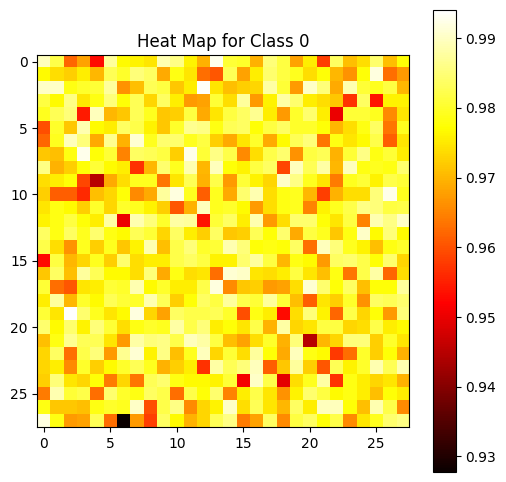

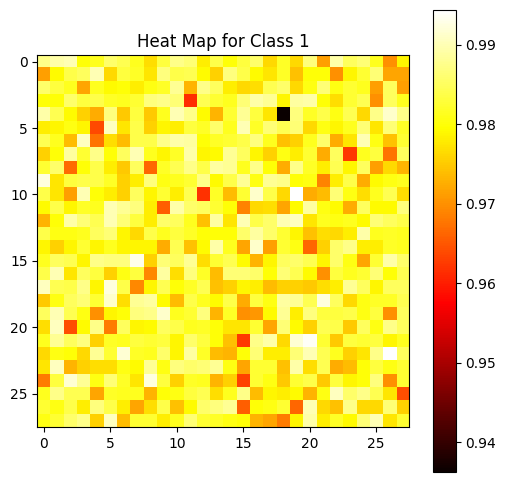

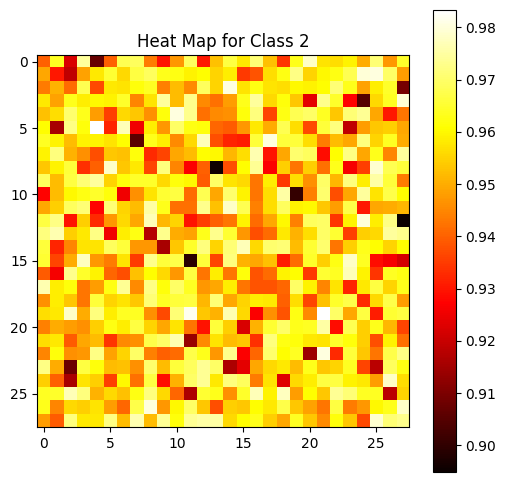

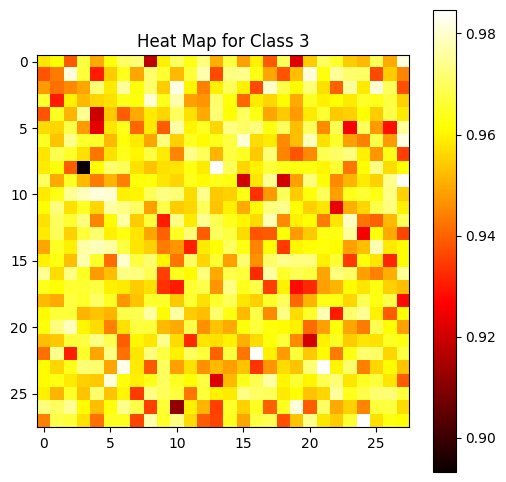

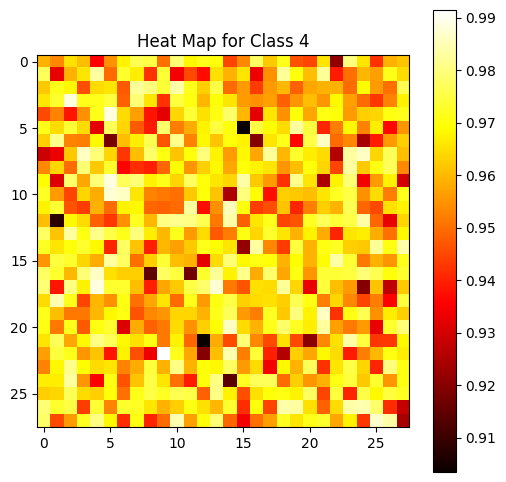

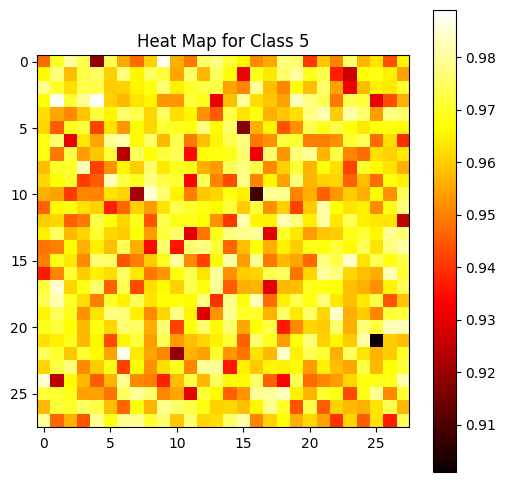

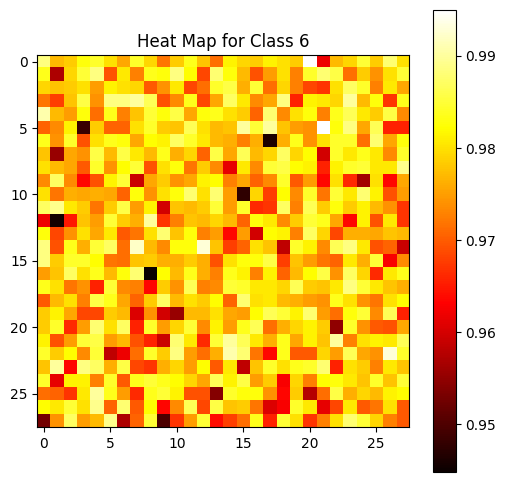

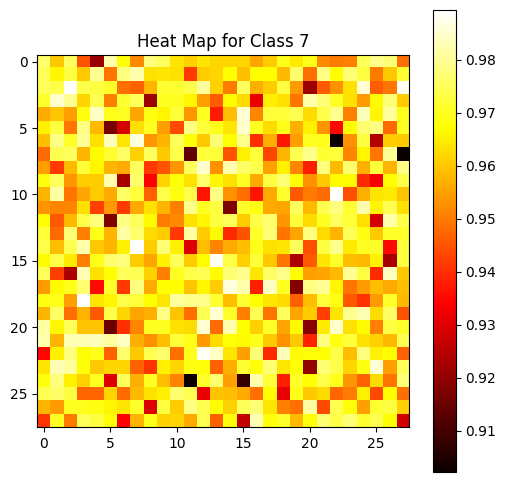

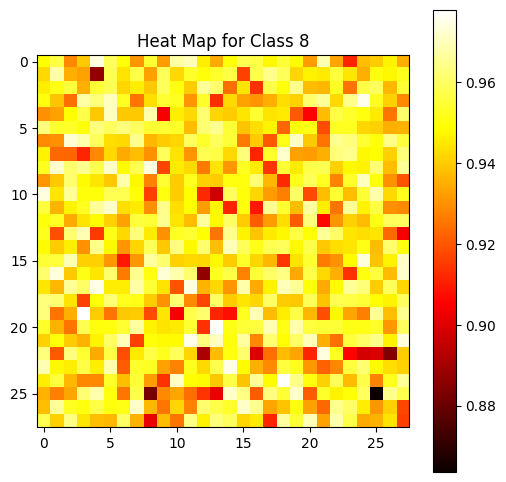

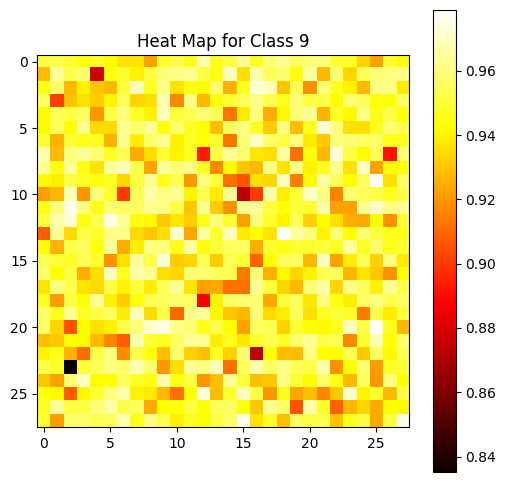

In [ ]:
# Create heatmaps for each class
for class_label in range(10):
    data_array = np.zeros((28, 28))
    for pixel in range(784):
        if pixel in pixel_importance_per_class:
            row = pixel // 28
            col = pixel % 28
            data_array[row, col] = pixel_importance_per_class[pixel].get(class_label, 0)  # Default to 0 if no value
    
    # Create the heatmap
    plt.figure(figsize=(6, 6))
    plt.imshow(data_array, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(f'Heat Map for Class {class_label}')
    plt.show()

In [ ]:
# Select a specific image from the dataset, flatten it, and plot its pixel intensities
image_index = 10  # This can be changed to any valid index within the dataset
flat_image = X_train.iloc[image_index].values
# Plot the pixel intensities as a bar graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(flat_image)), flat_image)
plt.title(f'Pixel Intensities for Image {image_index}')
plt.xlabel('Pixel Index')
plt.ylabel('Intensity')
plt.show()

NameError: name 'X_train' is not defined

Distance calculation:

We can do this by calculating the distance (e.g., Euclidean distance or Manhattan distance) between the vectors representing the values for each class across all pixels.

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

def compute_class_distances(data_dict):
    classes = list(range(10))
    distances = np.zeros((10, 10))
    
    for class1, class2 in itertools.combinations(classes, 2):
        distance = 0
        for pixel in data_dict:
            value1 = data_dict[pixel].get(class1, 0)
            value2 = data_dict[pixel].get(class2, 0)
            distance += abs(value1 - value2)  # Manhattan distance; use (value1 - value2)**2 for Euclidean
        distances[class1, class2] = distance
        distances[class2, class1] = distance  # Symmetric matrix
    
    return distances

distances = compute_class_distances(copy_pixel_importance_per_class)

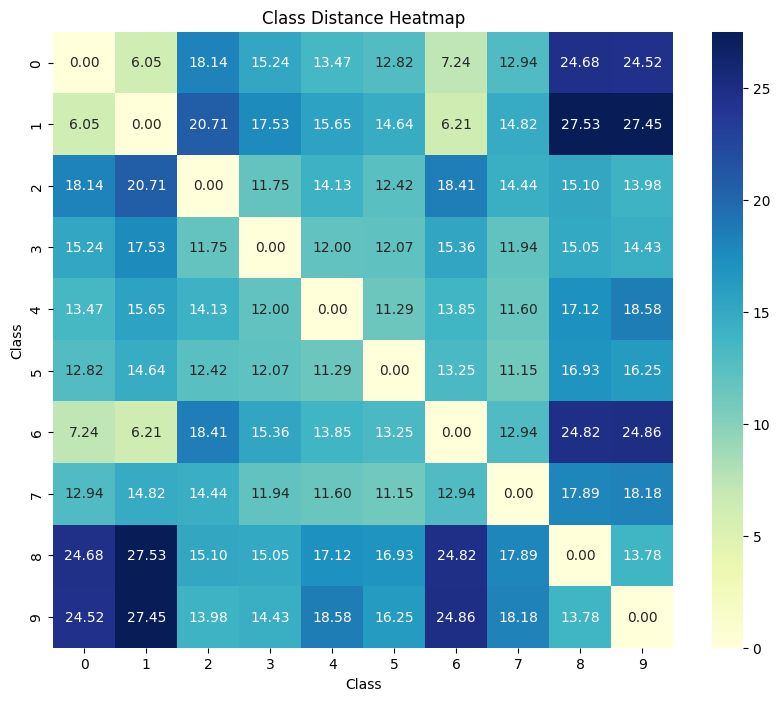

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(distances, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=range(10), yticklabels=range(10))
plt.title("Class Distance Heatmap")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()

### SMARTPATCH_vlamda selecting top pixels per class for training

In [ ]:
def select_top_k_pixels(pixels, class_label, k, val=True):
    # Get the pixel importance for the specified class
    class_pixels = {pixel: importance[class_label] for pixel, importance in pixels.items() if class_label in importance}
    
    # Sort the pixels by importance in descending order
    sorted_pixels = sorted(class_pixels.items(), key=lambda item: item[1], reverse=val)  # selecting best by default 
    
    # Select the top k pixels
    top_k_pixels = [item[0] for item in sorted_pixels[:k]]
    
    return top_k_pixels

def run_model(pixel_importance, k):
    split_index = int(len(X_train) * 0.40)
    X_train_subset = X_train[:split_index].copy()  # Create a copy of the subset
    y_train_subset = y_train[:split_index]

    # Create a modified training set with only top k pixels turned on for each class
    X_train_modified = X_train_subset.copy()

    for i in range(len(X_train_modified)):
        label = y_train_subset[i]  # Get the class label for the current sample
        top_k_pixels = select_top_k_pixels(pixel_importance, label, k)  # Get top k pixels for this class
        flat_image = X_train_modified.iloc[i].values
        marked_image = np.zeros_like(flat_image)  # Turn off all pixels
        for p in top_k_pixels:
            if p < len(flat_image):
                marked_image[p] = flat_image[p]  # Turn on the top k pixels for this class
        X_train_modified.iloc[i] = marked_image

    # Reshape the modified images for the model
    X_train_modified_array = np.array(X_train_modified).reshape(-1, 28, 28, 1)

    # Convert labels to categorical format
    y_train_subset_categorical = to_categorical(y_train_subset, num_classes=10)
    y_test_categorical = to_categorical(y_test, num_classes=10)

    # Create and train the model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model with the modified training set
    model.fit(X_train_modified_array, y_train_subset_categorical, batch_size=128, epochs=5, verbose=1)

    # Modify the test set similarly
    X_test_modified = np.array(X_test).reshape(-1, 784)
    for i in range(len(X_test_modified)):
        label = y_test[i]  # Get the class label for the current sample
        top_k_pixels = select_top_k_pixels(pixel_importance, label, k)  # Get top k pixels for this class
        flat_image = X_test_modified[i]
        marked_image = np.zeros_like(flat_image)  # Turn off all pixels
        for p in top_k_pixels:
            if p < len(flat_image):
                marked_image[p] = flat_image[p]  # Turn on the top k pixels for this class
        X_test_modified[i] = marked_image

    X_test_modified_array = X_test_modified.reshape(-1, 28, 28, 1)

    # Evaluate the model with the modified test set
    y_pred = model.predict(X_test_modified_array)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test_categorical, axis=1)

    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    class_report = classification_report(y_test_classes, y_pred_classes)

    print('Accuracy:', accuracy)
    print('Classification Report:\n', class_report)

2024-06-20 16:25:41.664786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 16:25:41.780976: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-20 16:25:41.785790: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-20 16:25:41.785807: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [ ]:
run_model(copy_pixel_importance_per_class, 20)

NameError: name 'X_train' is not defined

## Additional Visualizations to see if matrix is correct

In [ ]:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()

        # Define ReLU activation function
        self.relu = nn.ReLU()

        # Encoder
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.fc_mu = nn.Linear(128*7*7, latent_dim)
        self.fc_logvar = nn.Linear(128*7*7, latent_dim)

        # Decoder
        self.fc_decode = nn.Linear(latent_dim, 128*7*7)
        self.conv_transpose1 = nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.conv_transpose2 = nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.conv_transpose3 = nn.ConvTranspose2d(32, 1, kernel_size=3, stride=1, padding=1)

    def encode(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = x.view(x.shape[0], -1)  # Flatten the tensor
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparametrize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        z = self.relu(self.fc_decode(z))
        z = z.view(-1, 128, 7, 7)  # Reshape the tensor
        z = self.relu(self.conv_transpose1(z))
        z = self.relu(self.conv_transpose2(z))
        z = torch.sigmoid(self.conv_transpose3(z))
        return z

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparametrize(mu, logvar)
        return self.decode(z), mu, logvar

latent_dim = 10
model = VAE(latent_dim).to(device)

In [ ]:
import altair as alt
import os
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
alt.data_transformers.disable_max_rows()

def plot_tsne(tsne_xy, dataloader, num_points=1000):

    images, labels = zip(*[(x[0].numpy()[0,:,:,None], x[1]) for x in dataloader.dataset])

    num_points = min(num_points, len(labels))
    data = pd.DataFrame({'x':tsne_xy[:, 0], 'y':tsne_xy[:, 1], 'label':labels,
                        'image': images})
    data = data.sample(n=num_points, replace=False)

    alt.renderers.set_embed_options('light')
    selection = alt.selection_single(on='mouseover', clear='false', nearest=True,
                                    init={'x':data['x'][data.index[0]], 'y':data['y'][data.index[0]]})
    scatter = alt.Chart(data).mark_circle().encode(
        alt.X('x:N',axis=None),
        alt.Y('y:N',axis=None),
        color=alt.condition(selection,
                            alt.value('lightgray'),
                            alt.Color('label:N')),
        size=alt.value(100),
        tooltip='label:N'
    ).add_selection(
        selection
    ).properties(
        width=400,
        height=400
    )

    digit  = alt.Chart(data).transform_filter(
        selection
    ).transform_window(
        index='count()'           # number each of the images
    ).transform_flatten(
        ['image']                 # extract rows from each image
    ).transform_window(
        row='count()',            # number the rows...
        groupby=['index']         # ...within each image
    ).transform_flatten(
        ['image']                 # extract the values from each row
    ).transform_window(
        column='count()',         # number the columns...
        groupby=['index', 'row']  # ...within each row & image
    ).mark_rect(stroke='black',strokeWidth=0).encode(
        alt.X('column:O', axis=None),
        alt.Y('row:O', axis=None),
        alt.Color('image:Q',sort='descending',
            scale=alt.Scale(scheme=alt.SchemeParams('lightgreyteal',
                            extent=[1, 0]),

            ),
            legend=None
        ),
    ).properties(
        width=400,
        height=400,
    )

    return scatter | digit

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"


# Load the data
batch_size = 100

data_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

def denormalize(x):
    return x

#######################################################################
#                       ** END OF YOUR CODE **
#######################################################################

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=data_transforms,
)

train_dataloader = torch.utils.data.DataLoader(
    training_data,
    batch_size=batch_size,
    shuffle=True,
)

# Download test data
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=data_transforms,
)

test_dataloader = torch.utils.data.DataLoader(
    test_data,
    batch_size=batch_size,
)

# TSNE
from sklearn.manifold import TSNE

for t, (x, y) in enumerate(test_dataloader):
    if t == 0:
        data = x
        labels = y
    else:
        data = torch.cat((data, x))
        labels = torch.cat((labels, y))

# Then let's apply dimensionality reduction with the trained encoder

with torch.no_grad():
    data = data.to(device)
    mu, logvar = model.encode(data)
    z = (model.reparametrize(mu, logvar)).cpu().detach().numpy()

z_embedded = TSNE(n_components=2).fit_transform(z)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
plot_tsne(z_embedded, test_dataloader, num_points=10000)

OutputSizeExceededError: The output cannot be displayed as it exceeds Deepnote's 30MB limit for outputs. The limit is in place to ensure smooth performance.

Please reduce the amount of data being sent to the output.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4a0932d2-a85c-4628-b3b9-c61473198b10' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>